<a href="https://colab.research.google.com/github/alexrafkin/unsupervised_learning_wine/blob/main/USL_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics
from sqlalchemy import create_engine
from sklearn.manifold import TSNE
import warnings
from sklearn.datasets import fetch_openml
import time
!pip install umap
import umap.umap_ as umap

warnings.filterwarnings('ignore')

url = 'https://drive.google.com/file/d/11-AKDYNNPSjdeB77j71_ydZd5KrjkGs6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

wine_df = pd.read_csv(path)
wine_df.info()
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Wine Type                     178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of Diluted Wines  178 non-null    float64
 13  Proli

Wine Type  Alcohol   Malic Acid  ...   Hue  OD280/OD315 of Diluted Wines  Proline
0          1     14.23        1.71  ...  1.04                          3.92     1065
1          1     13.20        1.78  ...  1.05                          3.40     1050
2          1     13.16        2.36  ...  1.03                          3.17     1185
3          1     14.37        1.95  ...  0.86                          3.45     1480
4          1     13.24        2.59  ...  1.04                          2.93      735

[5 rows x 14 columns]

In [ ]:
X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#Dimensionality Reduction

In [ ]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

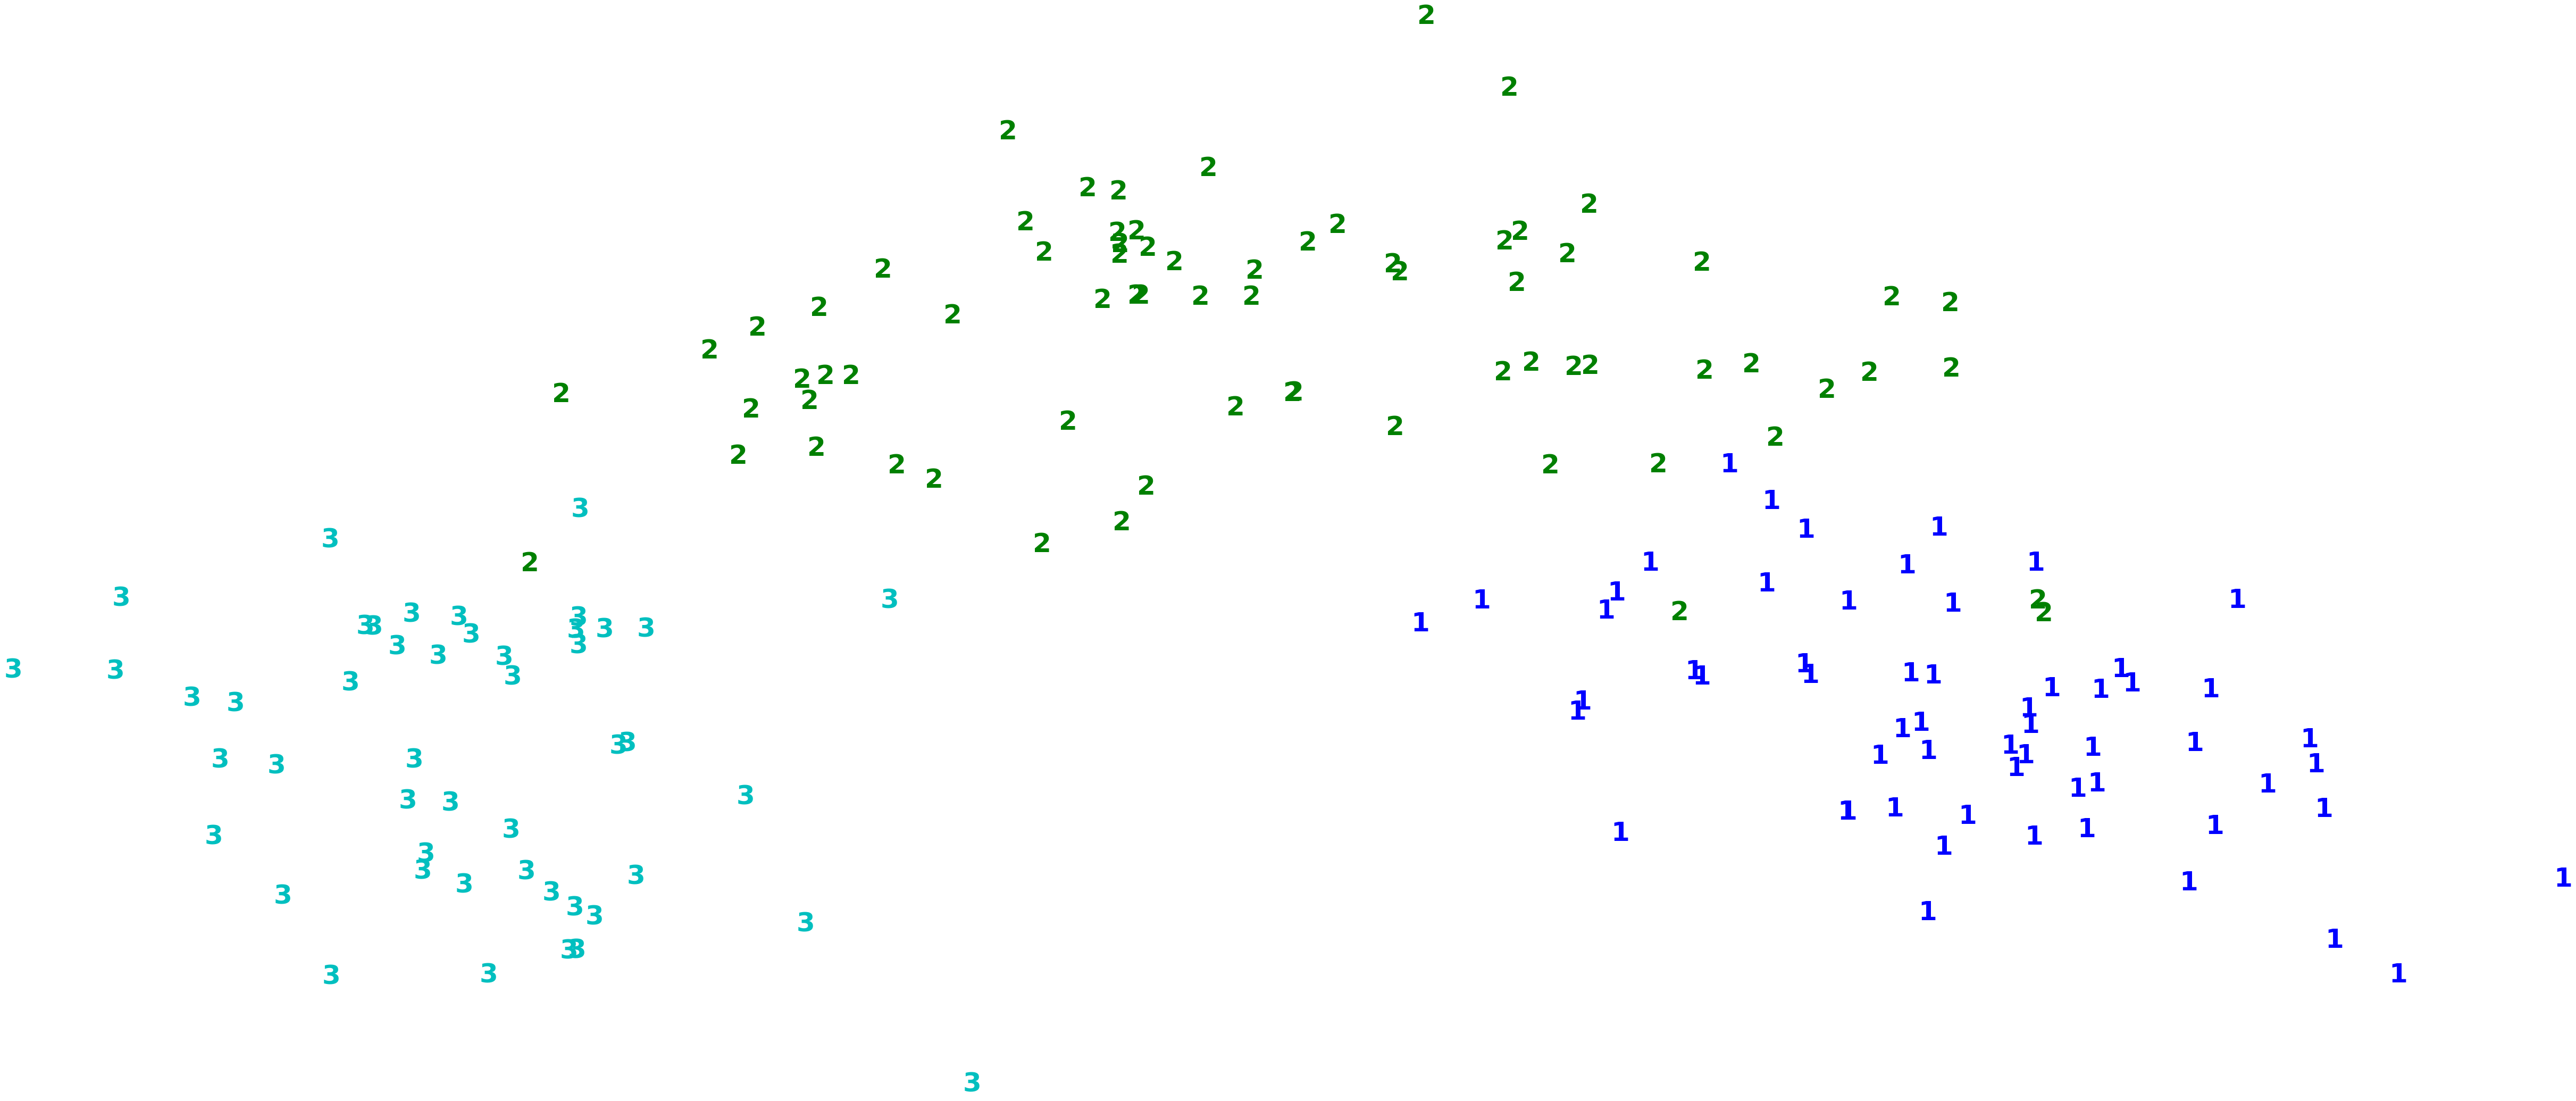

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can see the divisions aren't completely linearly seperable, but there are clear clusters.

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 2.038932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.971745
[t-SNE] KL divergence after 500 iterations: 0.249290


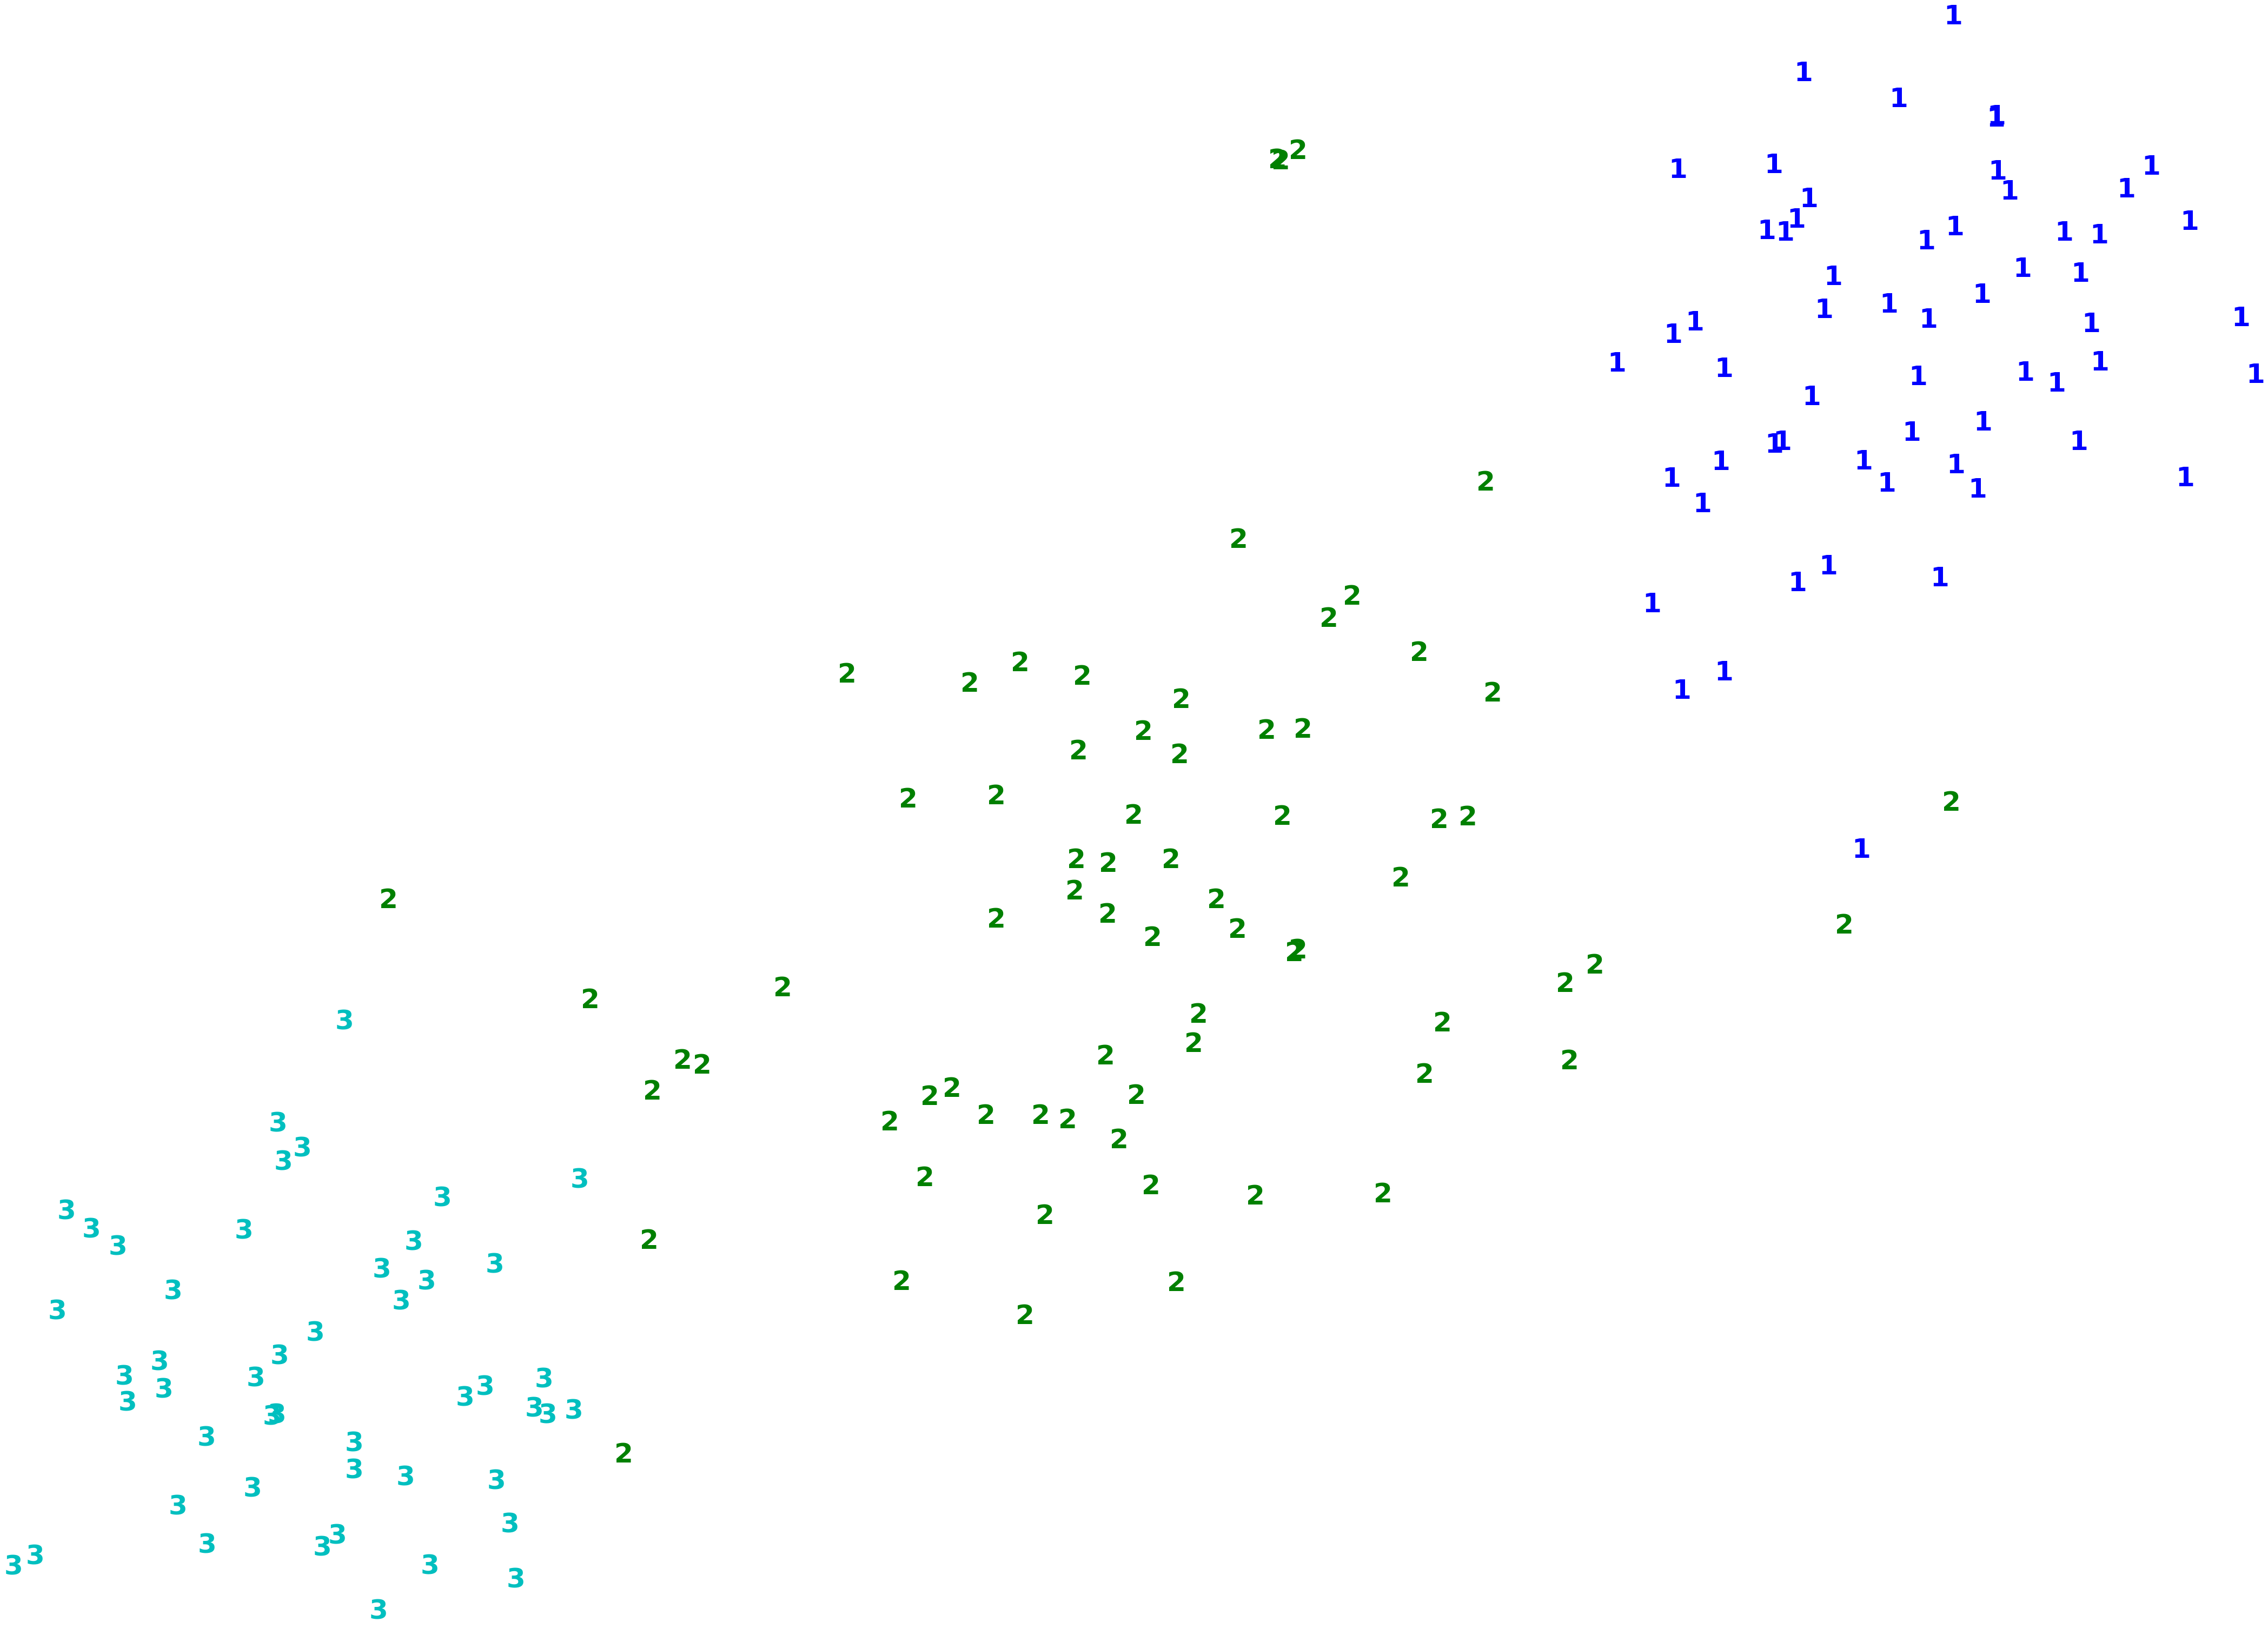

In [ ]:
plt.figure(figsize=(5,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This seems like a step up from PCA

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

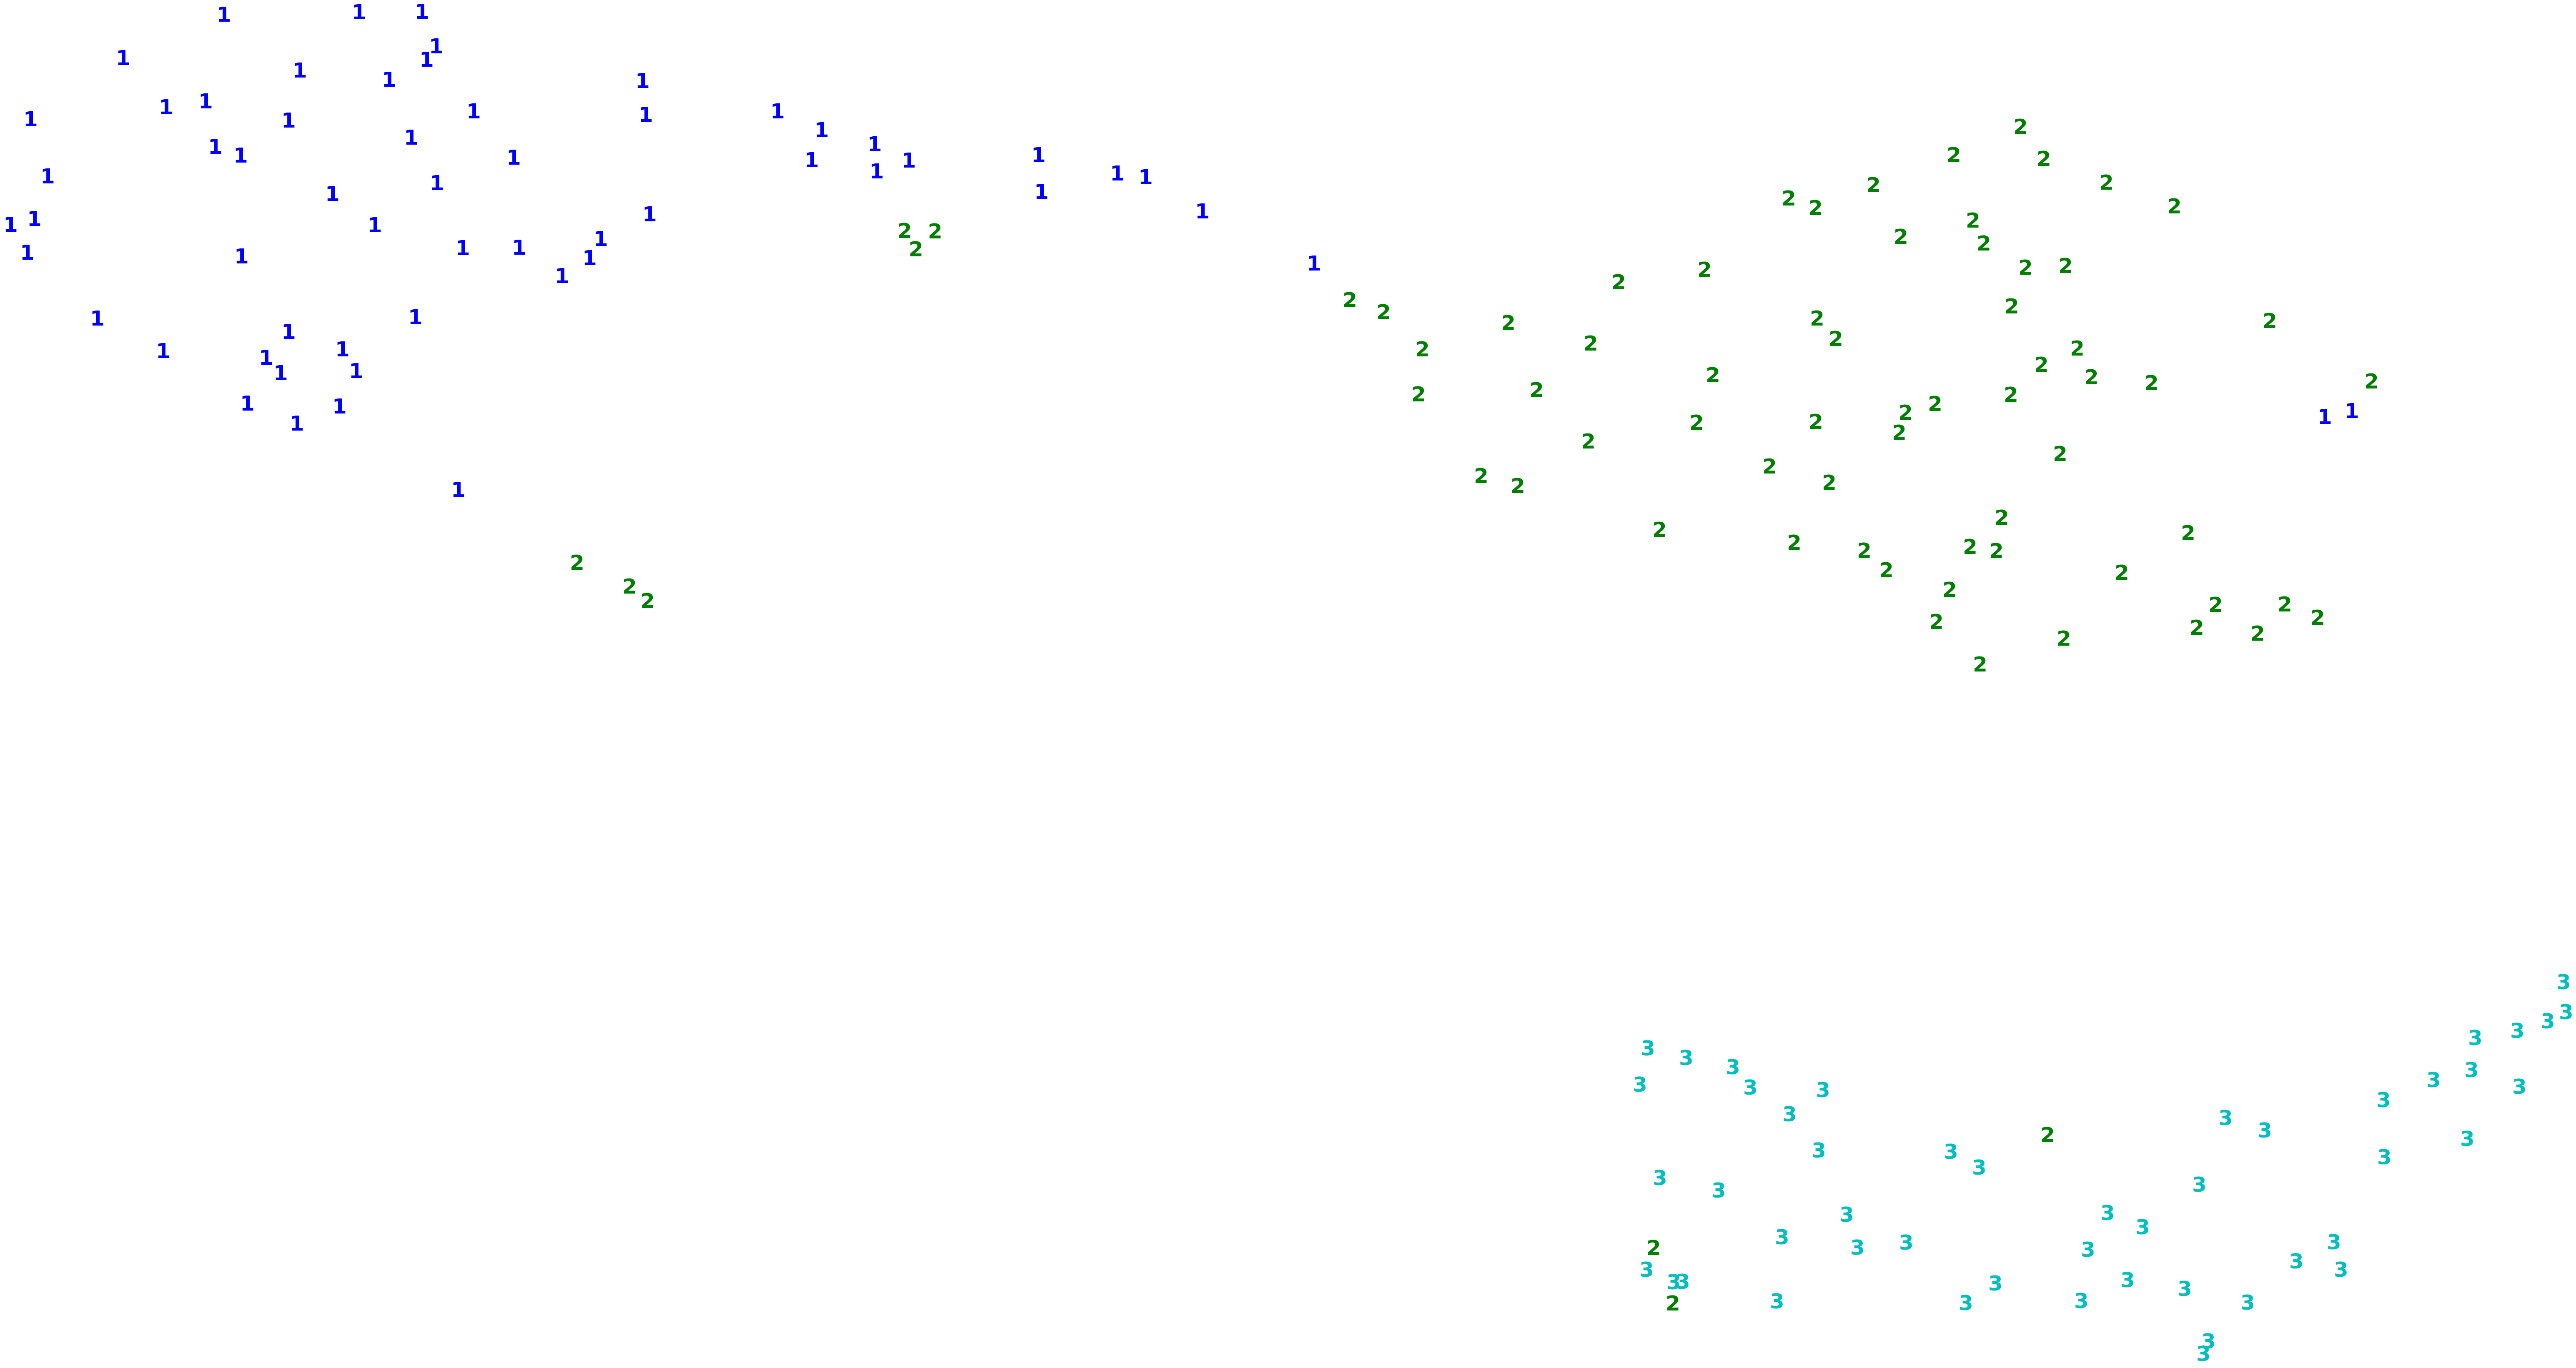

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Seems to separate out the '3' label pretty well, and aside from a few outliers 1&2 are okay. It seems like t-SNE has less inter-class mixing, but UMAP makes linear separation easier from the centroids of the clusters.

#Clustering Algorithms Using X_STD

In [ ]:
performance = pd.DataFrame(columns=['Model','DR','ARI','Silhouette'])

##K-means

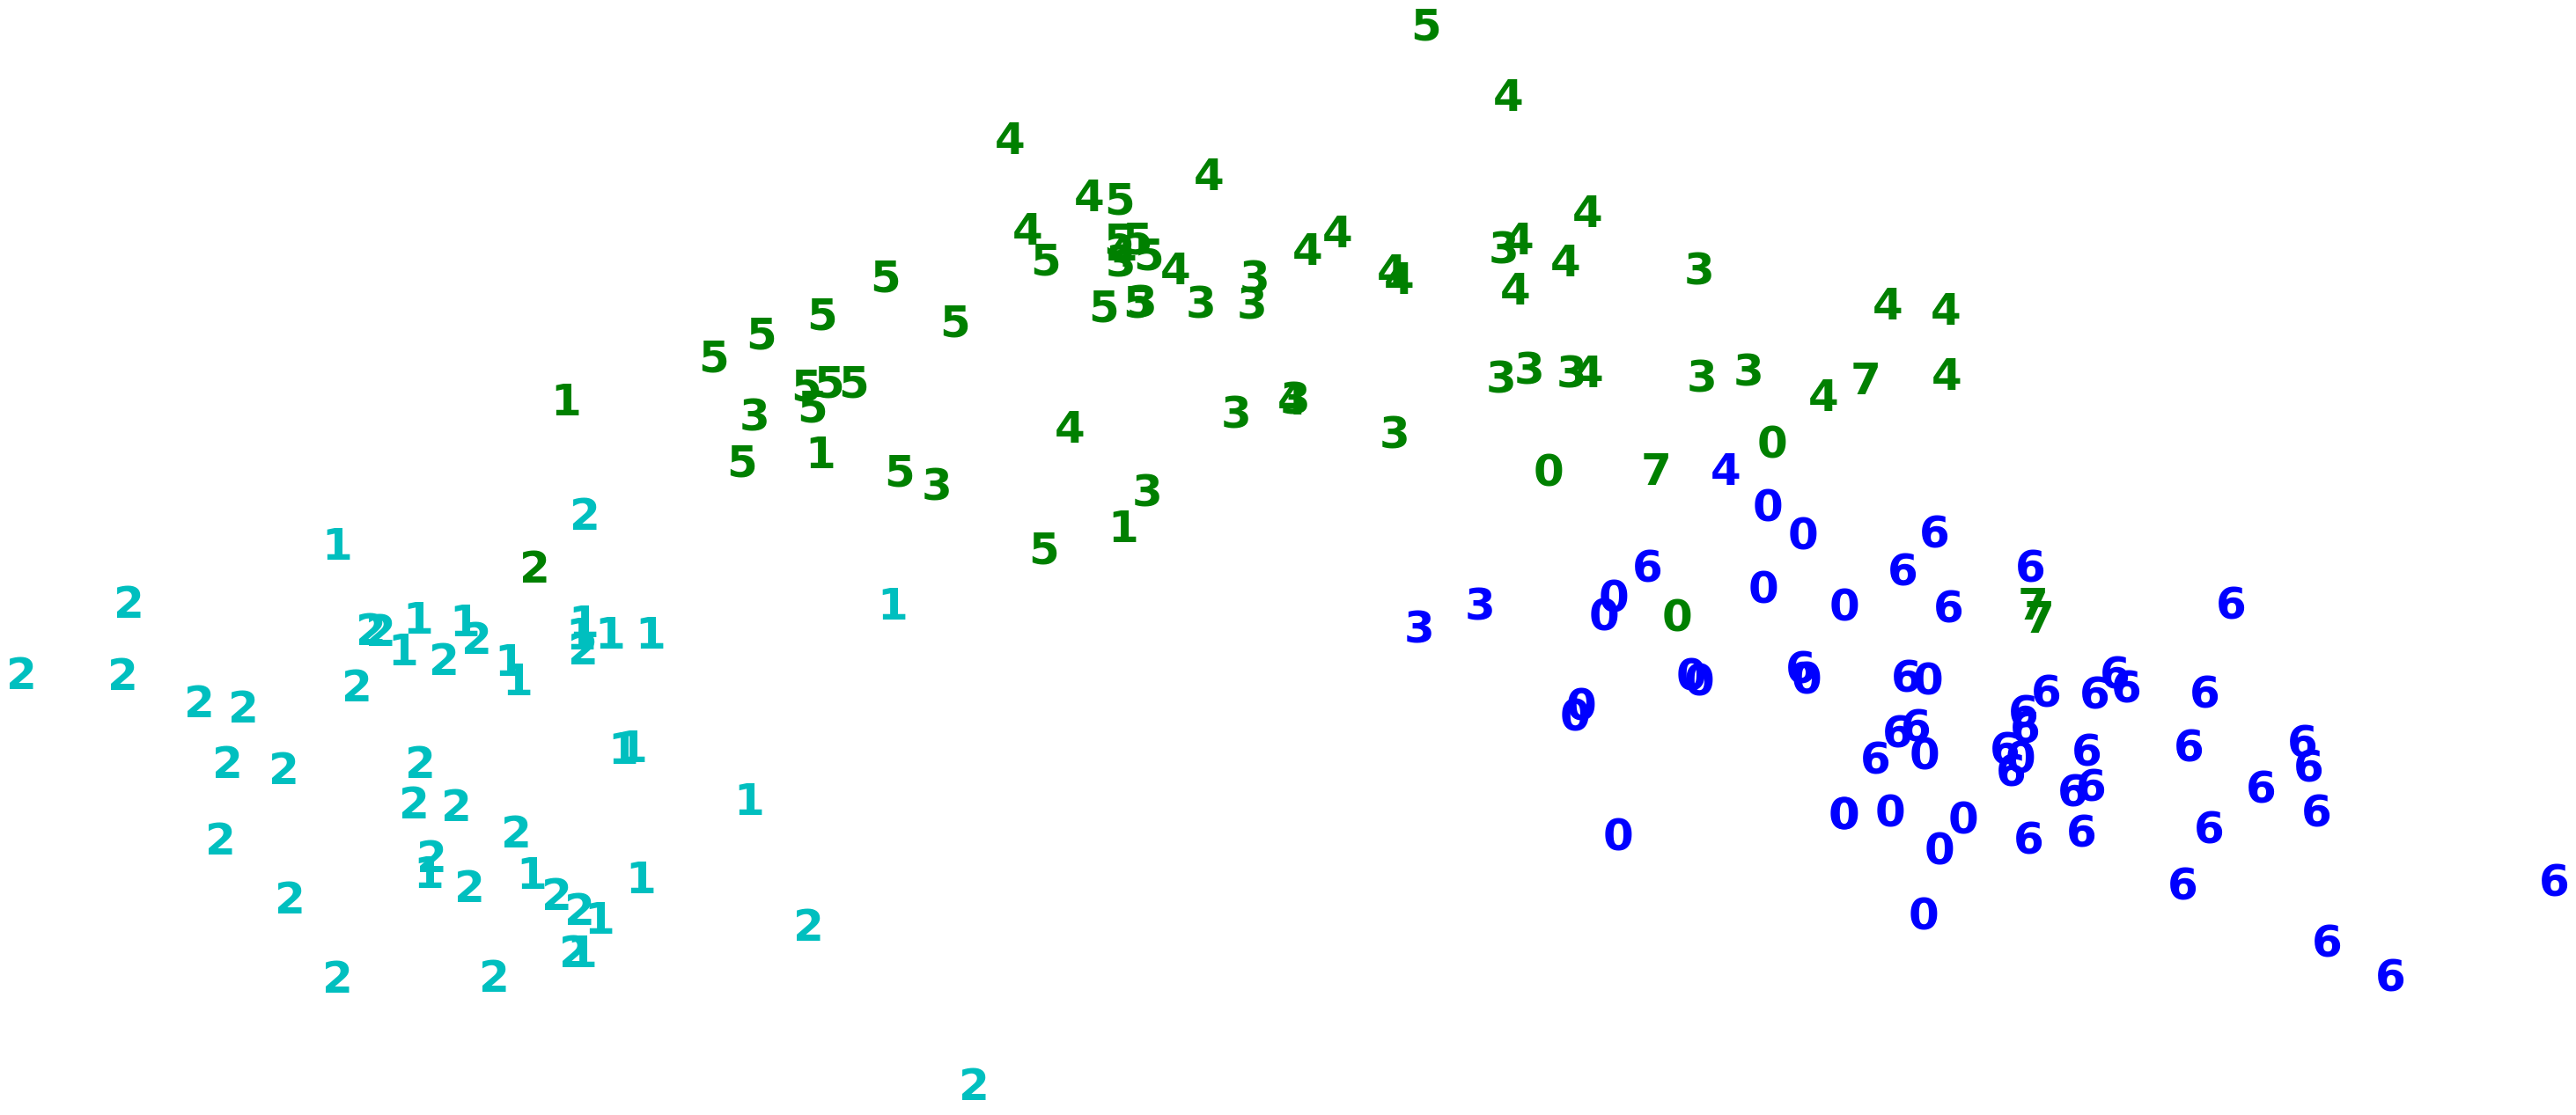

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(random_state=123)

# Fit model
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(6,3))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for j in range(len(y_pred)):
  plt.text(pca[j, 0], pca[j, 1], str(y_pred[j]),
        color=colours[y[j]],
        fontdict={'weight': 'bold', 'size': 50}
      )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It assumes there are 8 groups... lets see what this looks like with 3 clusters.

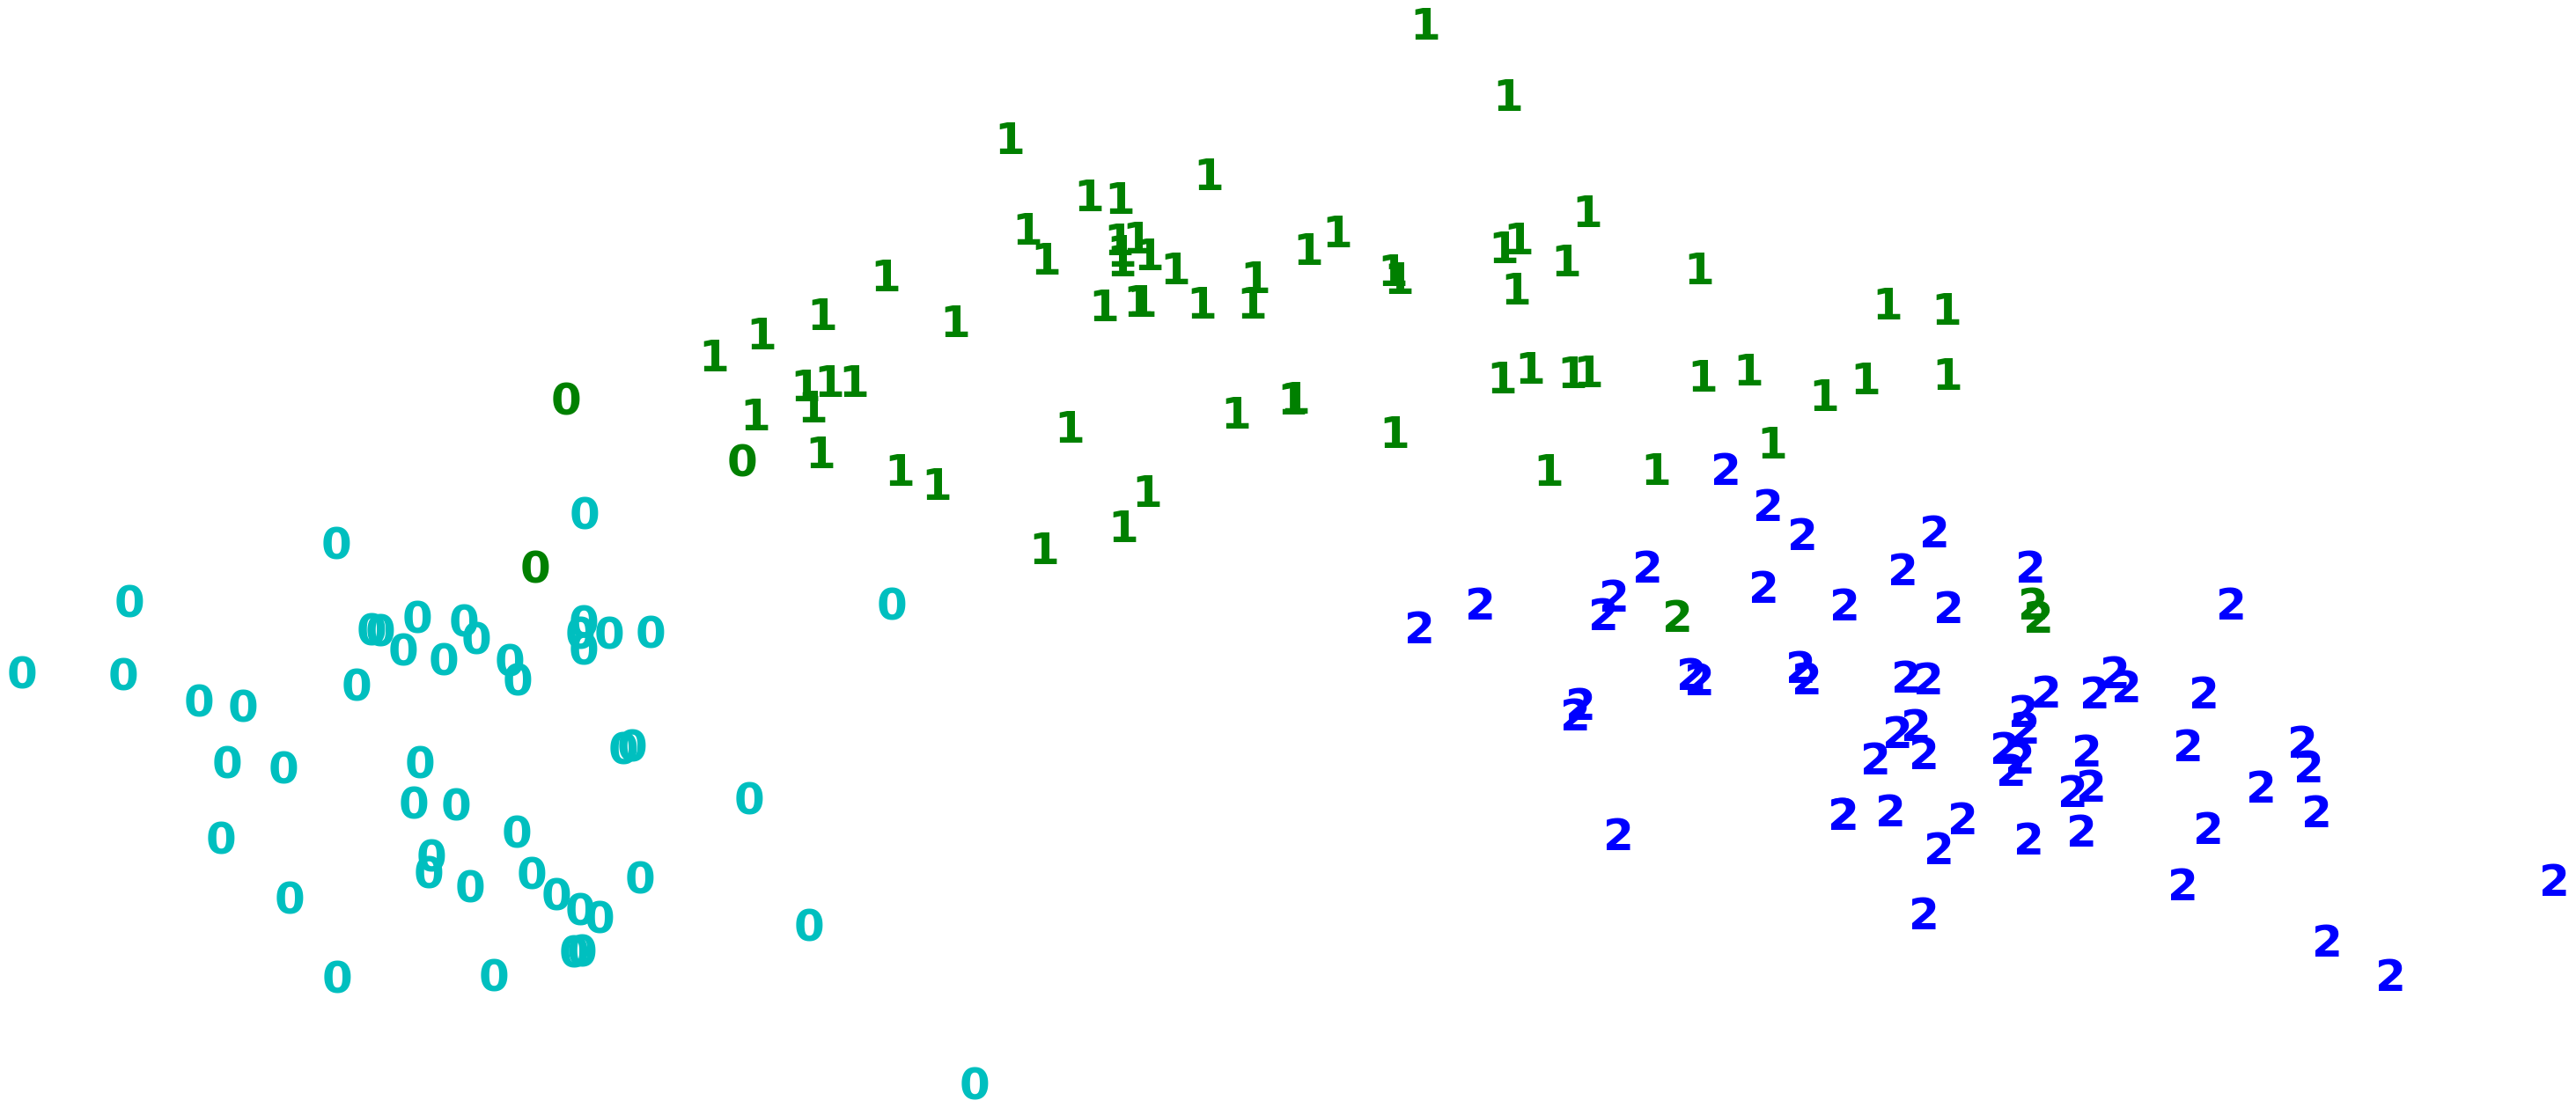

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3,random_state=123)

# Fit model
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(6,3))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for j in range(len(y_pred)):
  plt.text(pca[j, 0], pca[j, 1], str(y_pred[j]),
        color=colours[y[j]],
        fontdict={'weight': 'bold', 'size': 50}
      )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Almost perfect! Lets evaluate with ARI and silhouette score...

In [ ]:
performance.loc[0] = ['K-Means', 'X_std', metrics.adjusted_rand_score(y, y_pred),metrics.silhouette_score(X_std, labels, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, y_pred))
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print('Silhouette score: ',metrics.silhouette_score(X_std, labels, metric='euclidean'))

ARI score:  0.8974949815093207
Silhouette score:  0.2848589191898987


In [ ]:
performance.head()

Model     DR       ARI  Silhouette
0  K-Means  X_std  0.897495    0.284859

##Agglomerative Clustering

complete


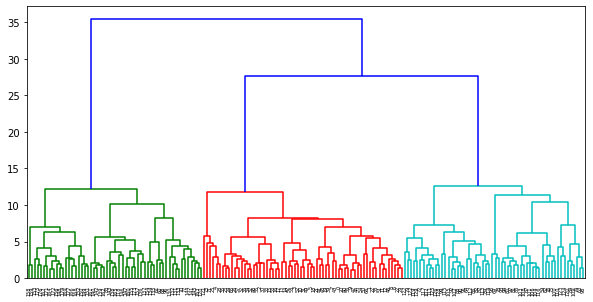

average


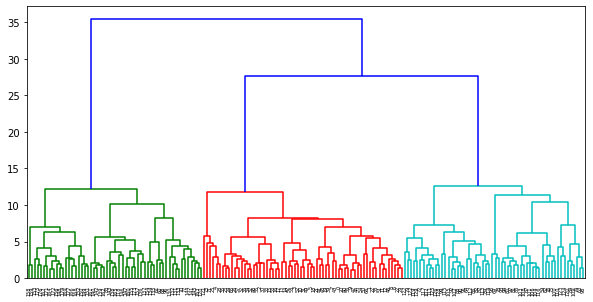

ward


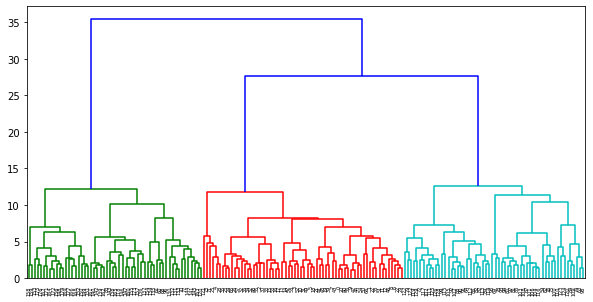

In [ ]:
for i in ['complete','average','ward']:
  plt.figure(figsize=(10,5))
  print(i)
  dendrogram(linkage(X_std, method='ward'))
  plt.show()
  

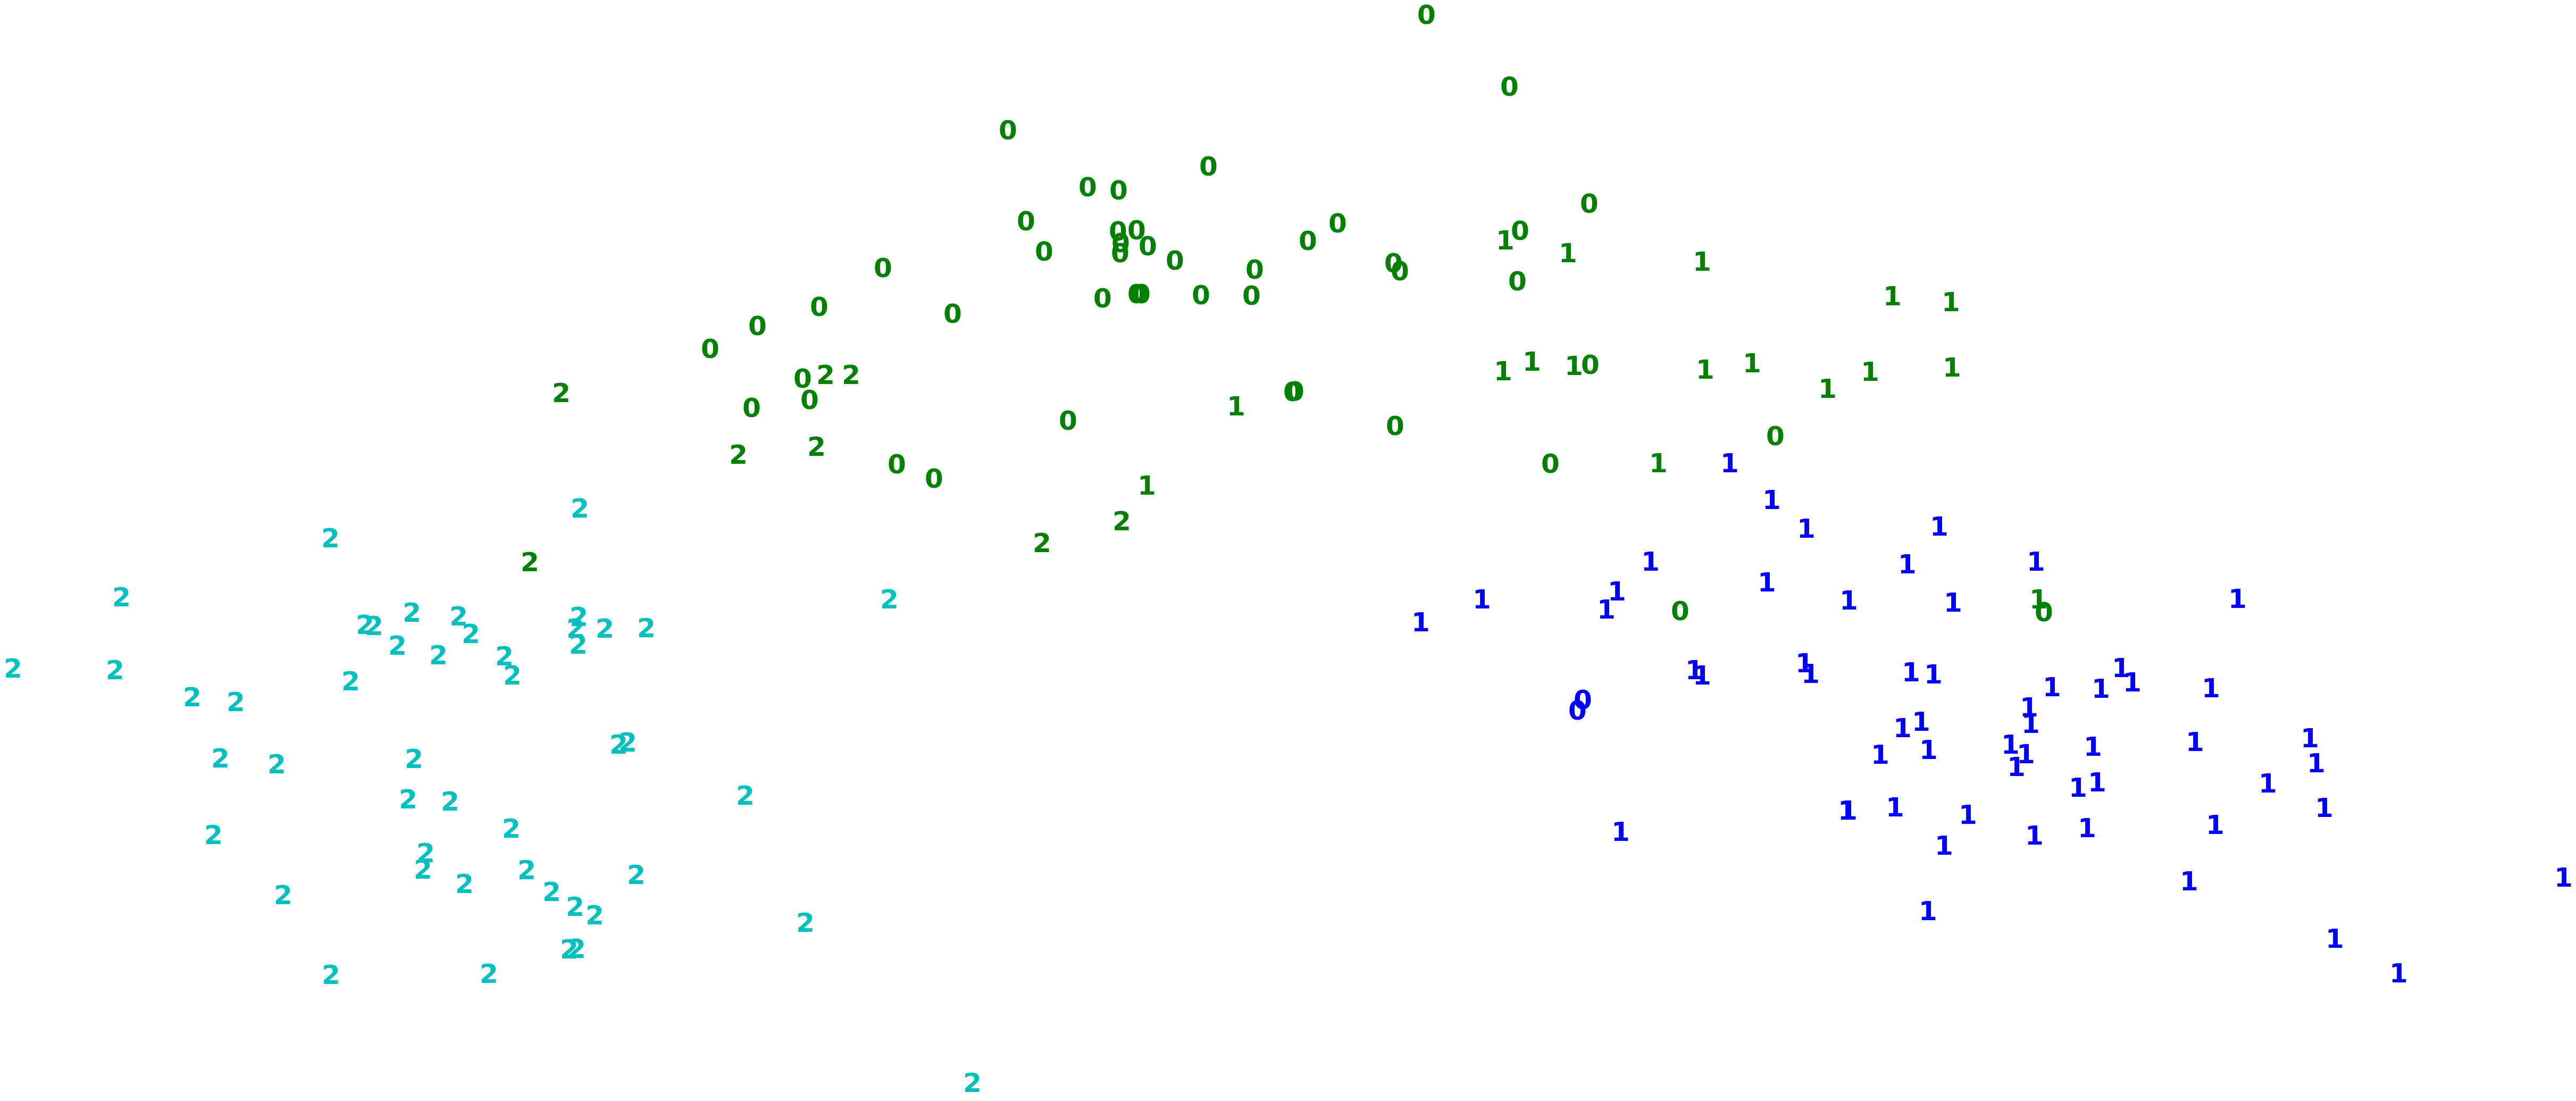

Adjusted Rand Index of the Agglomerative Clustering solution: 0.5972483421815707
The silhoutte score of the Agglomerative Clustering solution: 0.24425920956454214


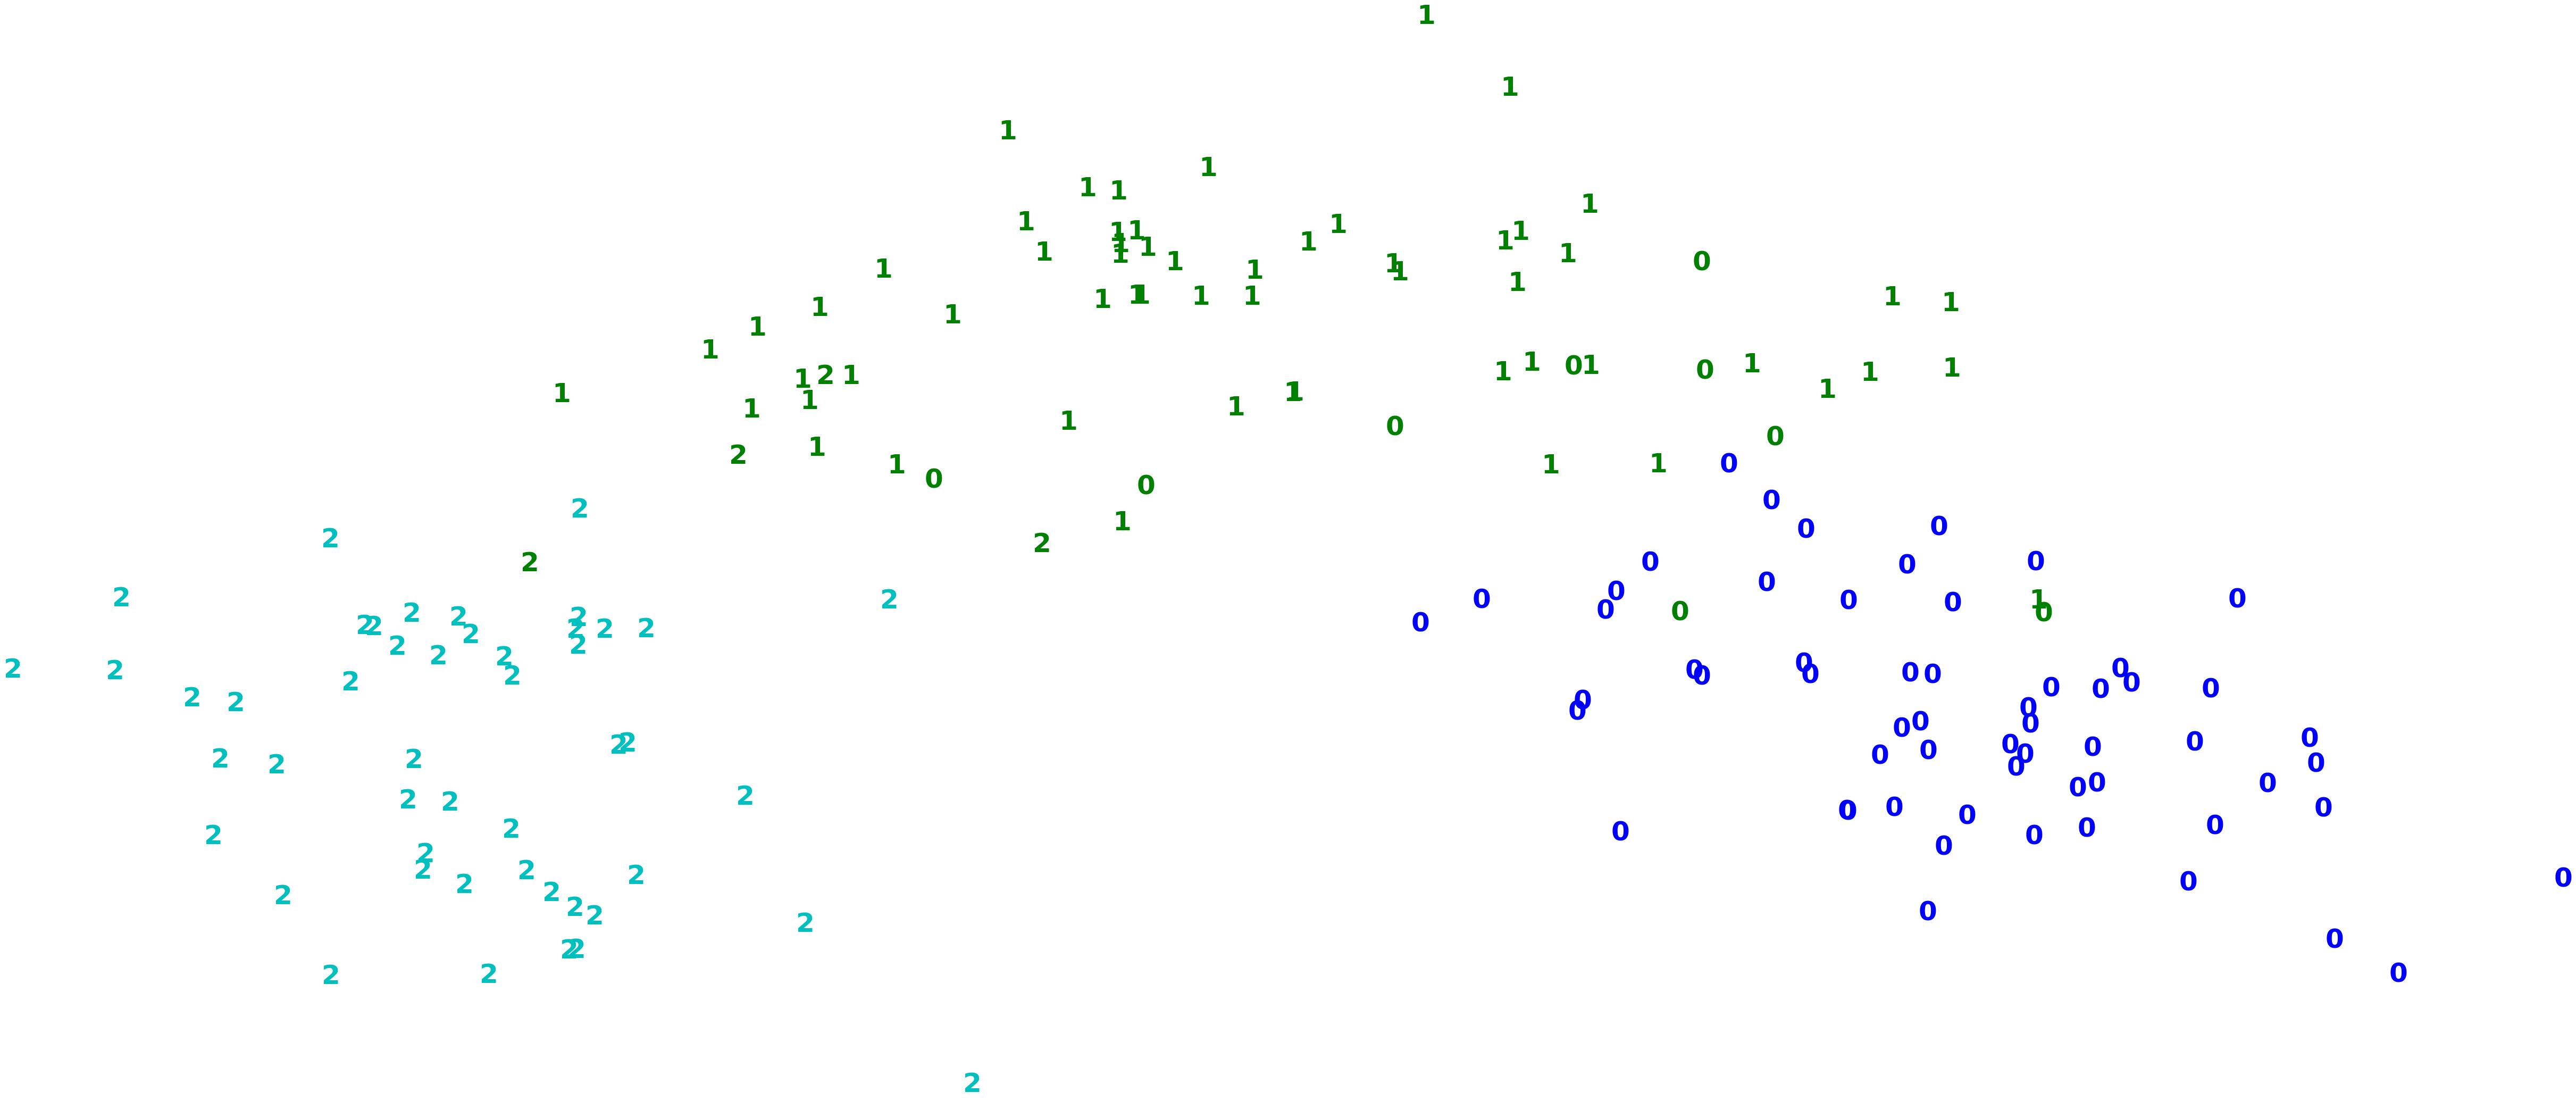

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7847063550518786
The silhoutte score of the Agglomerative Clustering solution: 0.26445785904779395


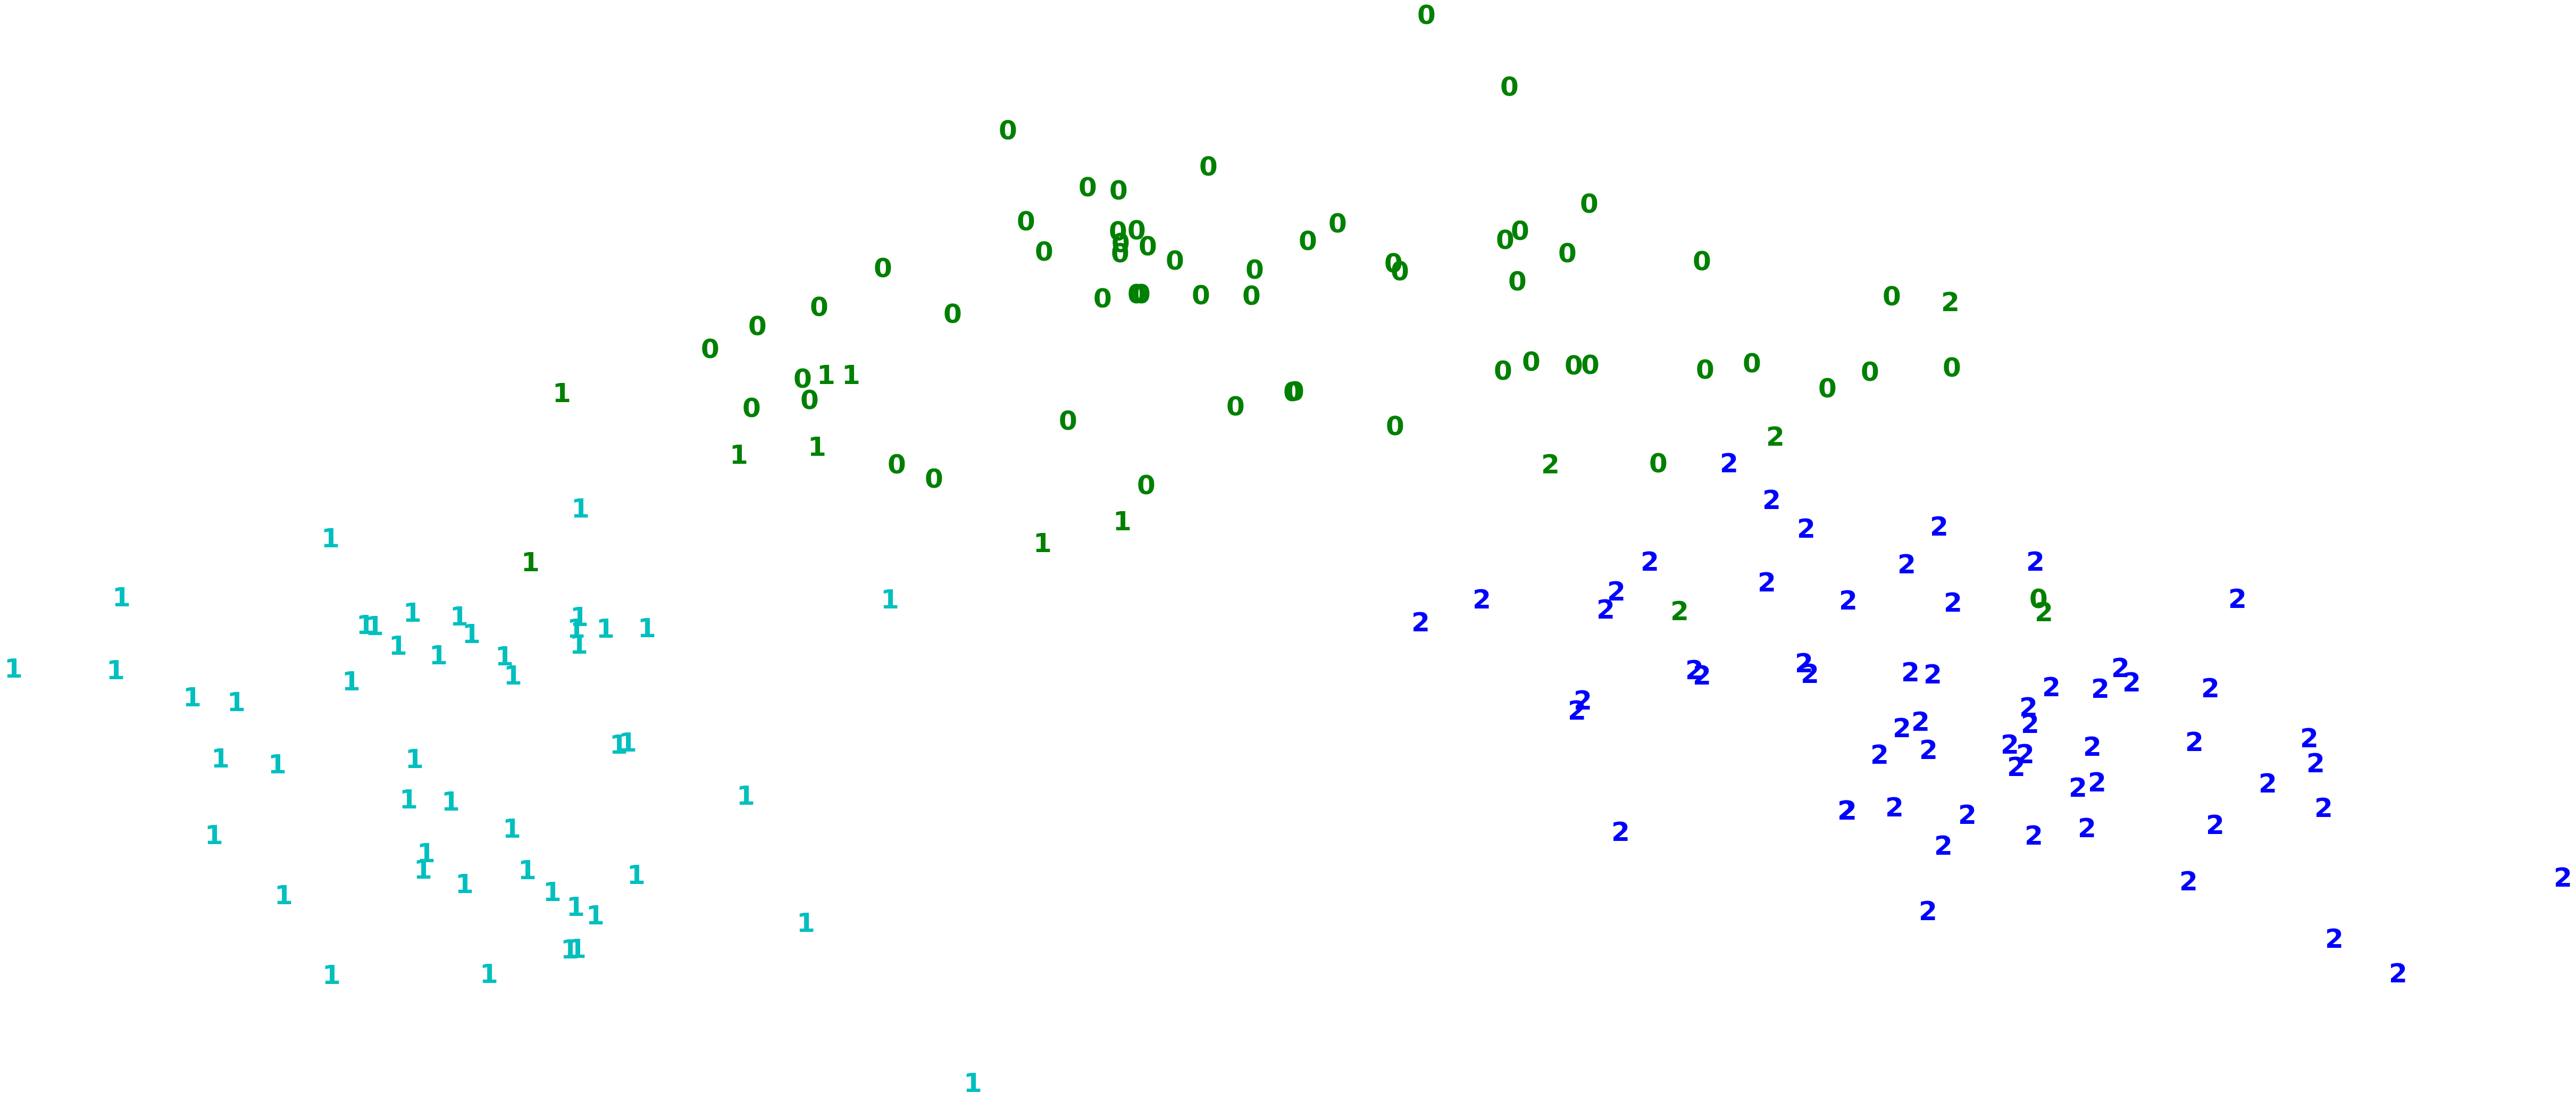

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7899332213582837
The silhoutte score of the Agglomerative Clustering solution: 0.2774439826952265


In [ ]:
for i in ['complete','average','ward']:
  # Defining the agglomerative clustering
  if i == 'ward':
    agg_cluster = AgglomerativeClustering(linkage=i, n_clusters=3)
  else:
    agg_cluster = AgglomerativeClustering(linkage=i, affinity = 'cosine', n_clusters=3)

  # Fit model
  clusters = agg_cluster.fit_predict(X_std)

  pca = PCA(n_components=2).fit_transform(X_std)

  plt.figure(figsize=(10,5))
  colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

  print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
  print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
performance.loc[1] = ['Agglomerative', 'X_std', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_std, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score:  0.7899332213582837
Silhouette score:  0.2774439826952265


In [ ]:
performance.head()

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444

##DBSCAN

epsilon: 2, min_samples: 3


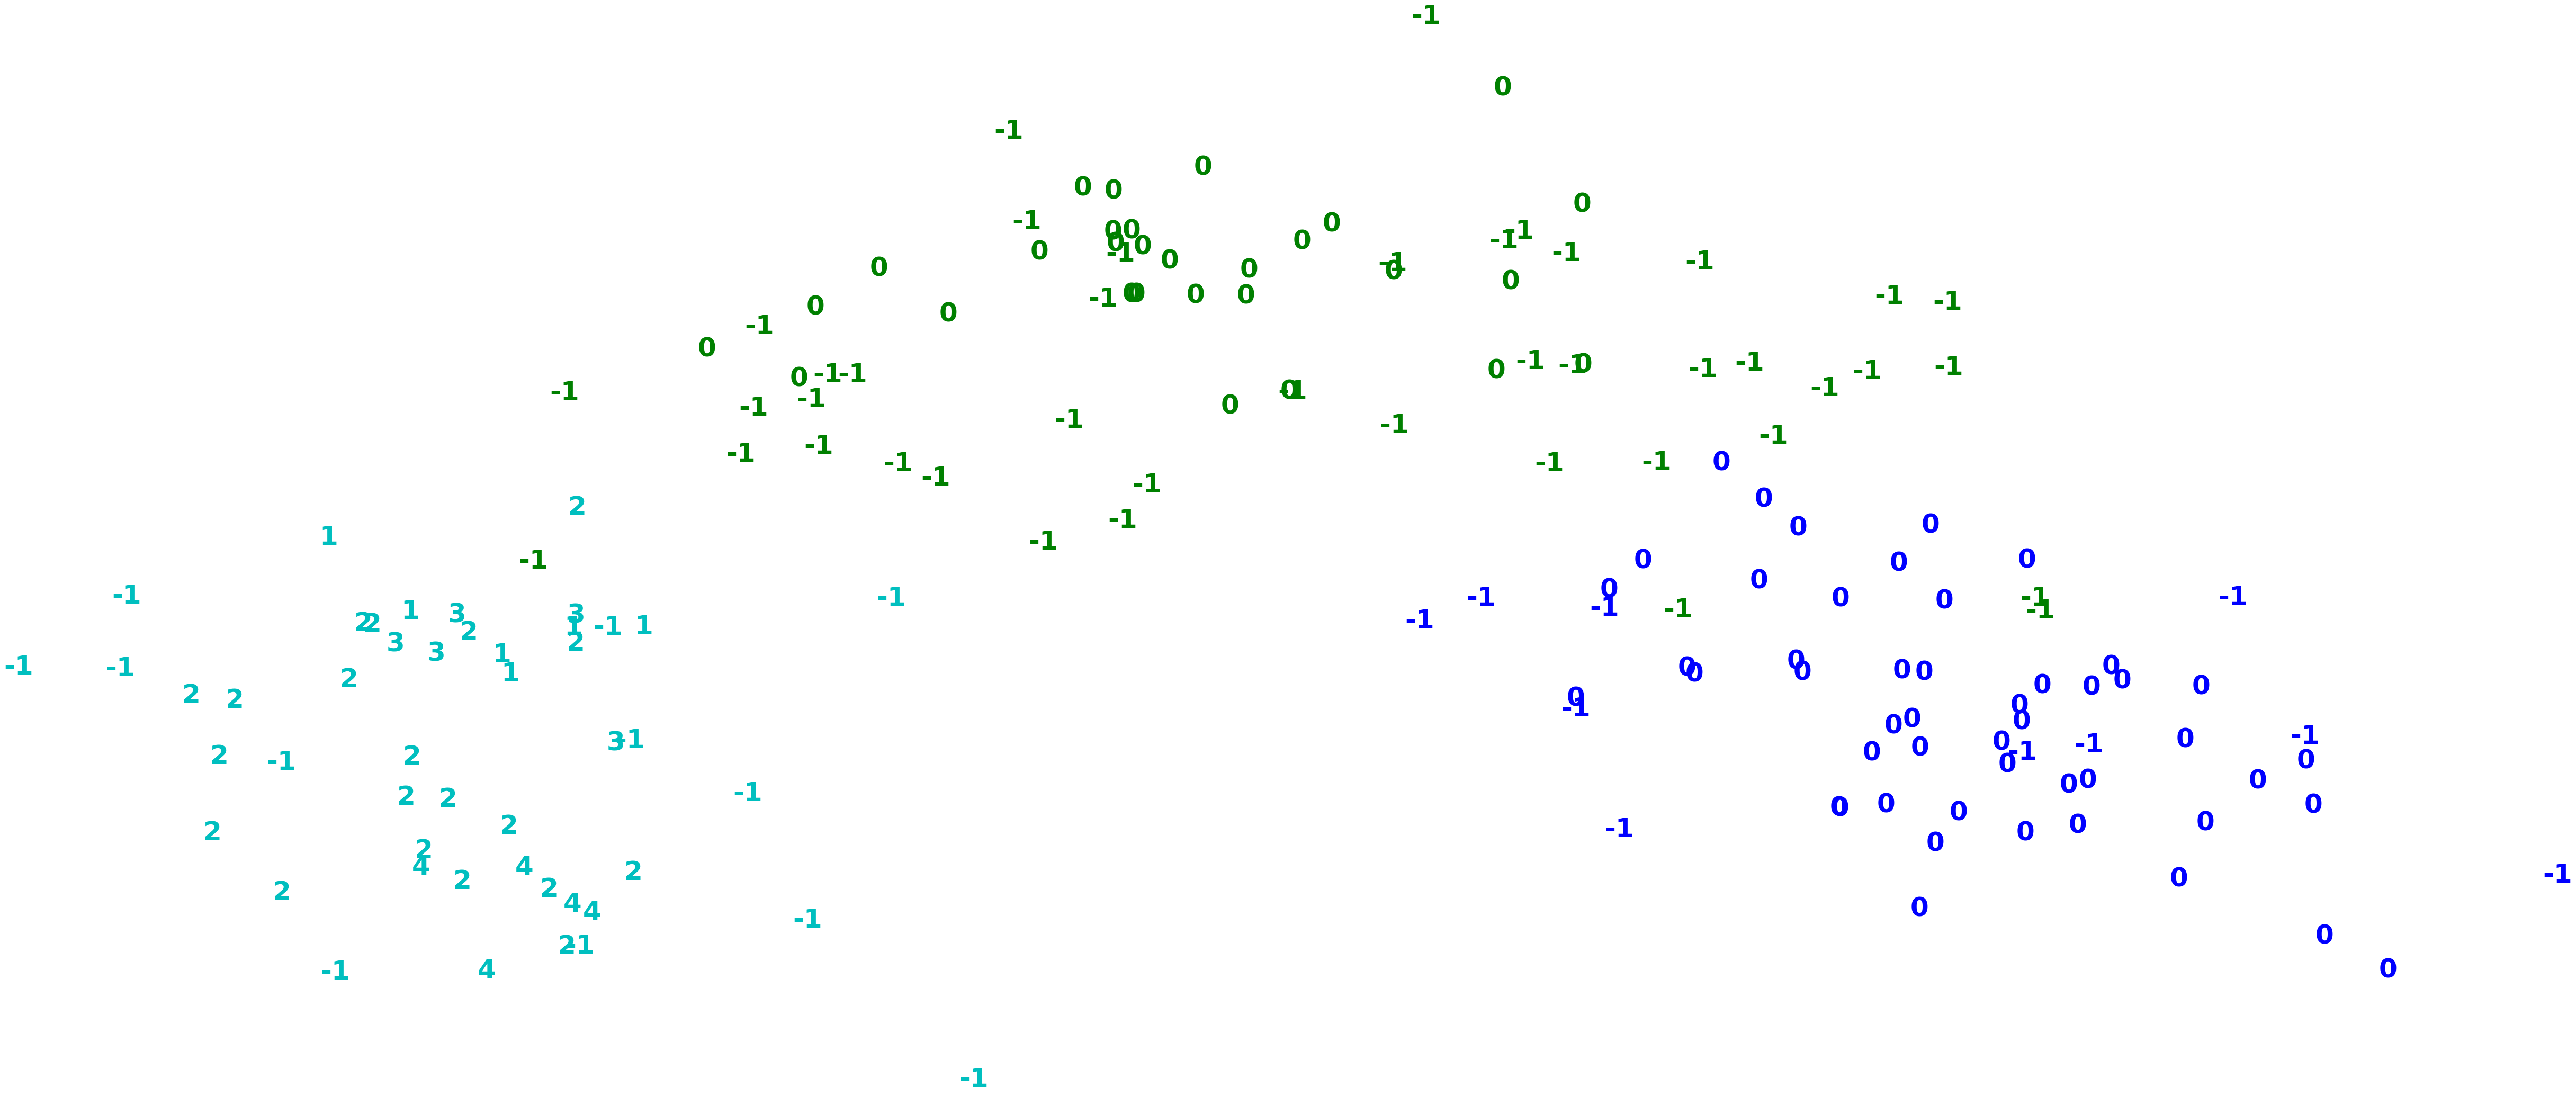

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2866700918419873
The silhoutte score of the Agglomerative Clustering solution: 0.031407450868970094
epsilon: 2.5, min_samples: 3


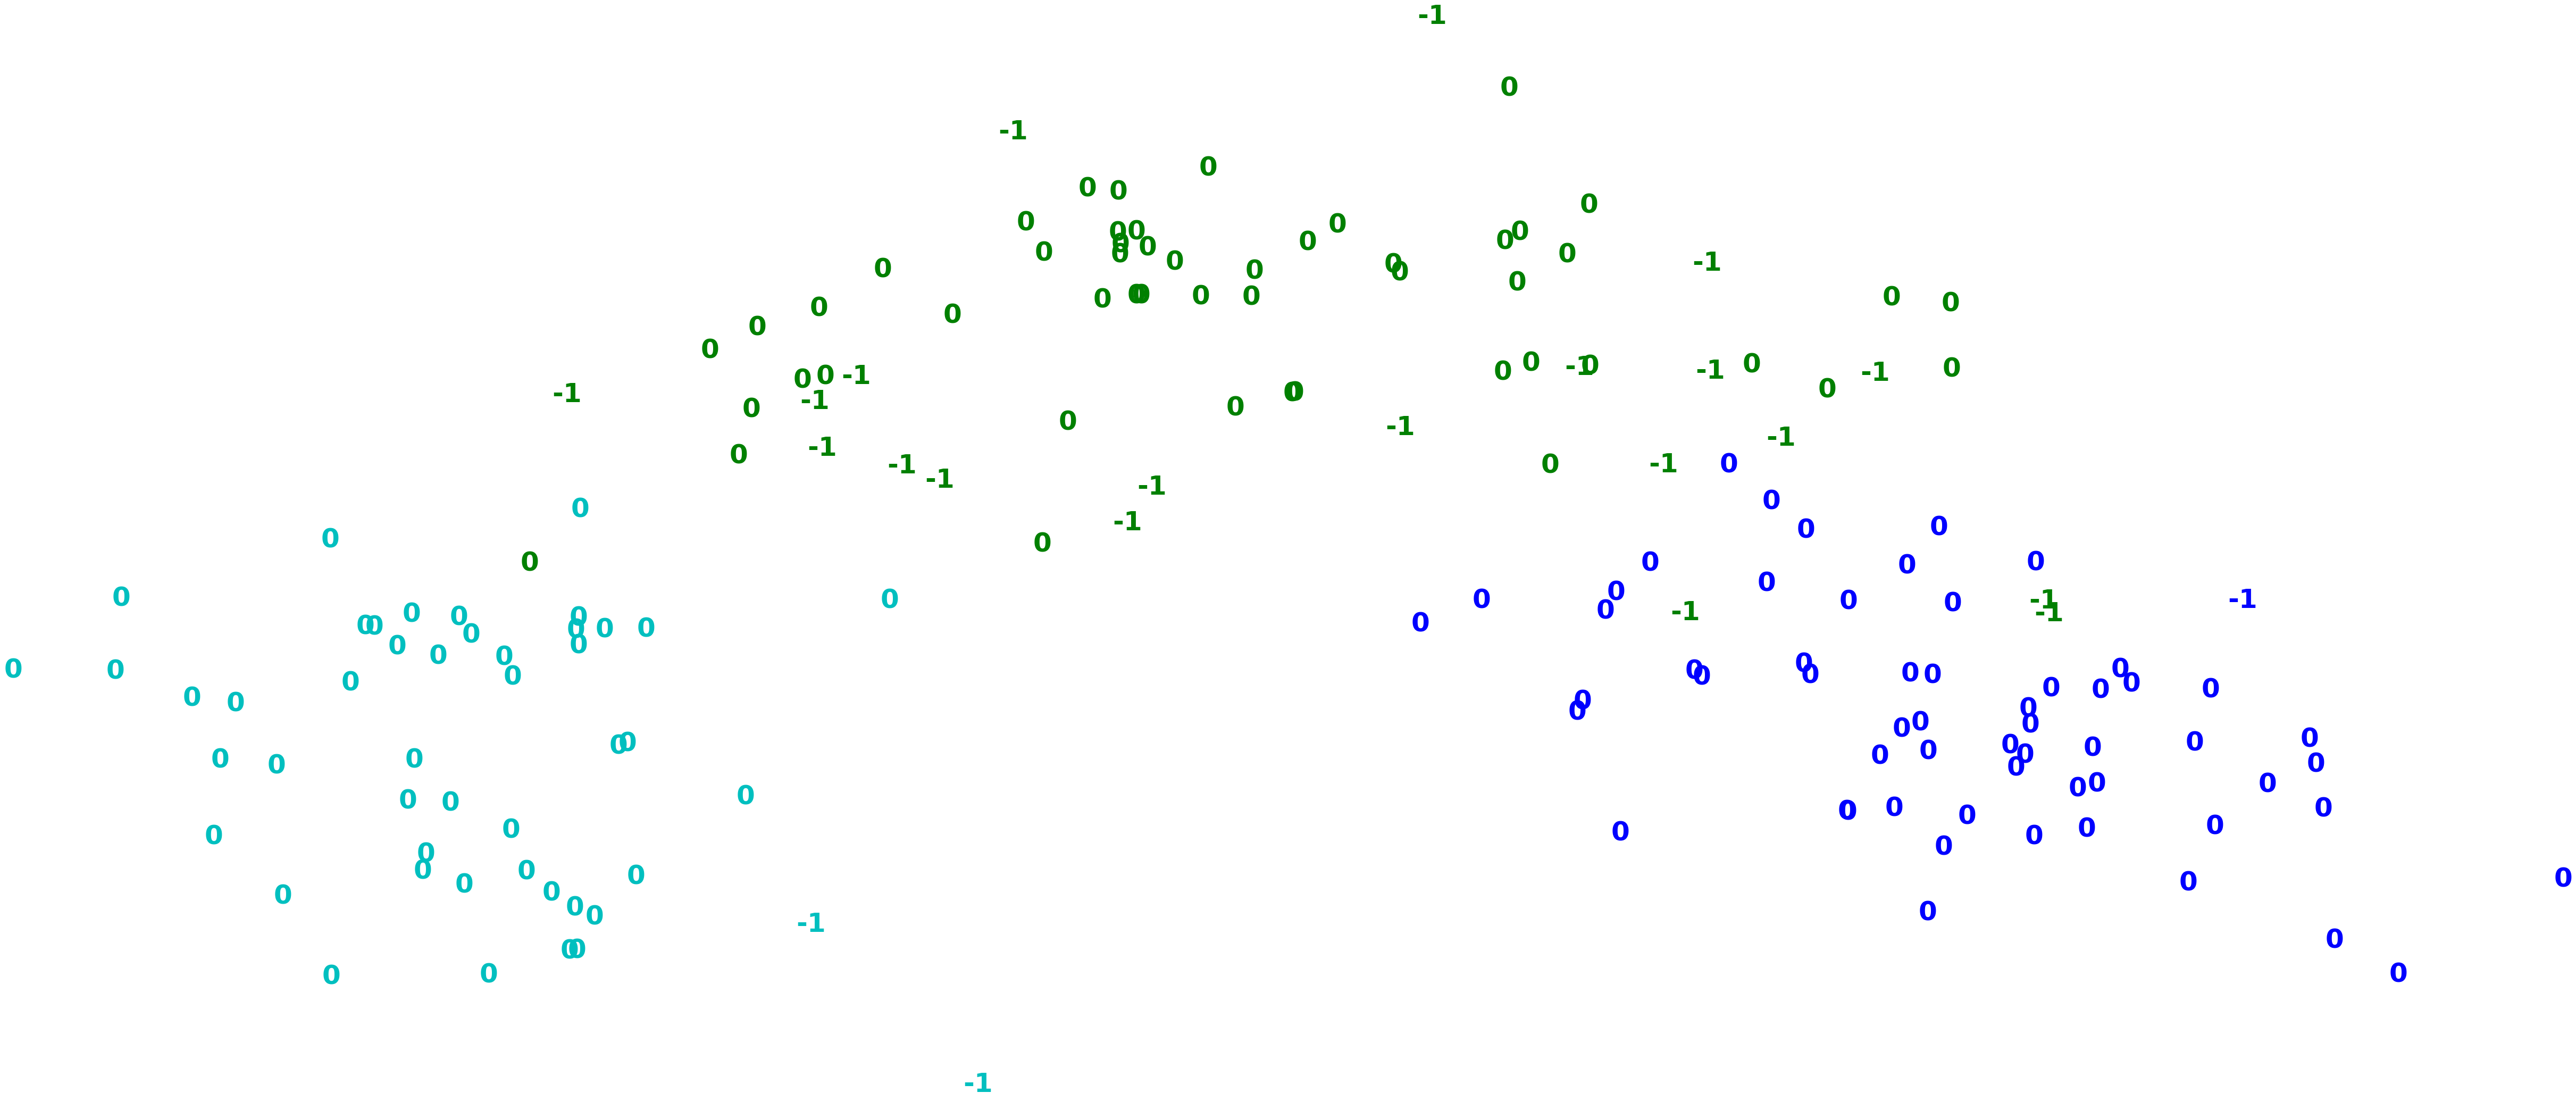

Adjusted Rand Index of the Agglomerative Clustering solution: 0.00751666562711574
The silhoutte score of the Agglomerative Clustering solution: 0.13517424550132828
epsilon: 3, min_samples: 3


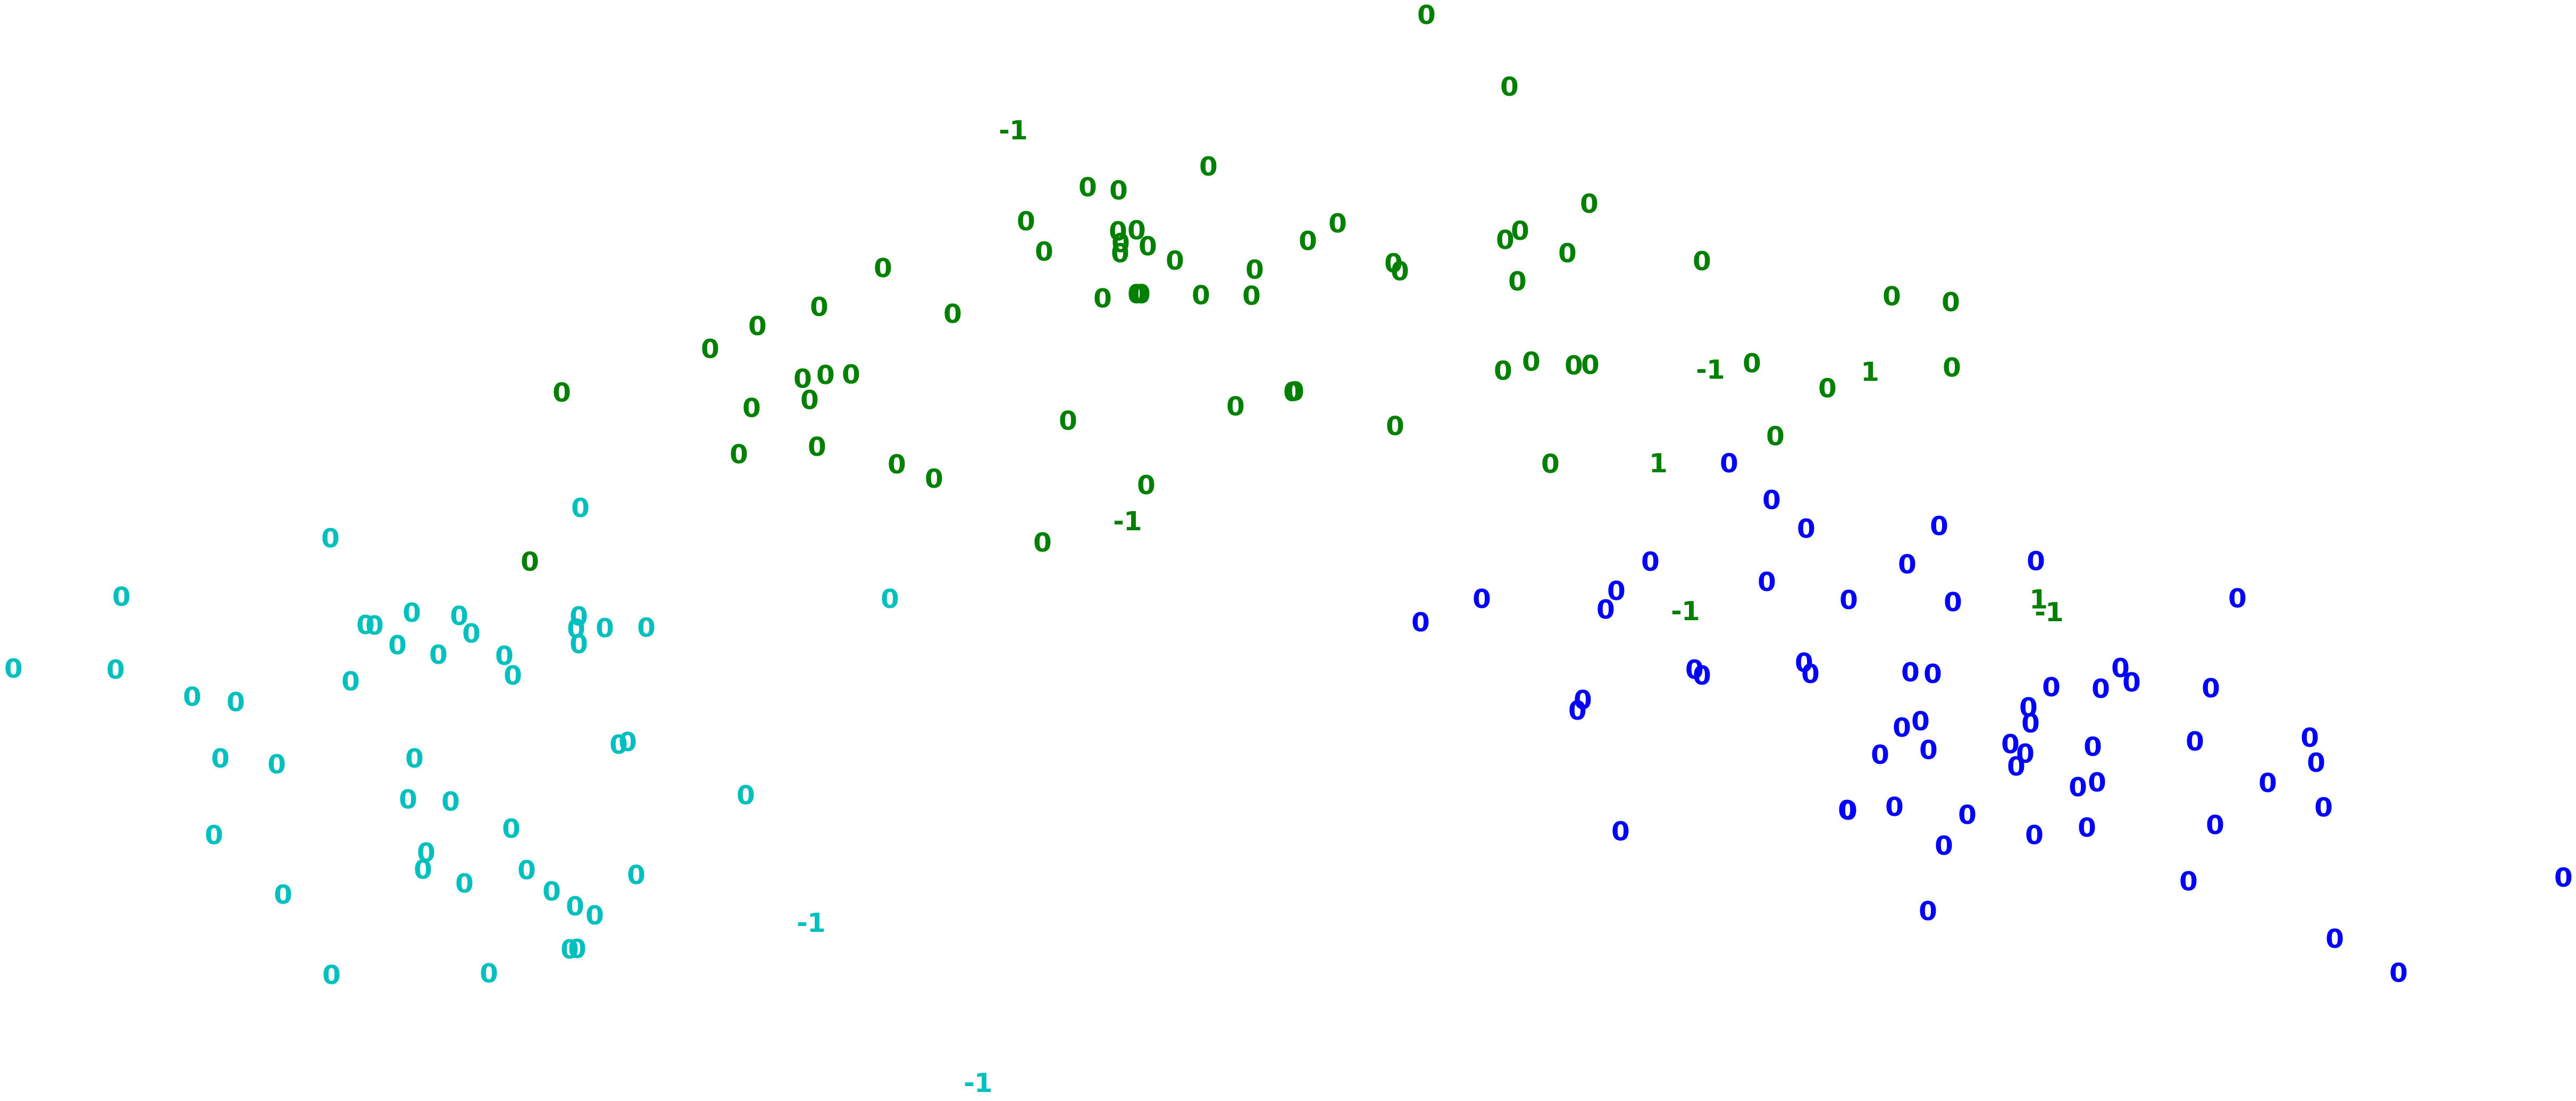

Adjusted Rand Index of the Agglomerative Clustering solution: -0.007312889391222399
The silhoutte score of the Agglomerative Clustering solution: 0.19109689467931043
epsilon: 2, min_samples: 5


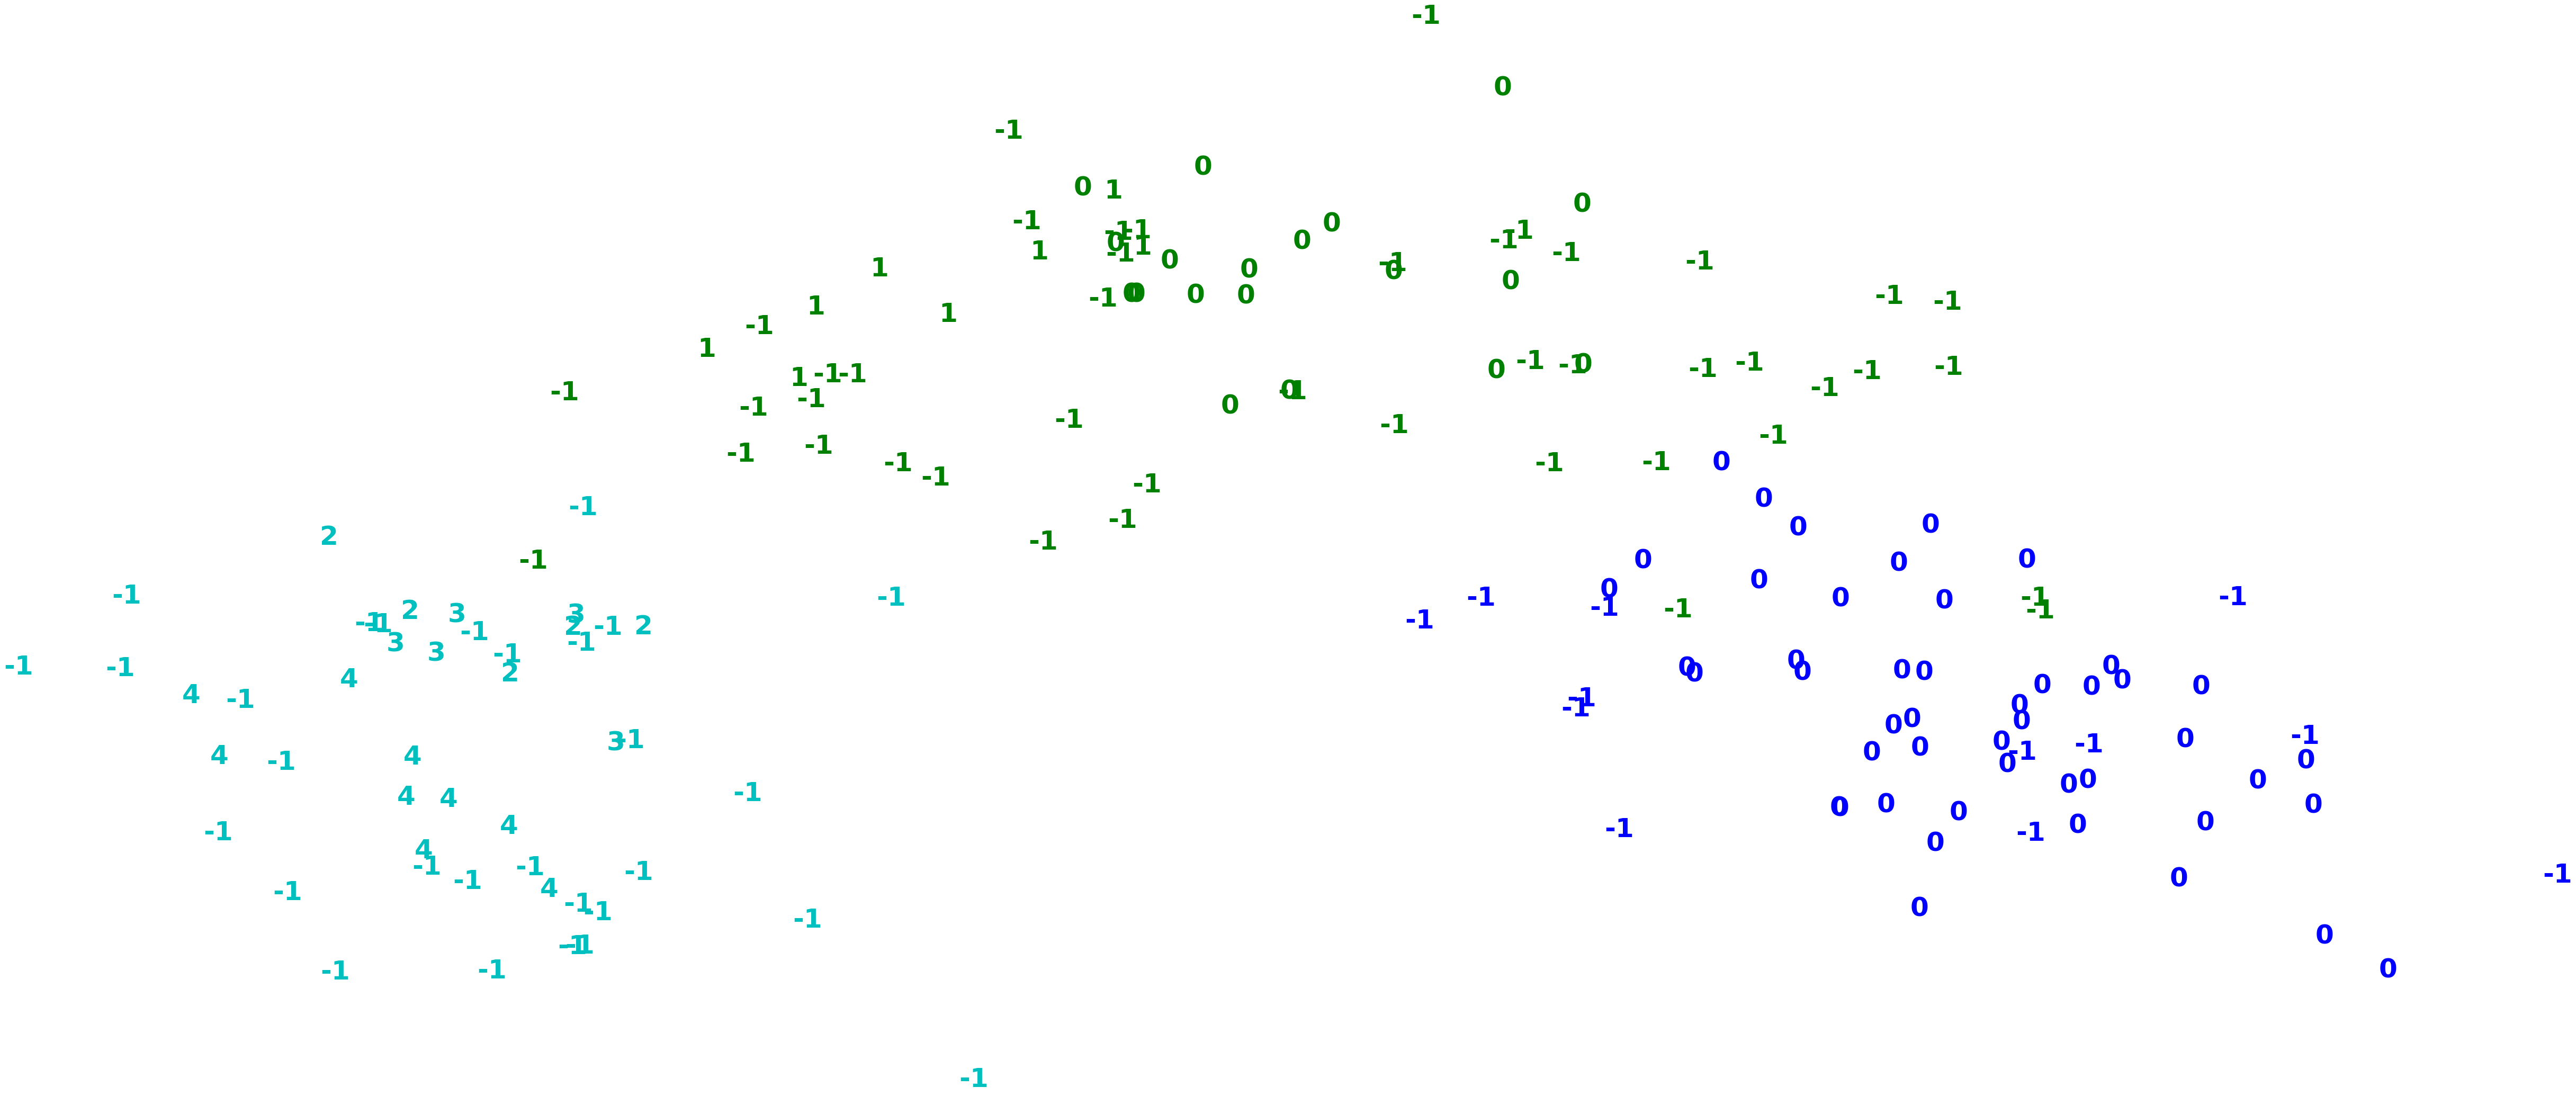

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2204912298549749
The silhoutte score of the Agglomerative Clustering solution: -0.03290613998220972
epsilon: 2.5, min_samples: 5


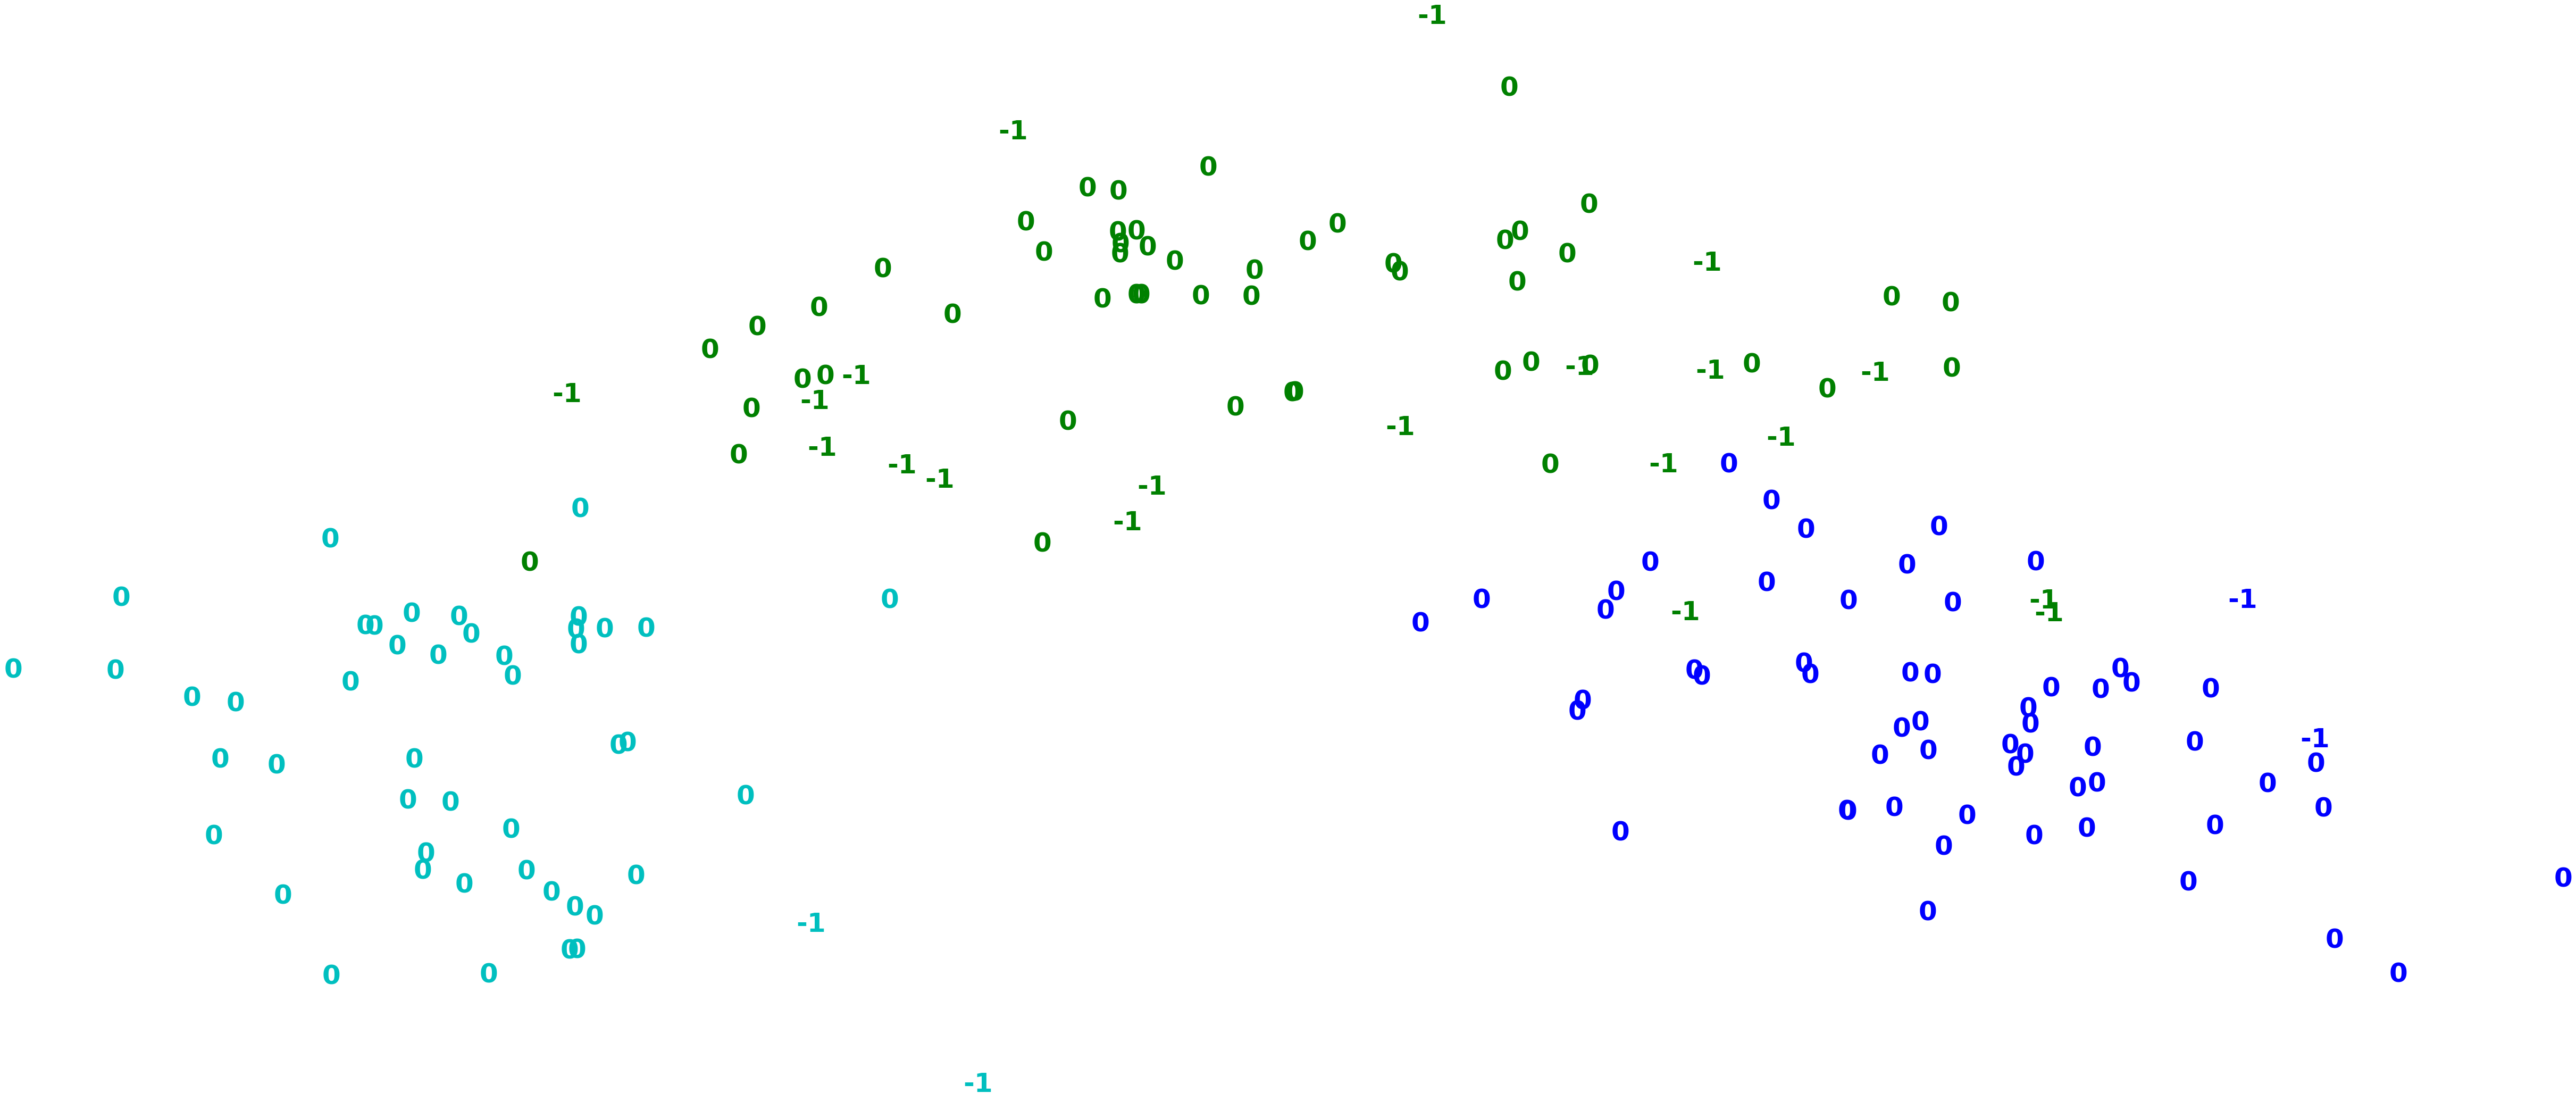

Adjusted Rand Index of the Agglomerative Clustering solution: 0.0050106740163593805
The silhoutte score of the Agglomerative Clustering solution: 0.13500379635350565
epsilon: 3, min_samples: 5


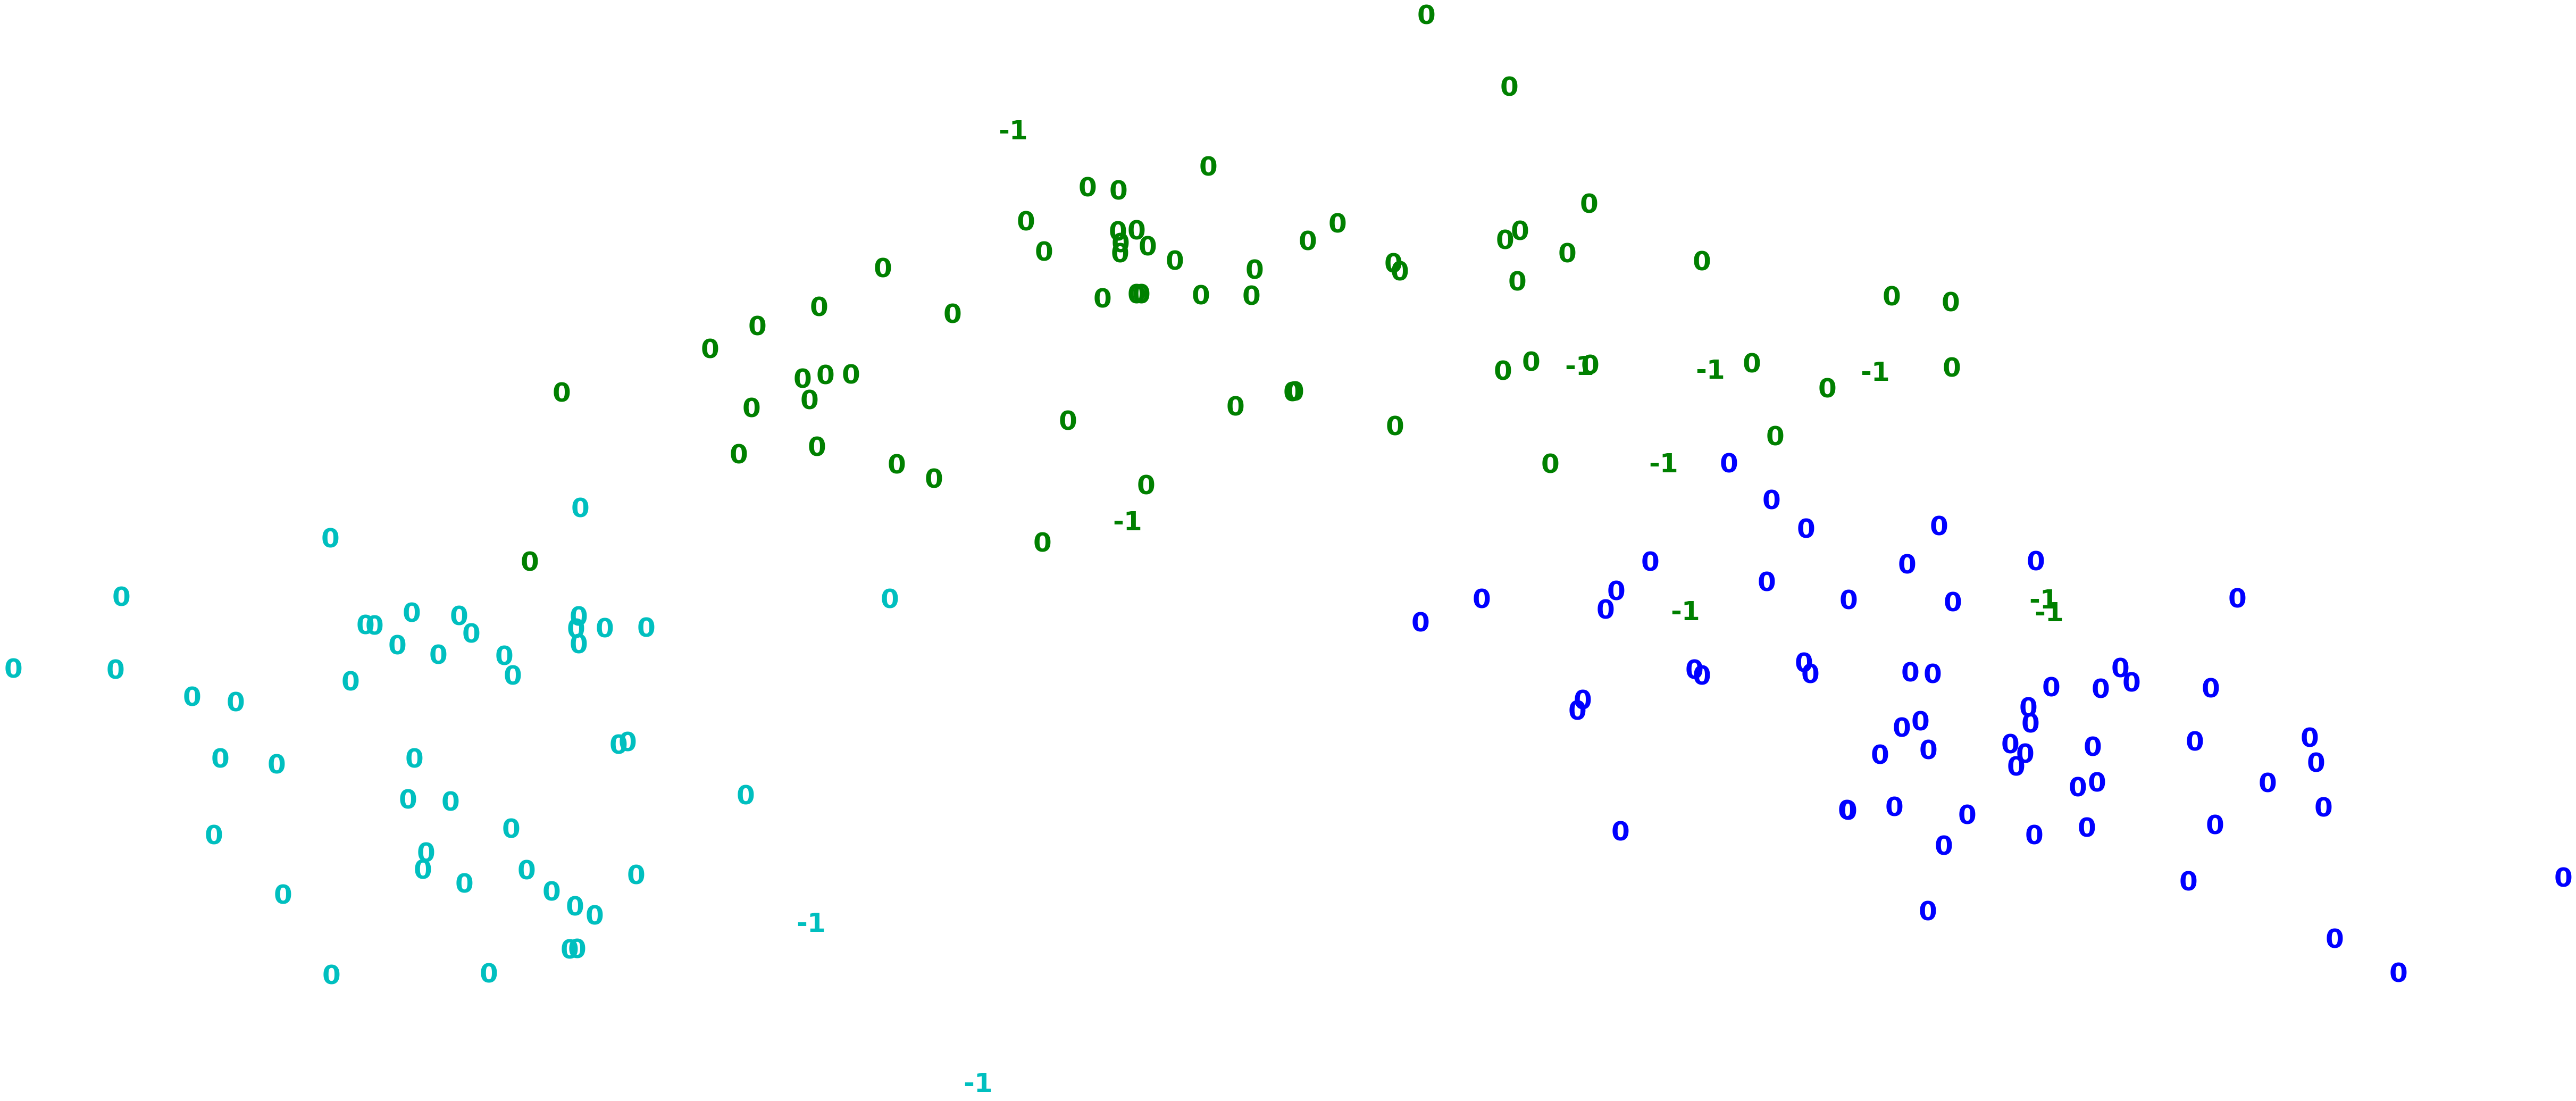

Adjusted Rand Index of the Agglomerative Clustering solution: -0.005929398352149344
The silhoutte score of the Agglomerative Clustering solution: 0.21836446281240493
epsilon: 2, min_samples: 8


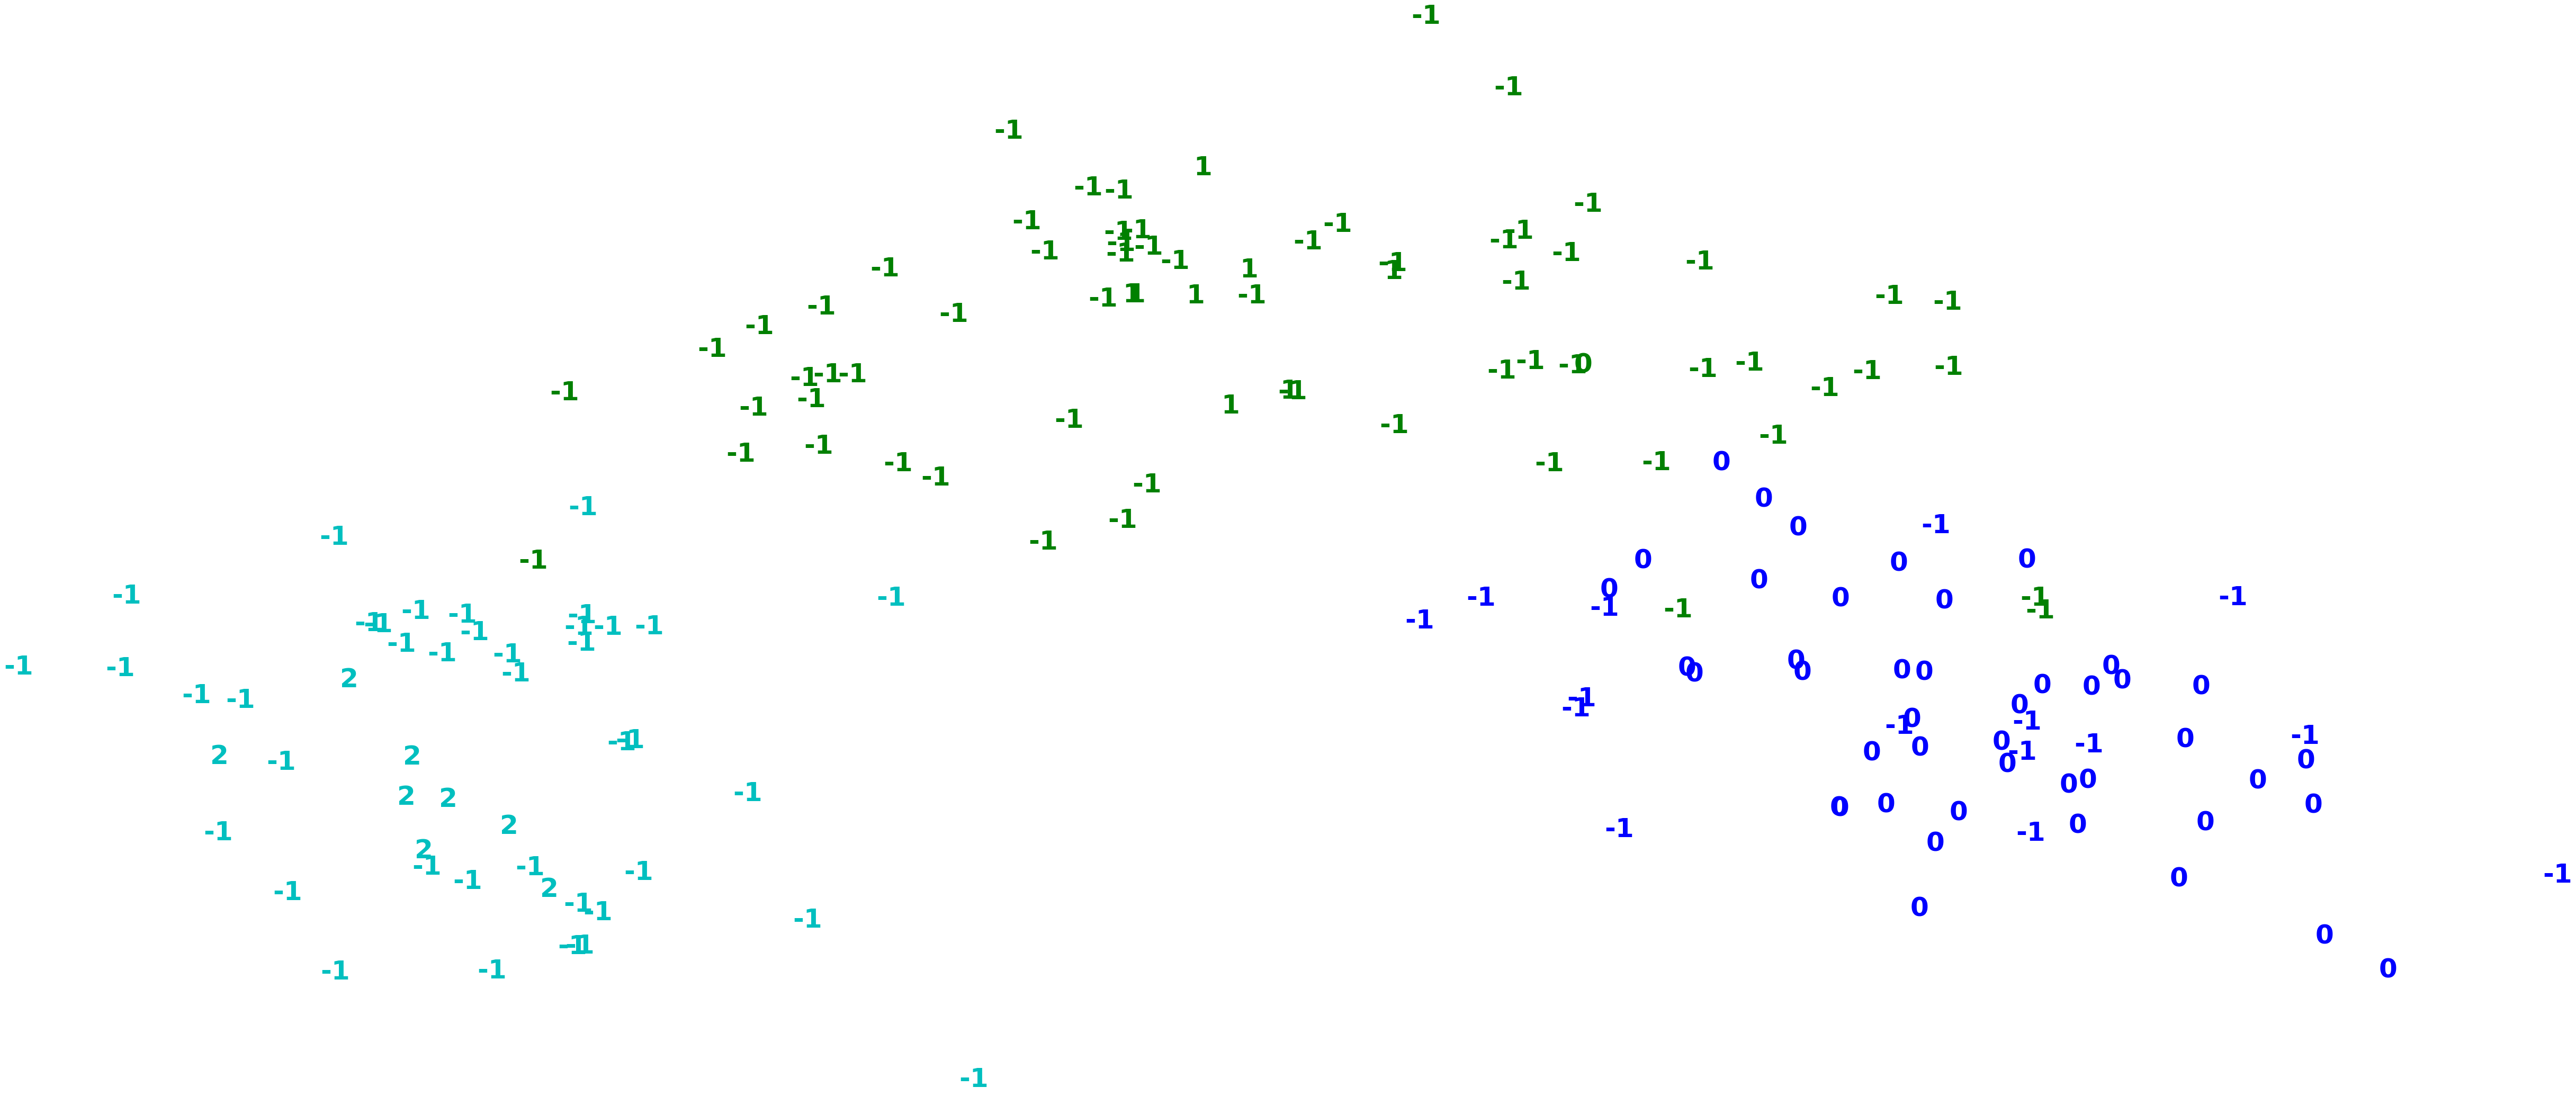

Adjusted Rand Index of the Agglomerative Clustering solution: 0.28772021604095466
The silhoutte score of the Agglomerative Clustering solution: -0.062497816633526874
epsilon: 2.5, min_samples: 8


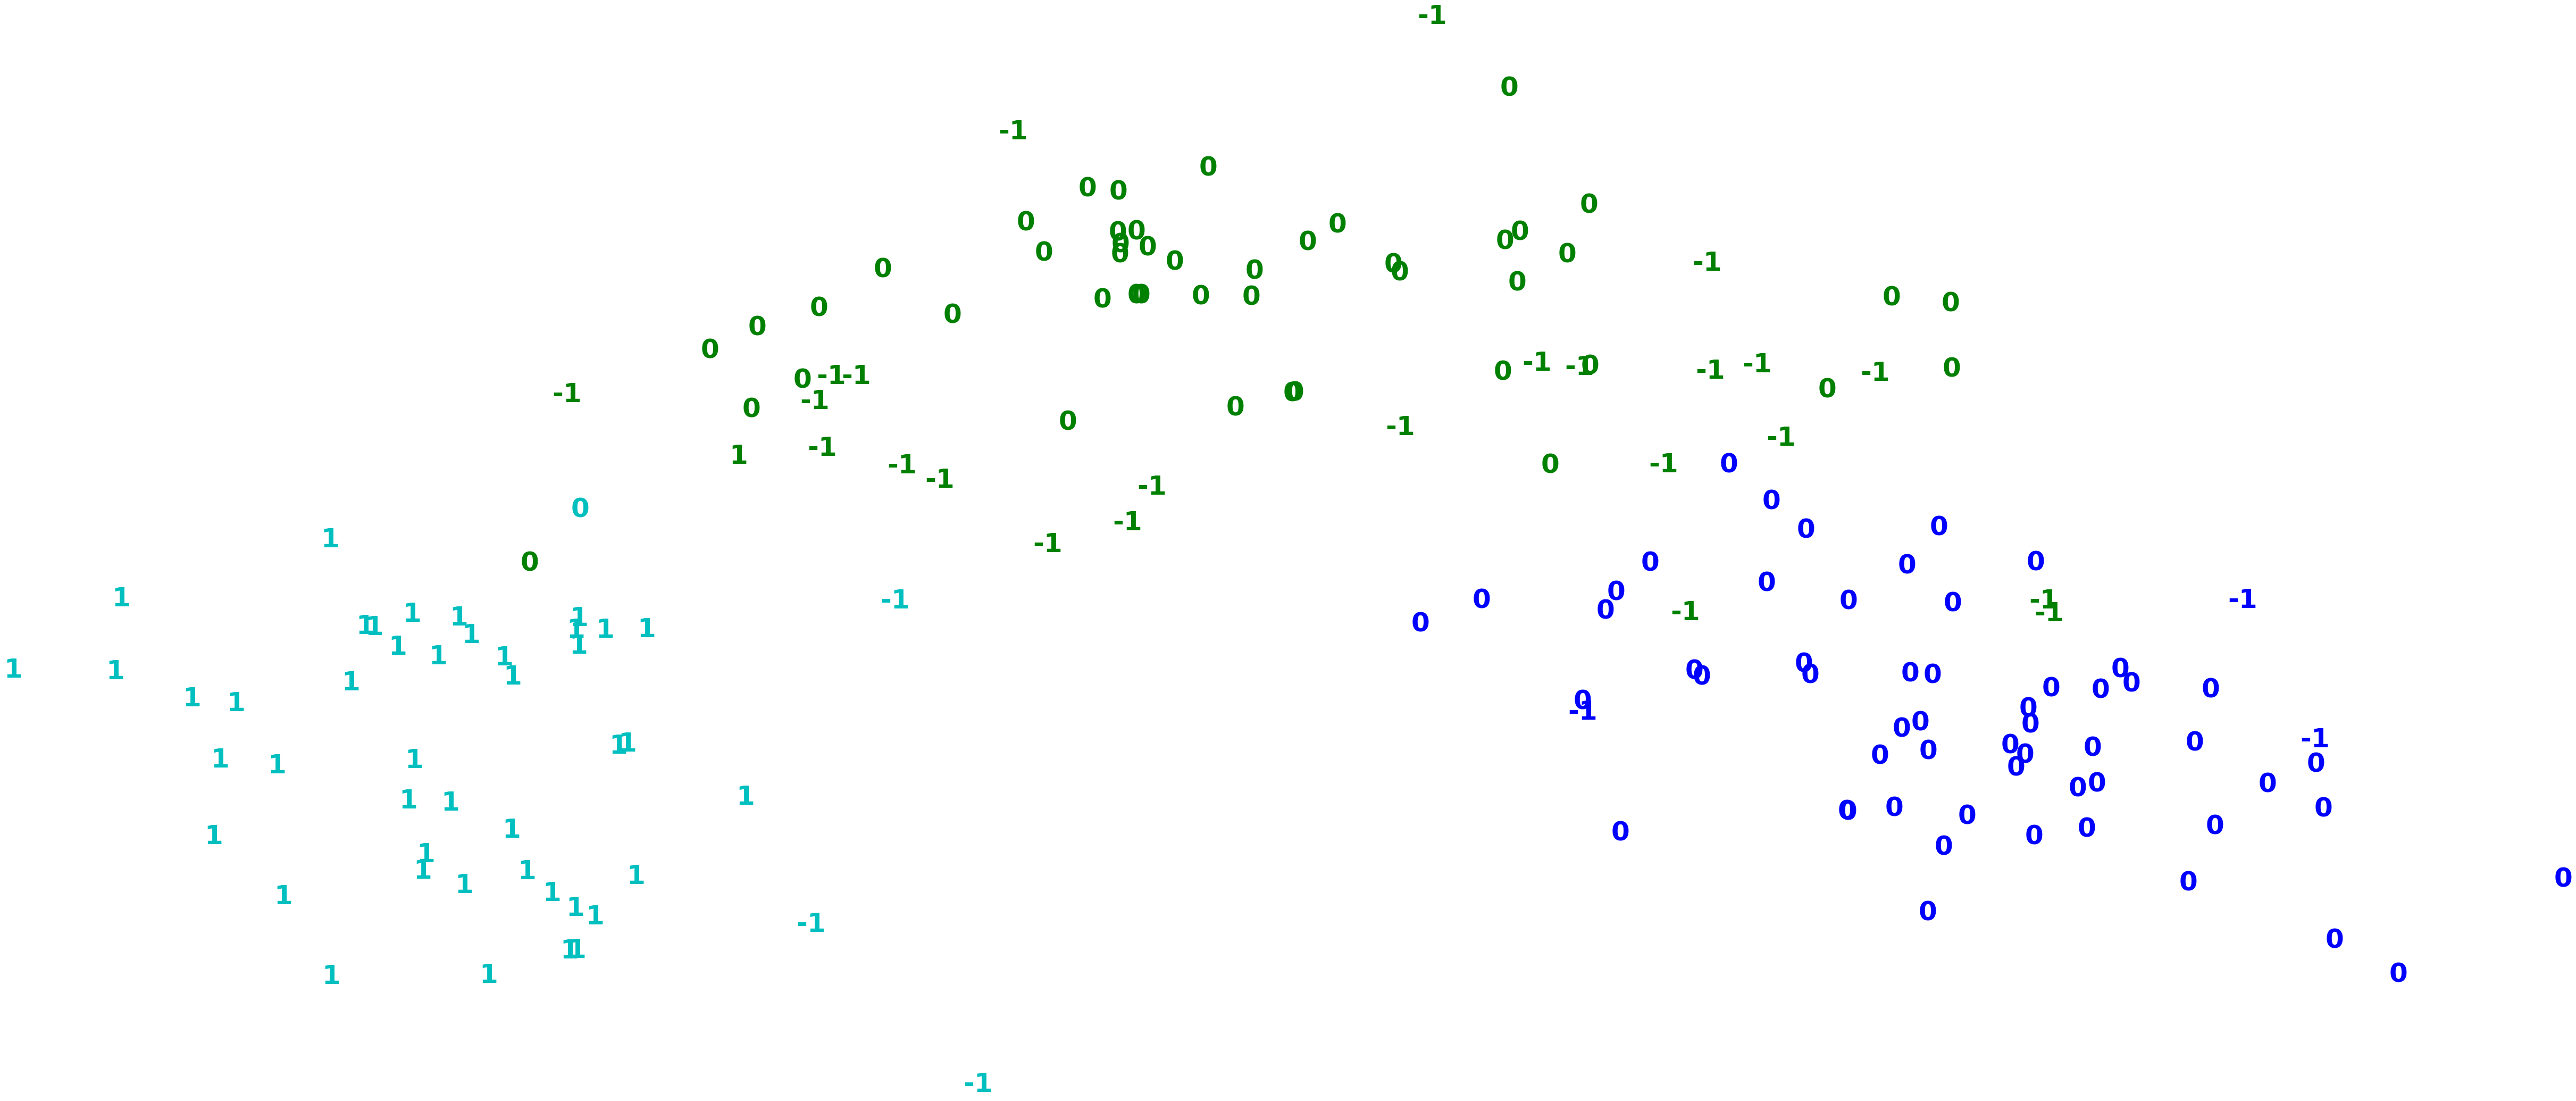

Adjusted Rand Index of the Agglomerative Clustering solution: 0.412935801156326
The silhoutte score of the Agglomerative Clustering solution: 0.2076088441129092
epsilon: 3, min_samples: 8


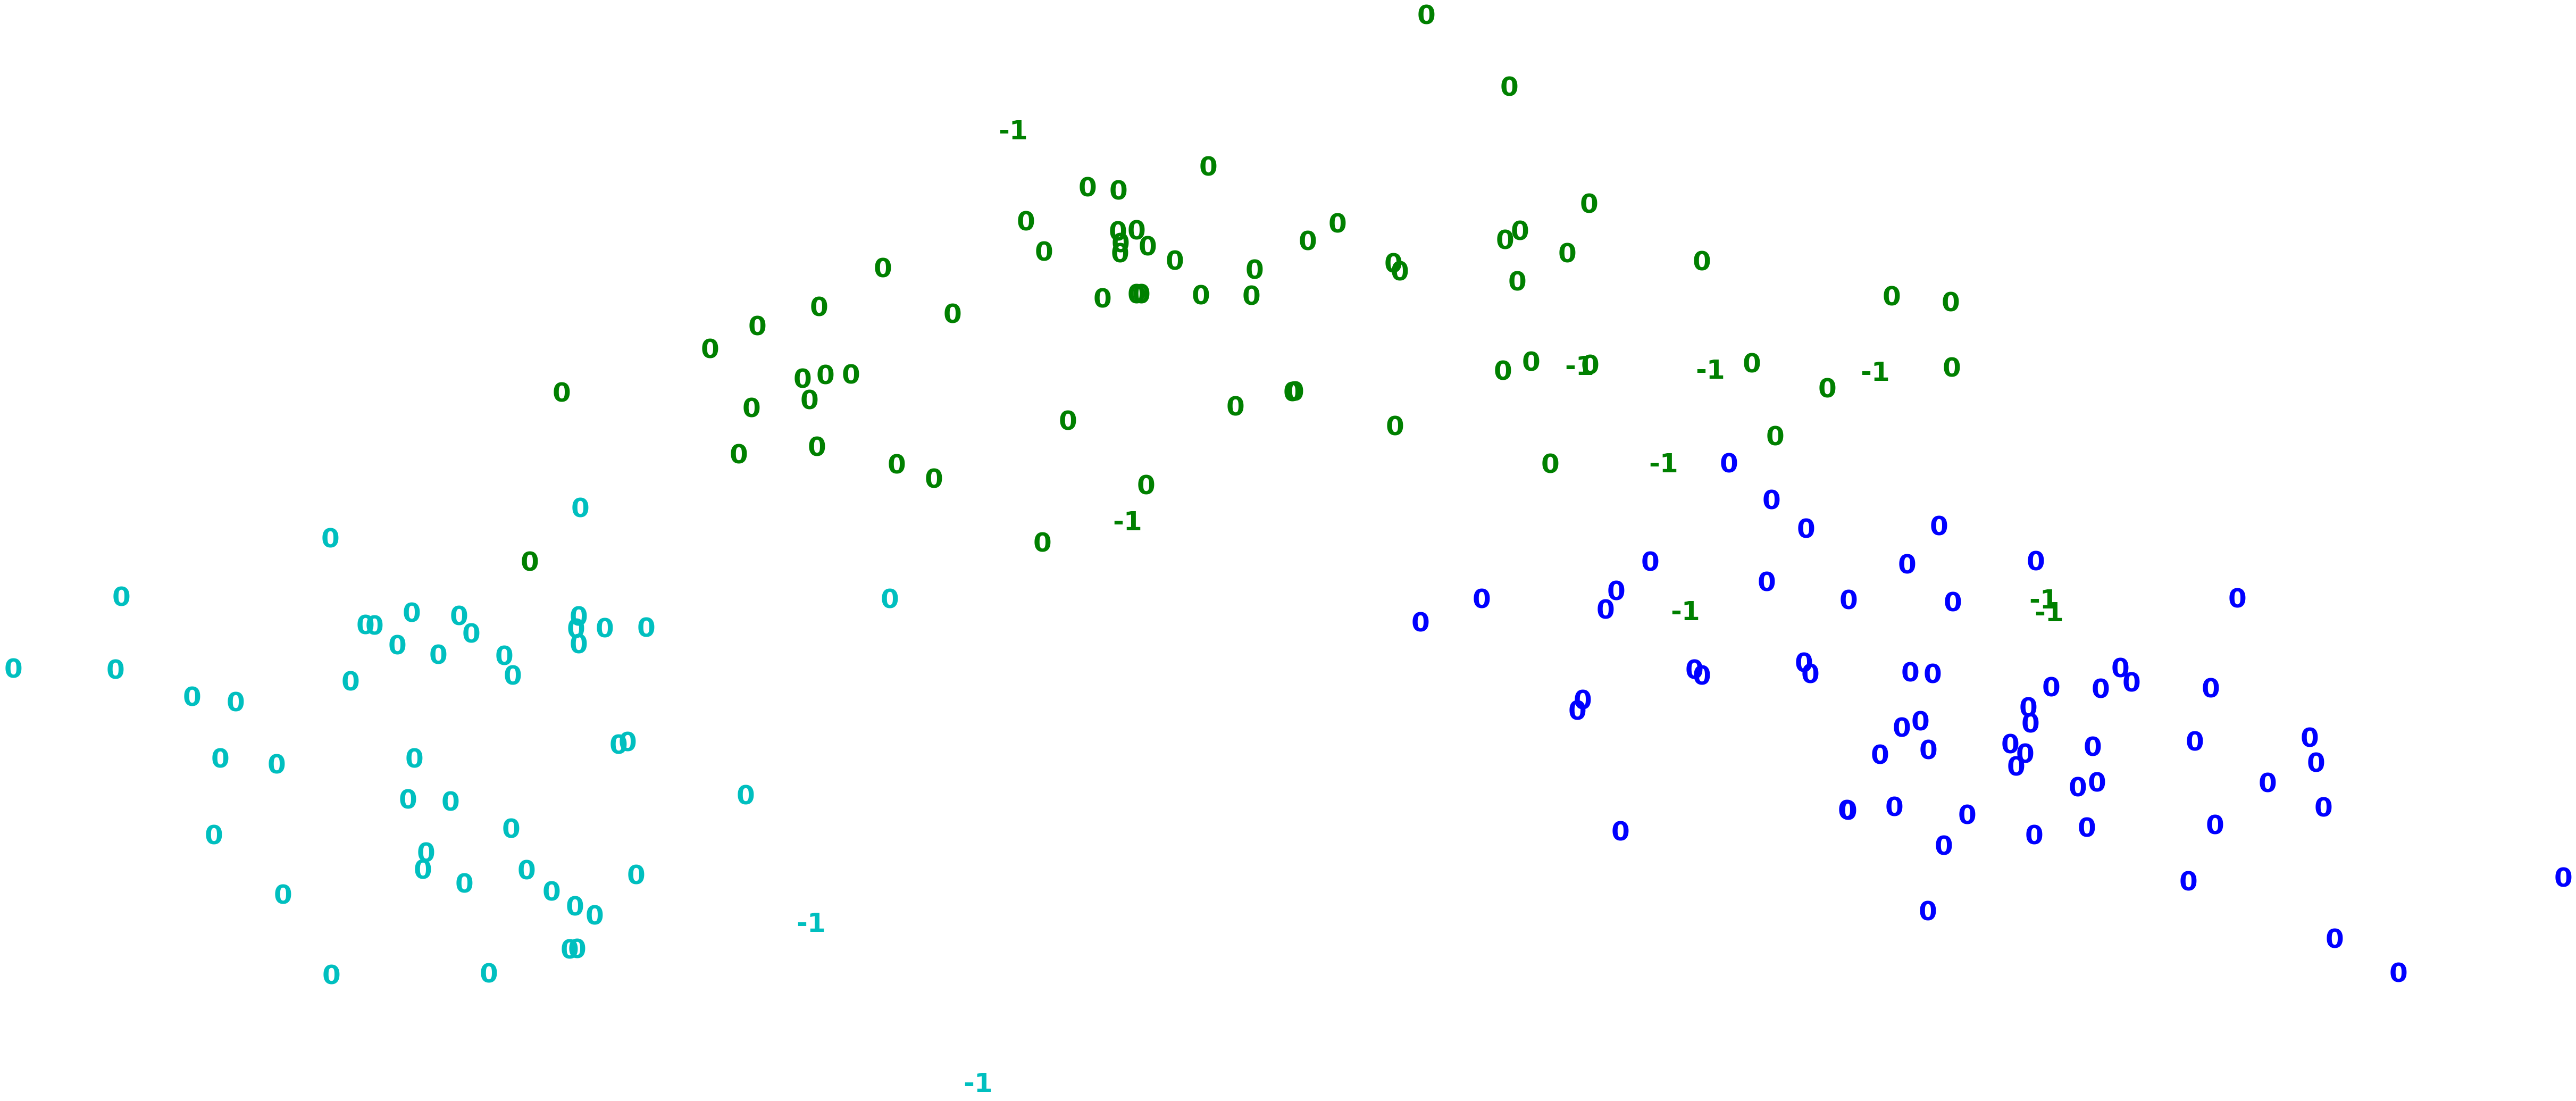

Adjusted Rand Index of the Agglomerative Clustering solution: -0.005929398352149344
The silhoutte score of the Agglomerative Clustering solution: 0.21836446281240493


In [ ]:
for k in [3,5,8]:
  for j in [2,2.5,3]:
    print('epsilon: {}, min_samples: {}'.format(j,k))
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=j, min_samples=k)

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10,5))
    colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                color=colours[y[i]],
                fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

    print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
    print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

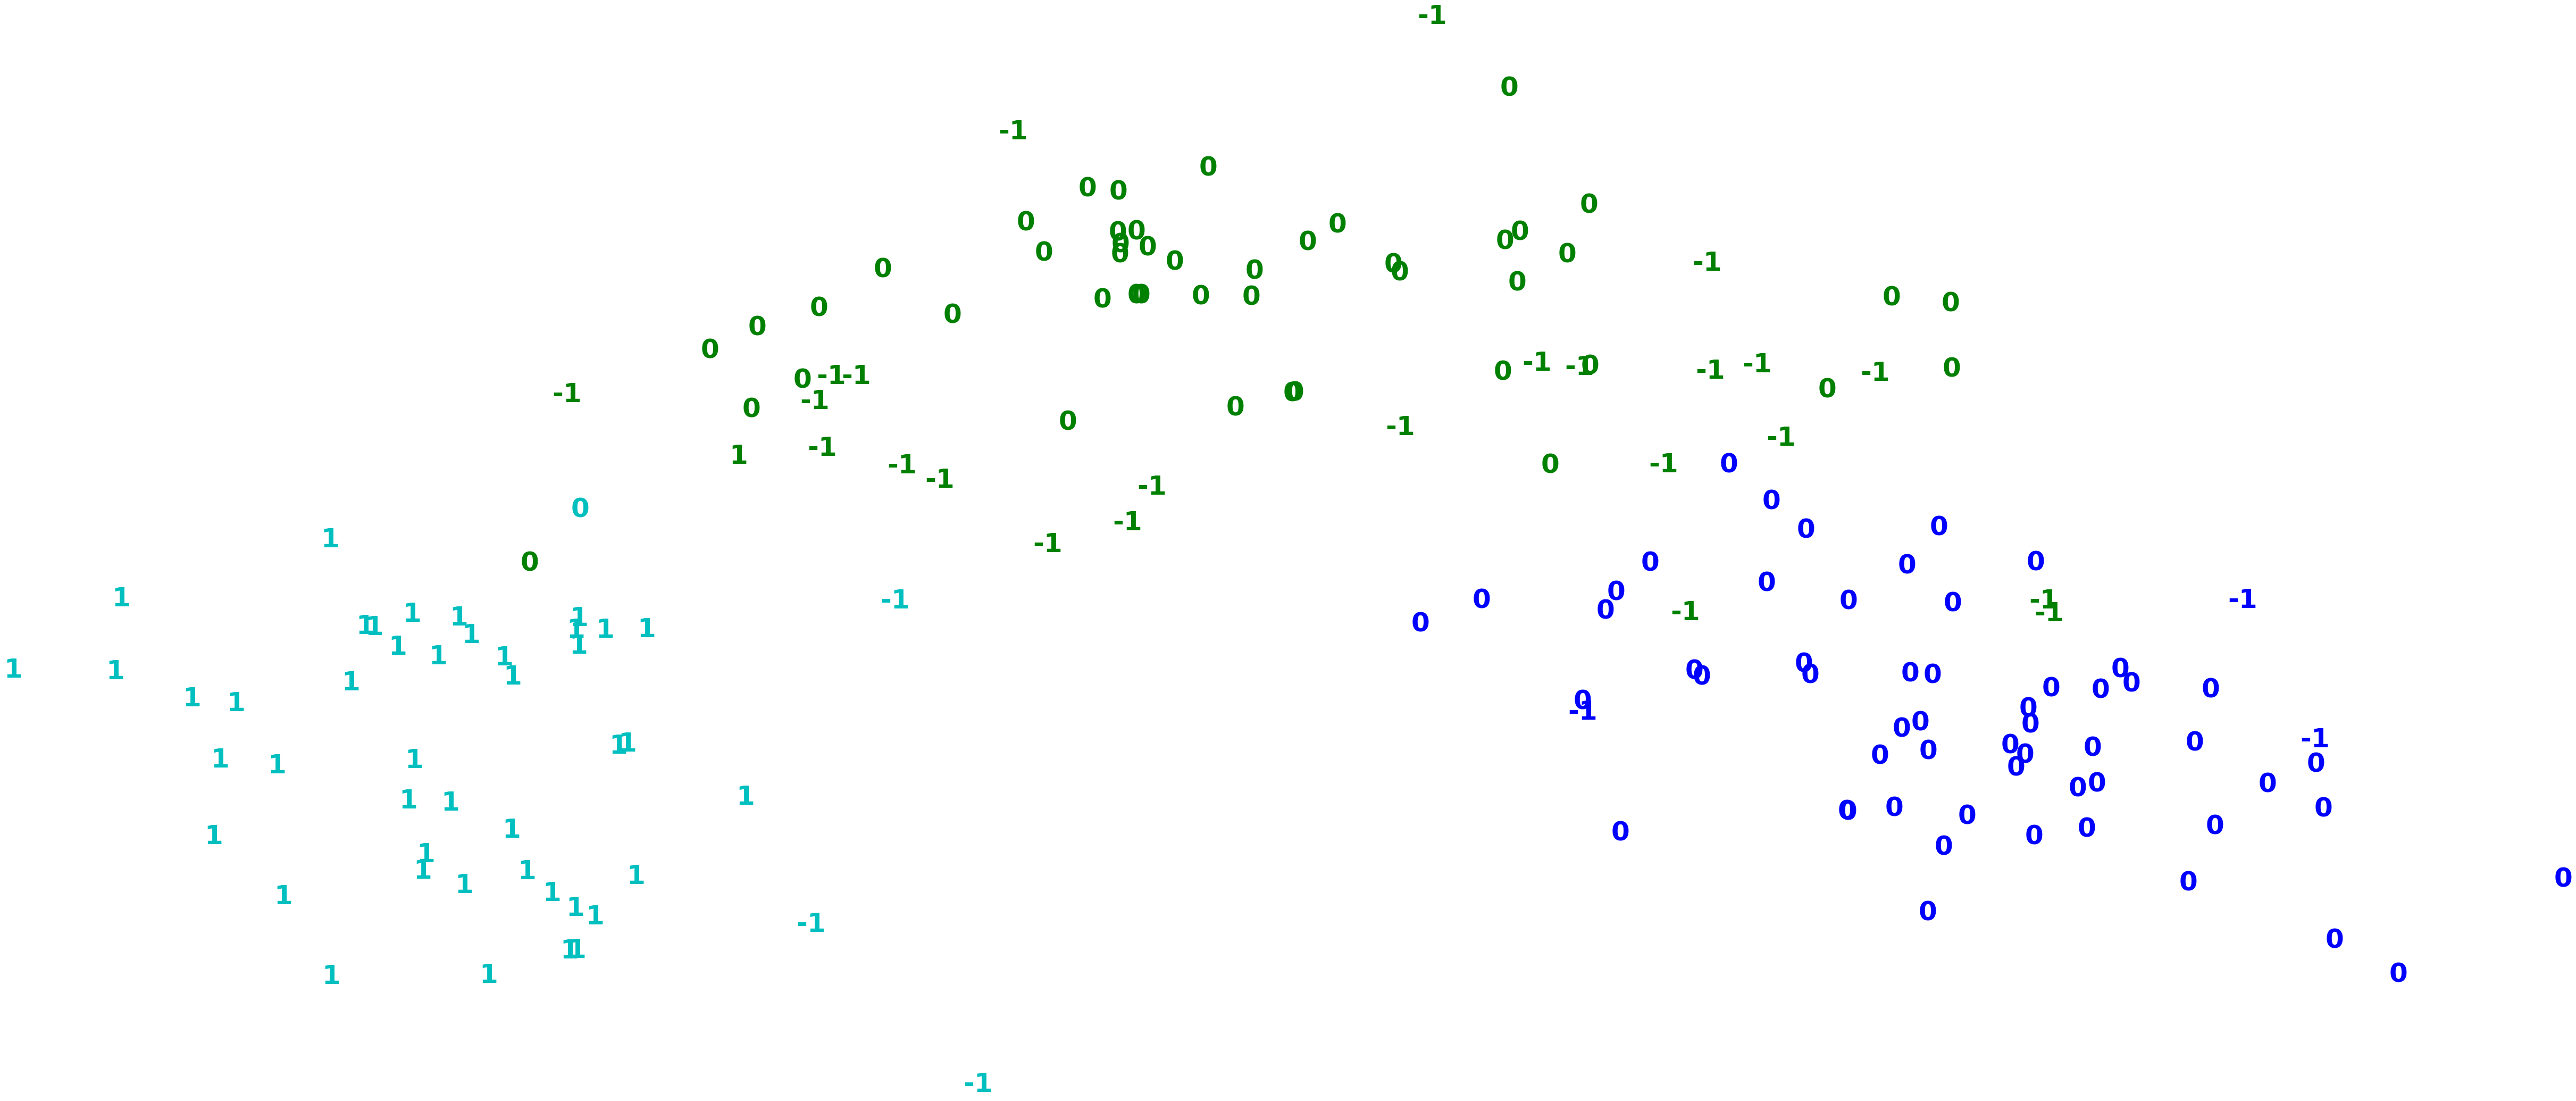

Adjusted Rand Index of the Agglomerative Clustering solution: 0.412935801156326
The silhoutte score of the Agglomerative Clustering solution: 0.2076088441129092


In [ ]:

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2.5,min_samples=8)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
performance.loc[2] = ['DBSCAN', 'X_std', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_std, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score:  0.412935801156326
Silhouette score:  0.2076088441129092


In [ ]:
performance

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609

##GMM

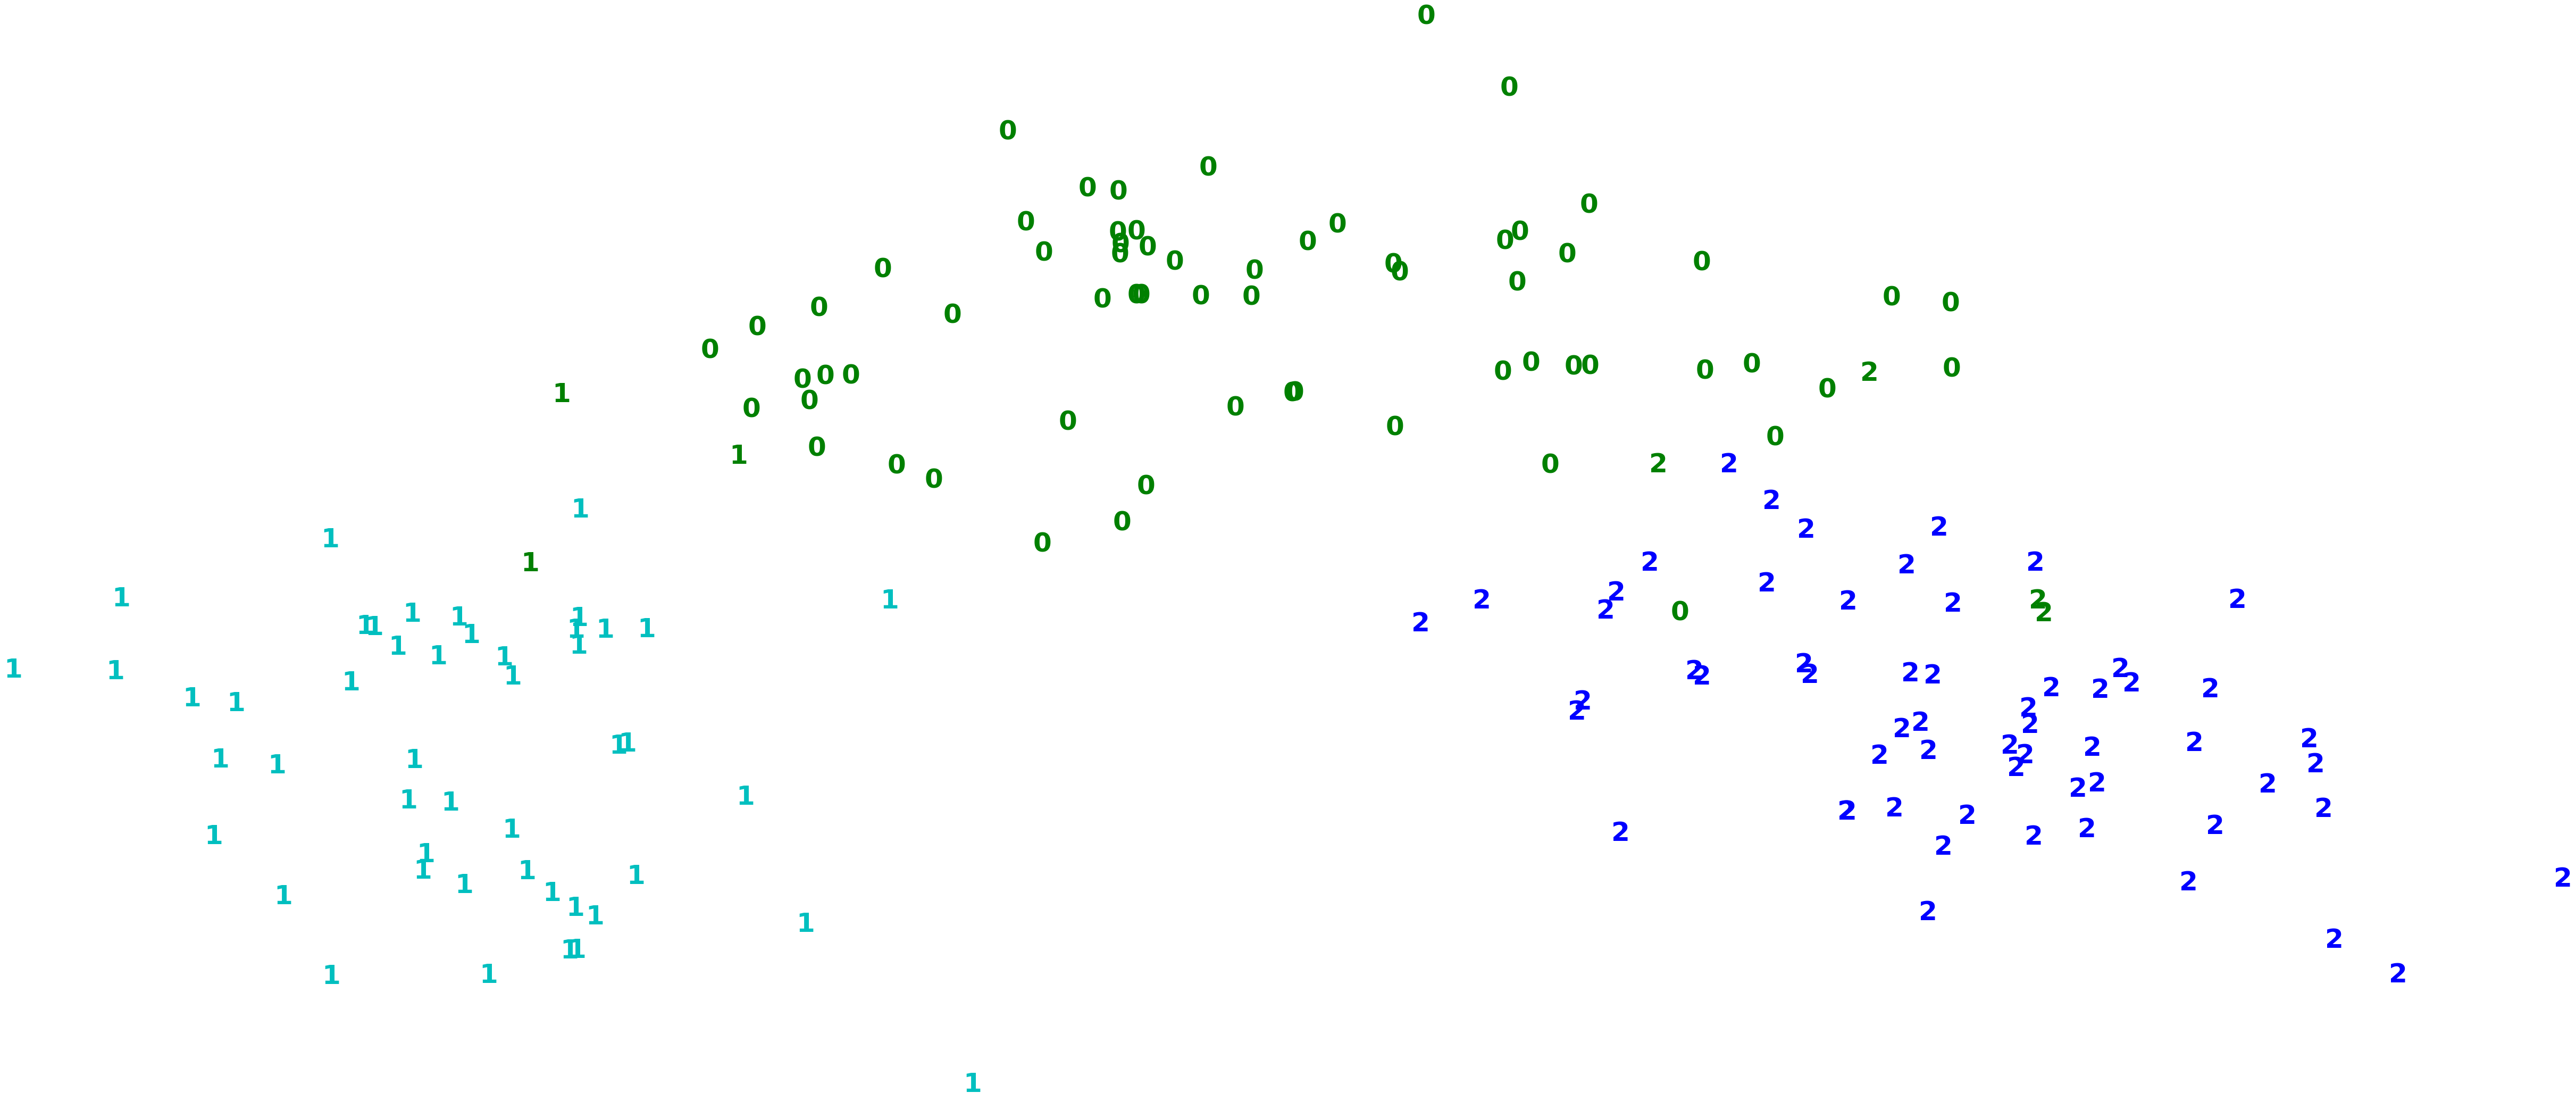

Adjusted Rand Index of the Agglomerative Clustering solution: 0.8803997758776985
The silhoutte score of the Agglomerative Clustering solution: 0.2844212860533542


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
performance.loc[3] = ['GMM', 'X_std', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_std, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score:  0.8803997758776985
Silhouette score:  0.2844212860533542


In [ ]:
performance

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421

#Clustering Algorithms Using PCA

##K-means

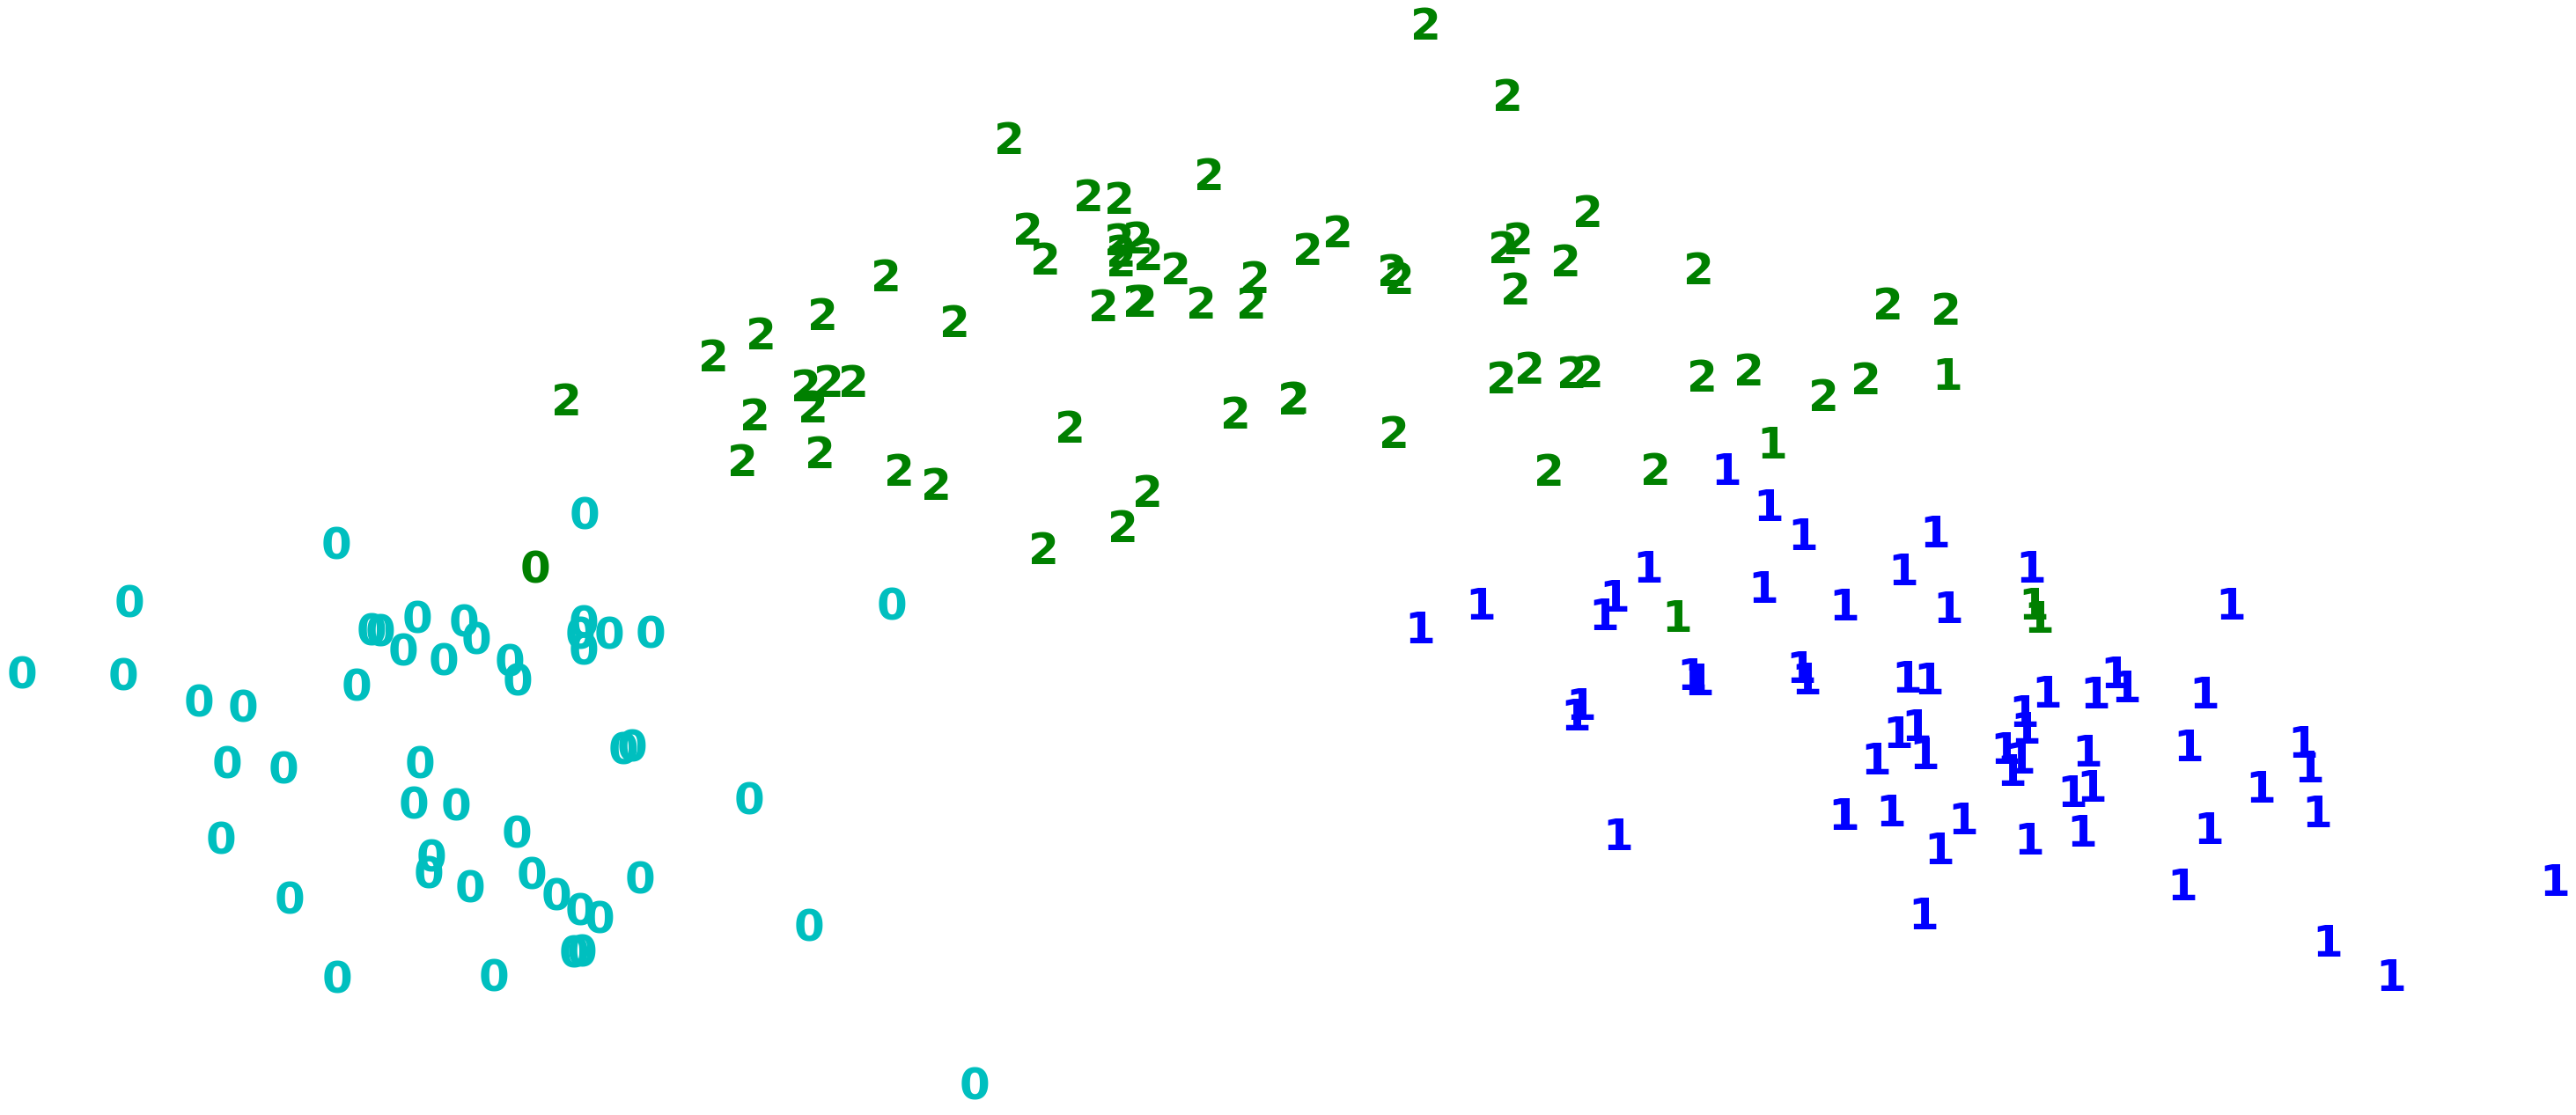

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3,random_state=123)

# Fit model
kmeans_cluster.fit(X_pca)
y_pred = kmeans_cluster.predict(X_pca)
pca = PCA(n_components=2).fit_transform(X_pca)

plt.figure(figsize=(6,3))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for j in range(len(y_pred)):
  plt.text(pca[j, 0], pca[j, 1], str(y_pred[j]),
        color=colours[y[j]],
        fontdict={'weight': 'bold', 'size': 50}
      )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Almost perfect! Lets evaluate with ARI and silhouette score...

In [ ]:
performance.loc[4] = ['K-Means', 'X_pca', metrics.adjusted_rand_score(y, y_pred),metrics.silhouette_score(X_pca, labels, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, y_pred))
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_pca)
print('Silhouette score: ',metrics.silhouette_score(X_pca, labels, metric='euclidean'))

ARI score:  0.8950582389649661
Silhouette score:  0.5610505693103246


In [ ]:
performance.head()

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336

##Agglomerative Clustering

complete


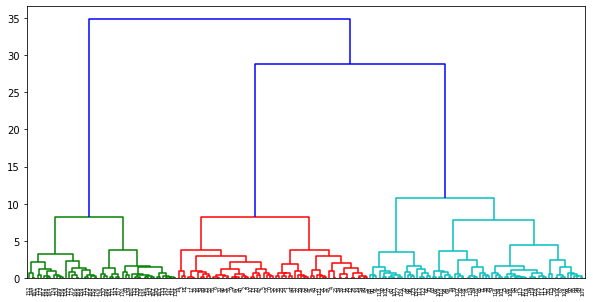

average


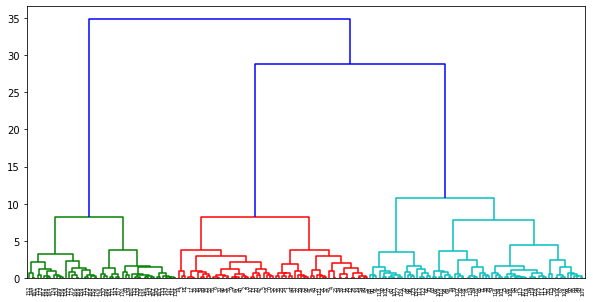

ward


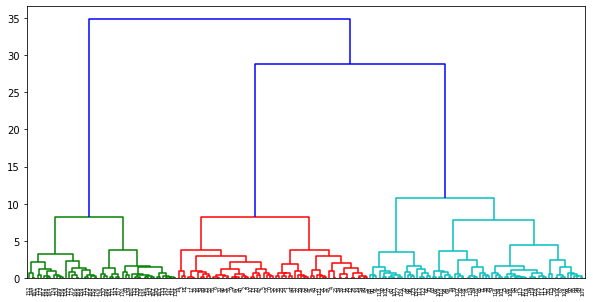

In [ ]:
for i in ['complete','average','ward']:
  plt.figure(figsize=(10,5))
  print(i)
  dendrogram(linkage(X_pca, method='ward'))
  plt.show()
  

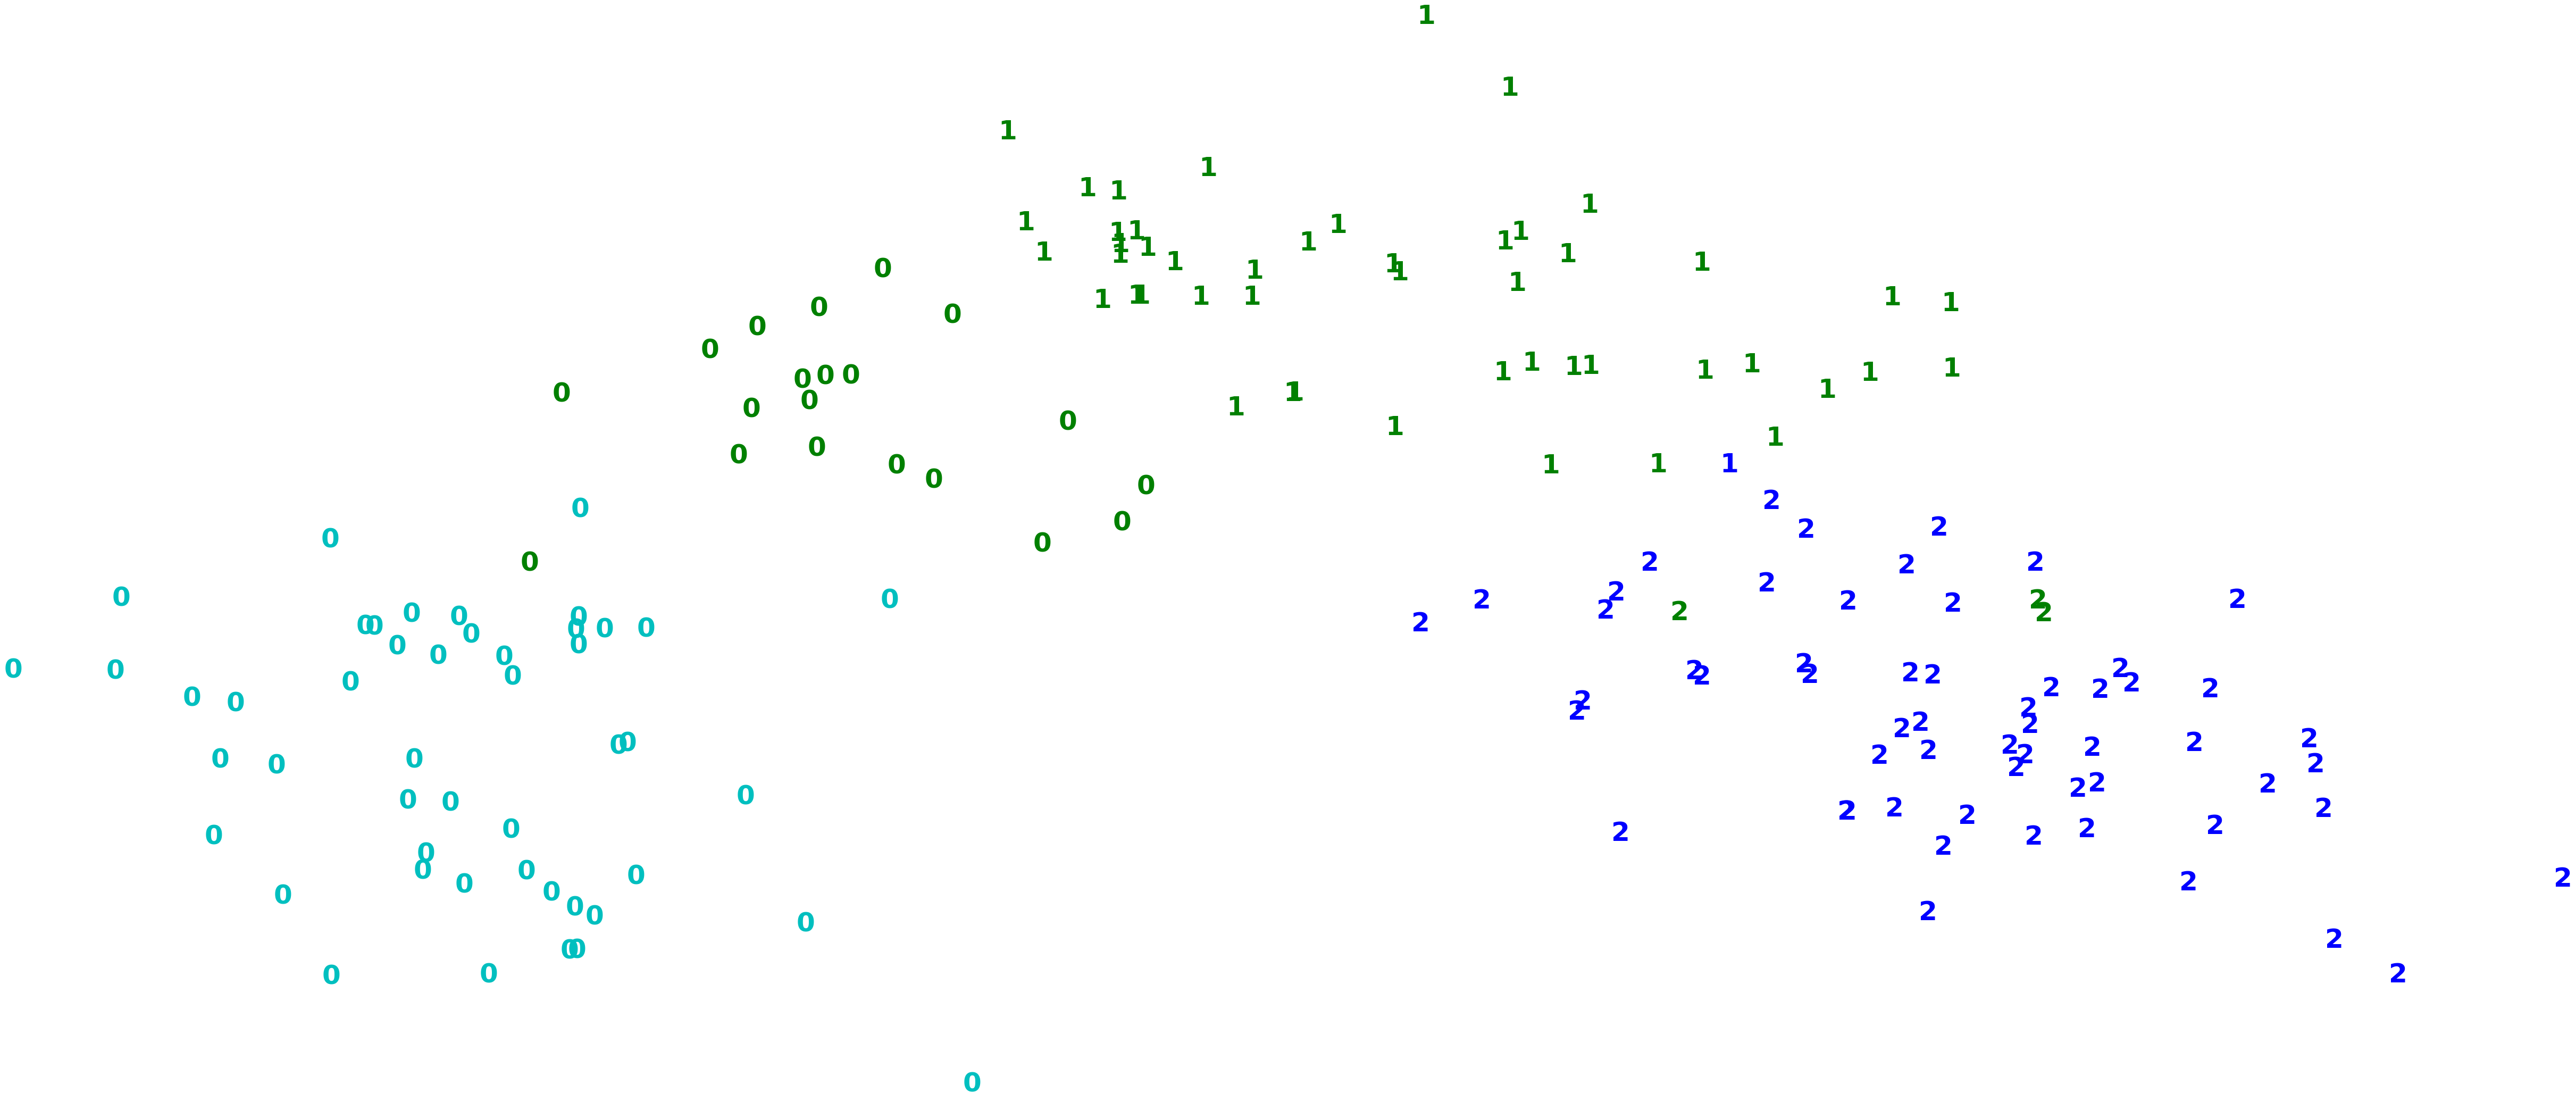

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6583461164879671
The silhoutte score of the Agglomerative Clustering solution: 0.5135476900345354


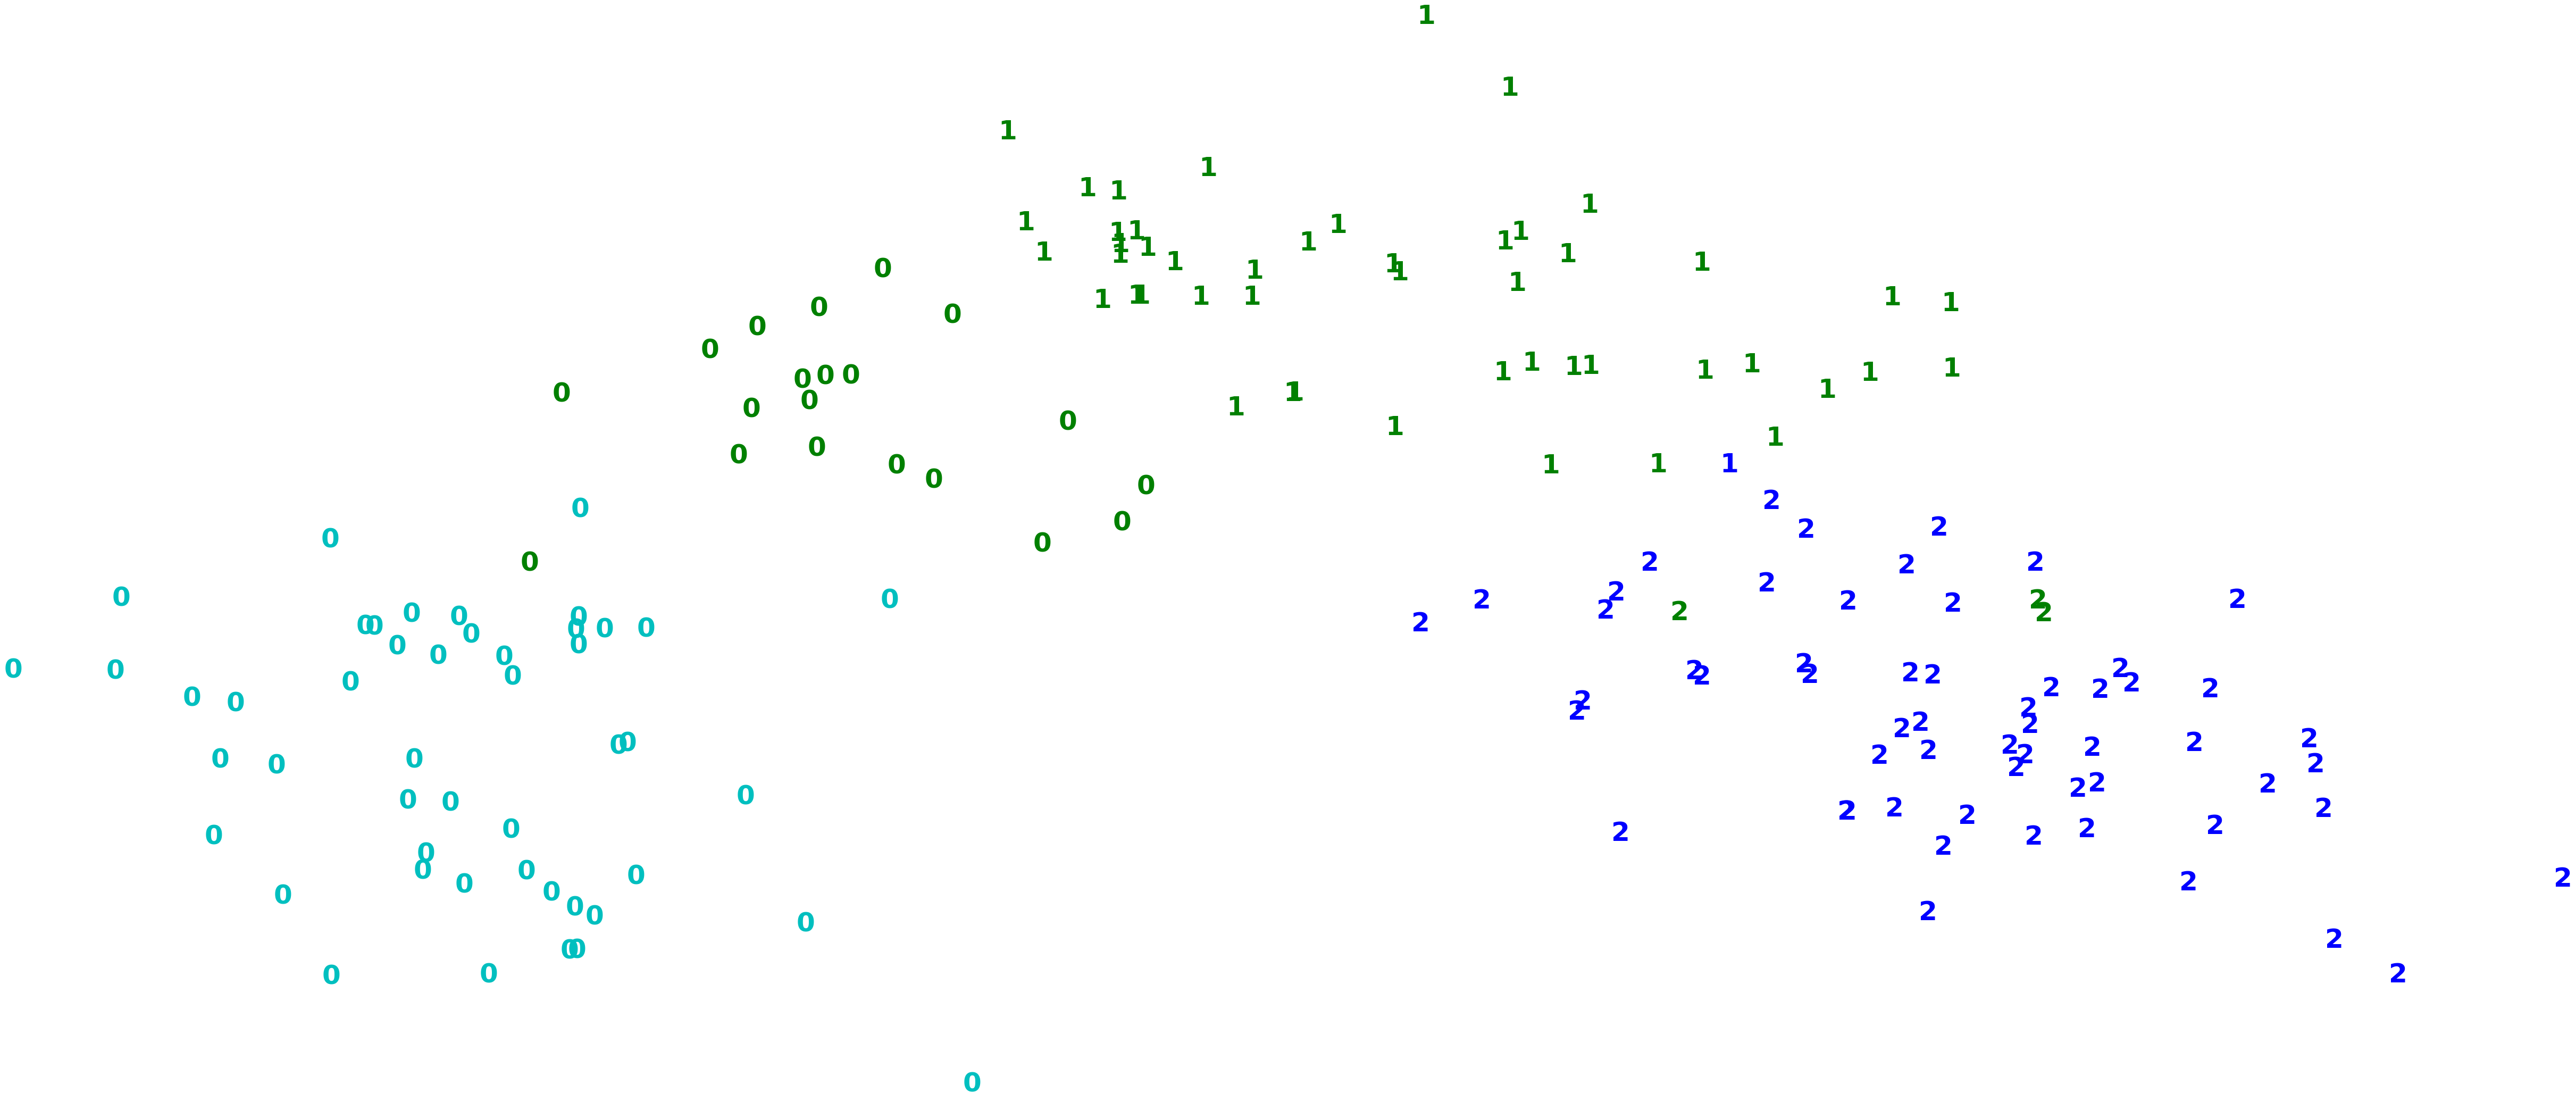

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6583461164879671
The silhoutte score of the Agglomerative Clustering solution: 0.5135476900345354


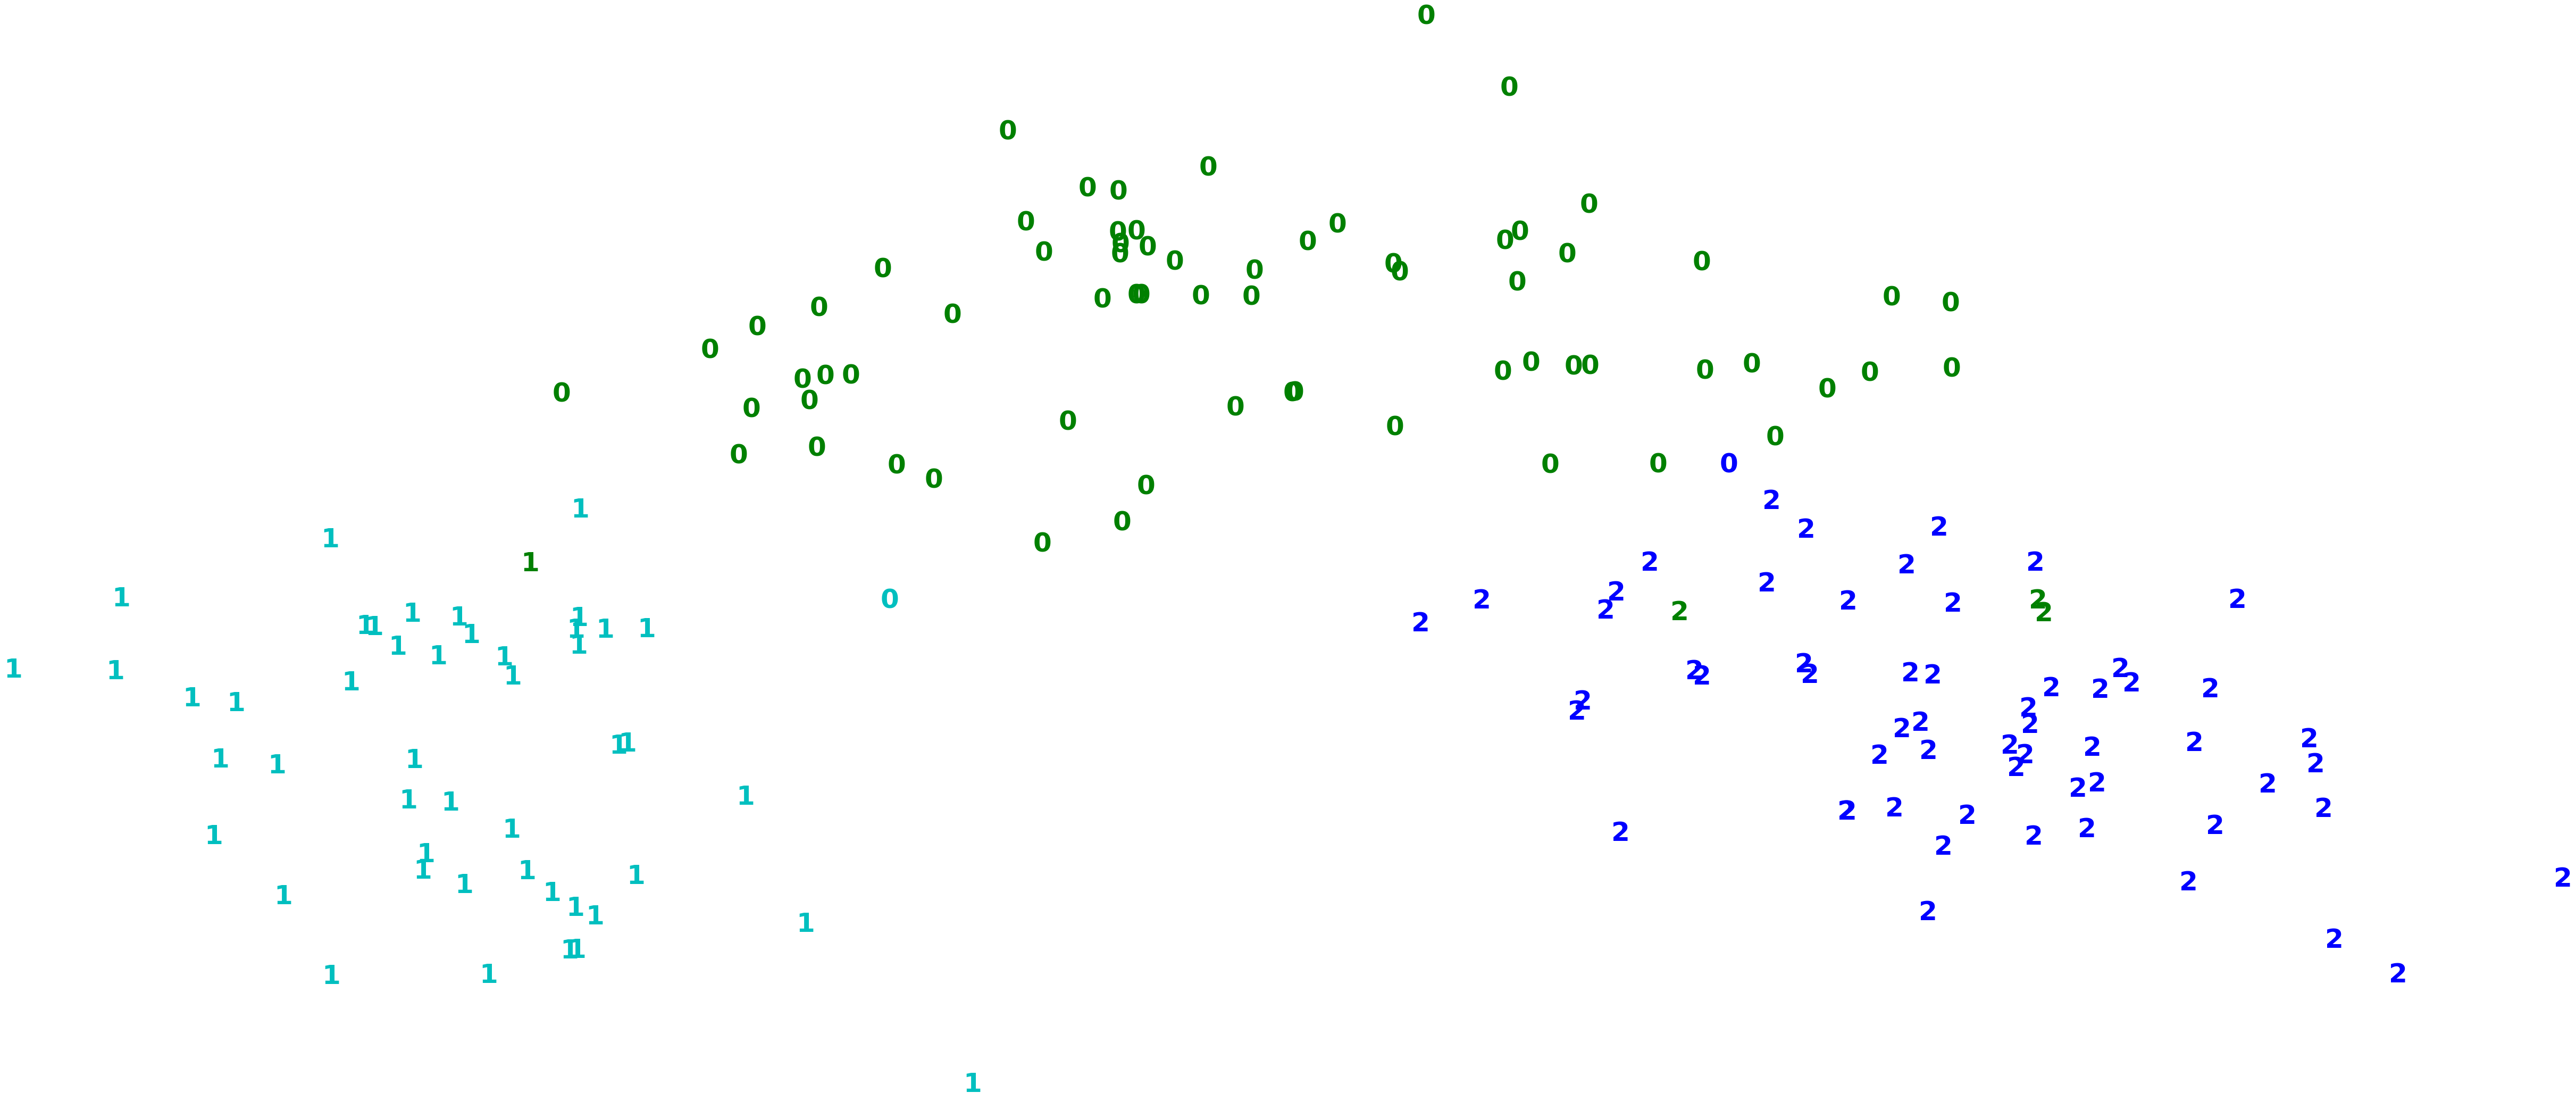

Adjusted Rand Index of the Agglomerative Clustering solution: 0.8960646870999063
The silhoutte score of the Agglomerative Clustering solution: 0.5590883962040384


In [ ]:
for i in ['complete','average','ward']:
  # Defining the agglomerative clustering
  if i == 'ward':
    agg_cluster = AgglomerativeClustering(linkage=i, n_clusters=3)
  else:
    agg_cluster = AgglomerativeClustering(linkage=i, affinity = 'cosine', n_clusters=3)

  # Fit model
  clusters = agg_cluster.fit_predict(X_pca)

  pca = PCA(n_components=2).fit_transform(X_pca)

  plt.figure(figsize=(10,5))
  colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

  print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
  print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

In [ ]:
performance.loc[5] = ['Agglomerative', 'X_pca', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_pca, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_pca, clusters, metric='euclidean'))

ARI score:  0.8960646870999063
Silhouette score:  0.5590883962040384


In [ ]:
performance

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336
5  Agglomerative  X_pca  0.896065    0.559088

##DBSCAN

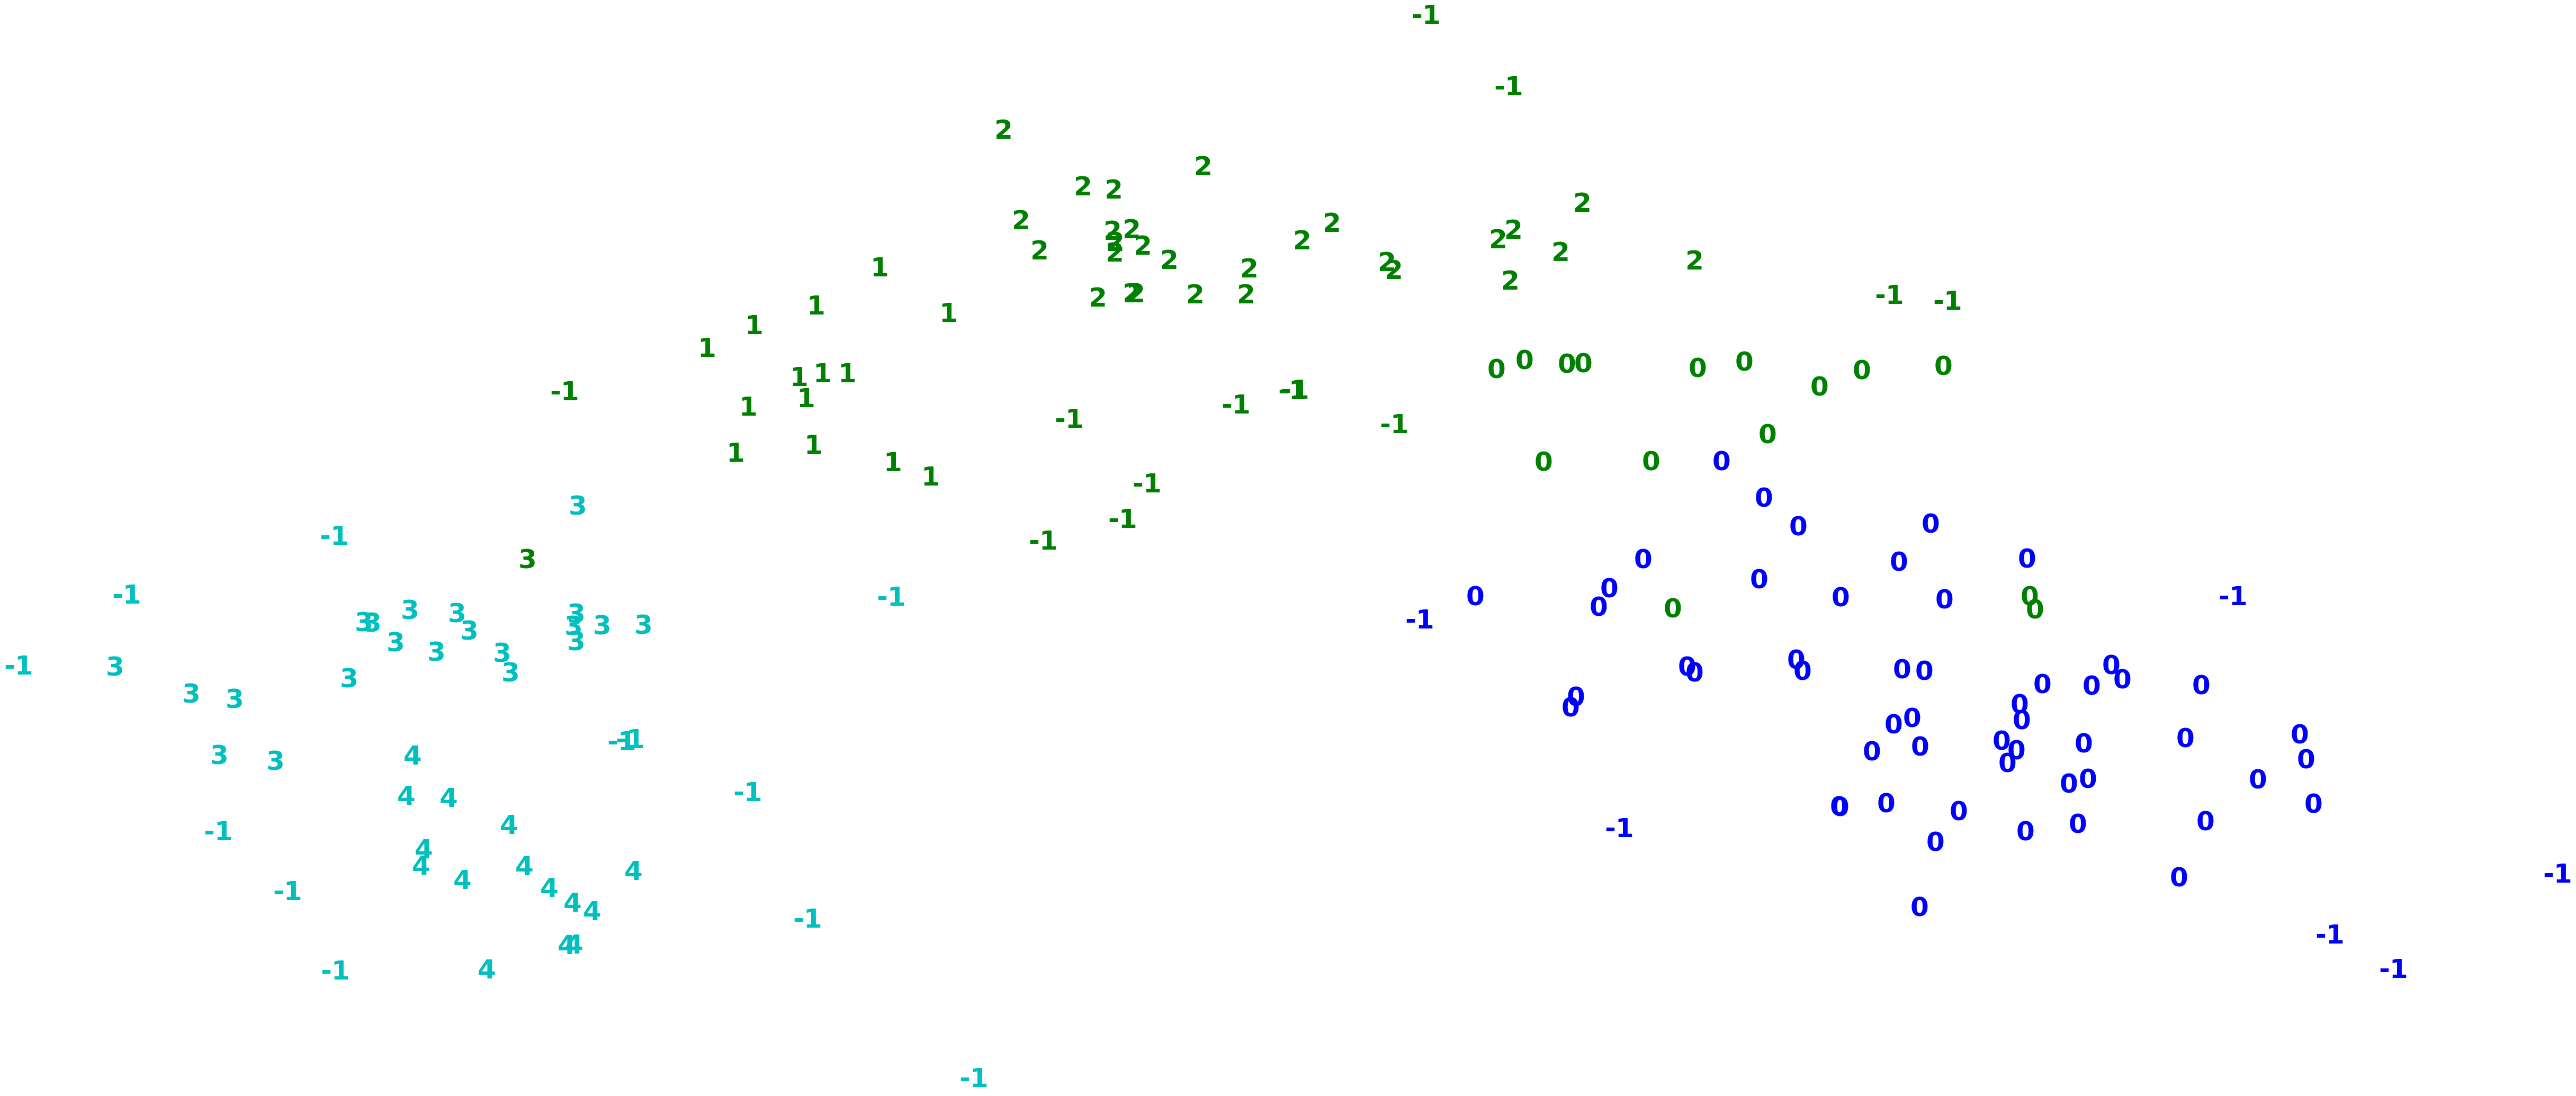

Adjusted Rand Index of the Agglomerative Clustering solution: 0.37903391744182025
The silhoutte score of the Agglomerative Clustering solution: 0.3230361352439643


In [ ]:

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN()

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

pca = PCA(n_components=2).fit_transform(X_pca)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
  plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
  .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
  .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

In [ ]:
performance.loc[6] = ['DBSCAN', 'X_pca', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_pca, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_pca, clusters, metric='euclidean'))

ARI score:  0.37903391744182025
Silhouette score:  0.3230361352439643


In [ ]:
performance

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336
5  Agglomerative  X_pca  0.896065    0.559088
6         DBSCAN  X_pca  0.379034    0.323036

##GMM

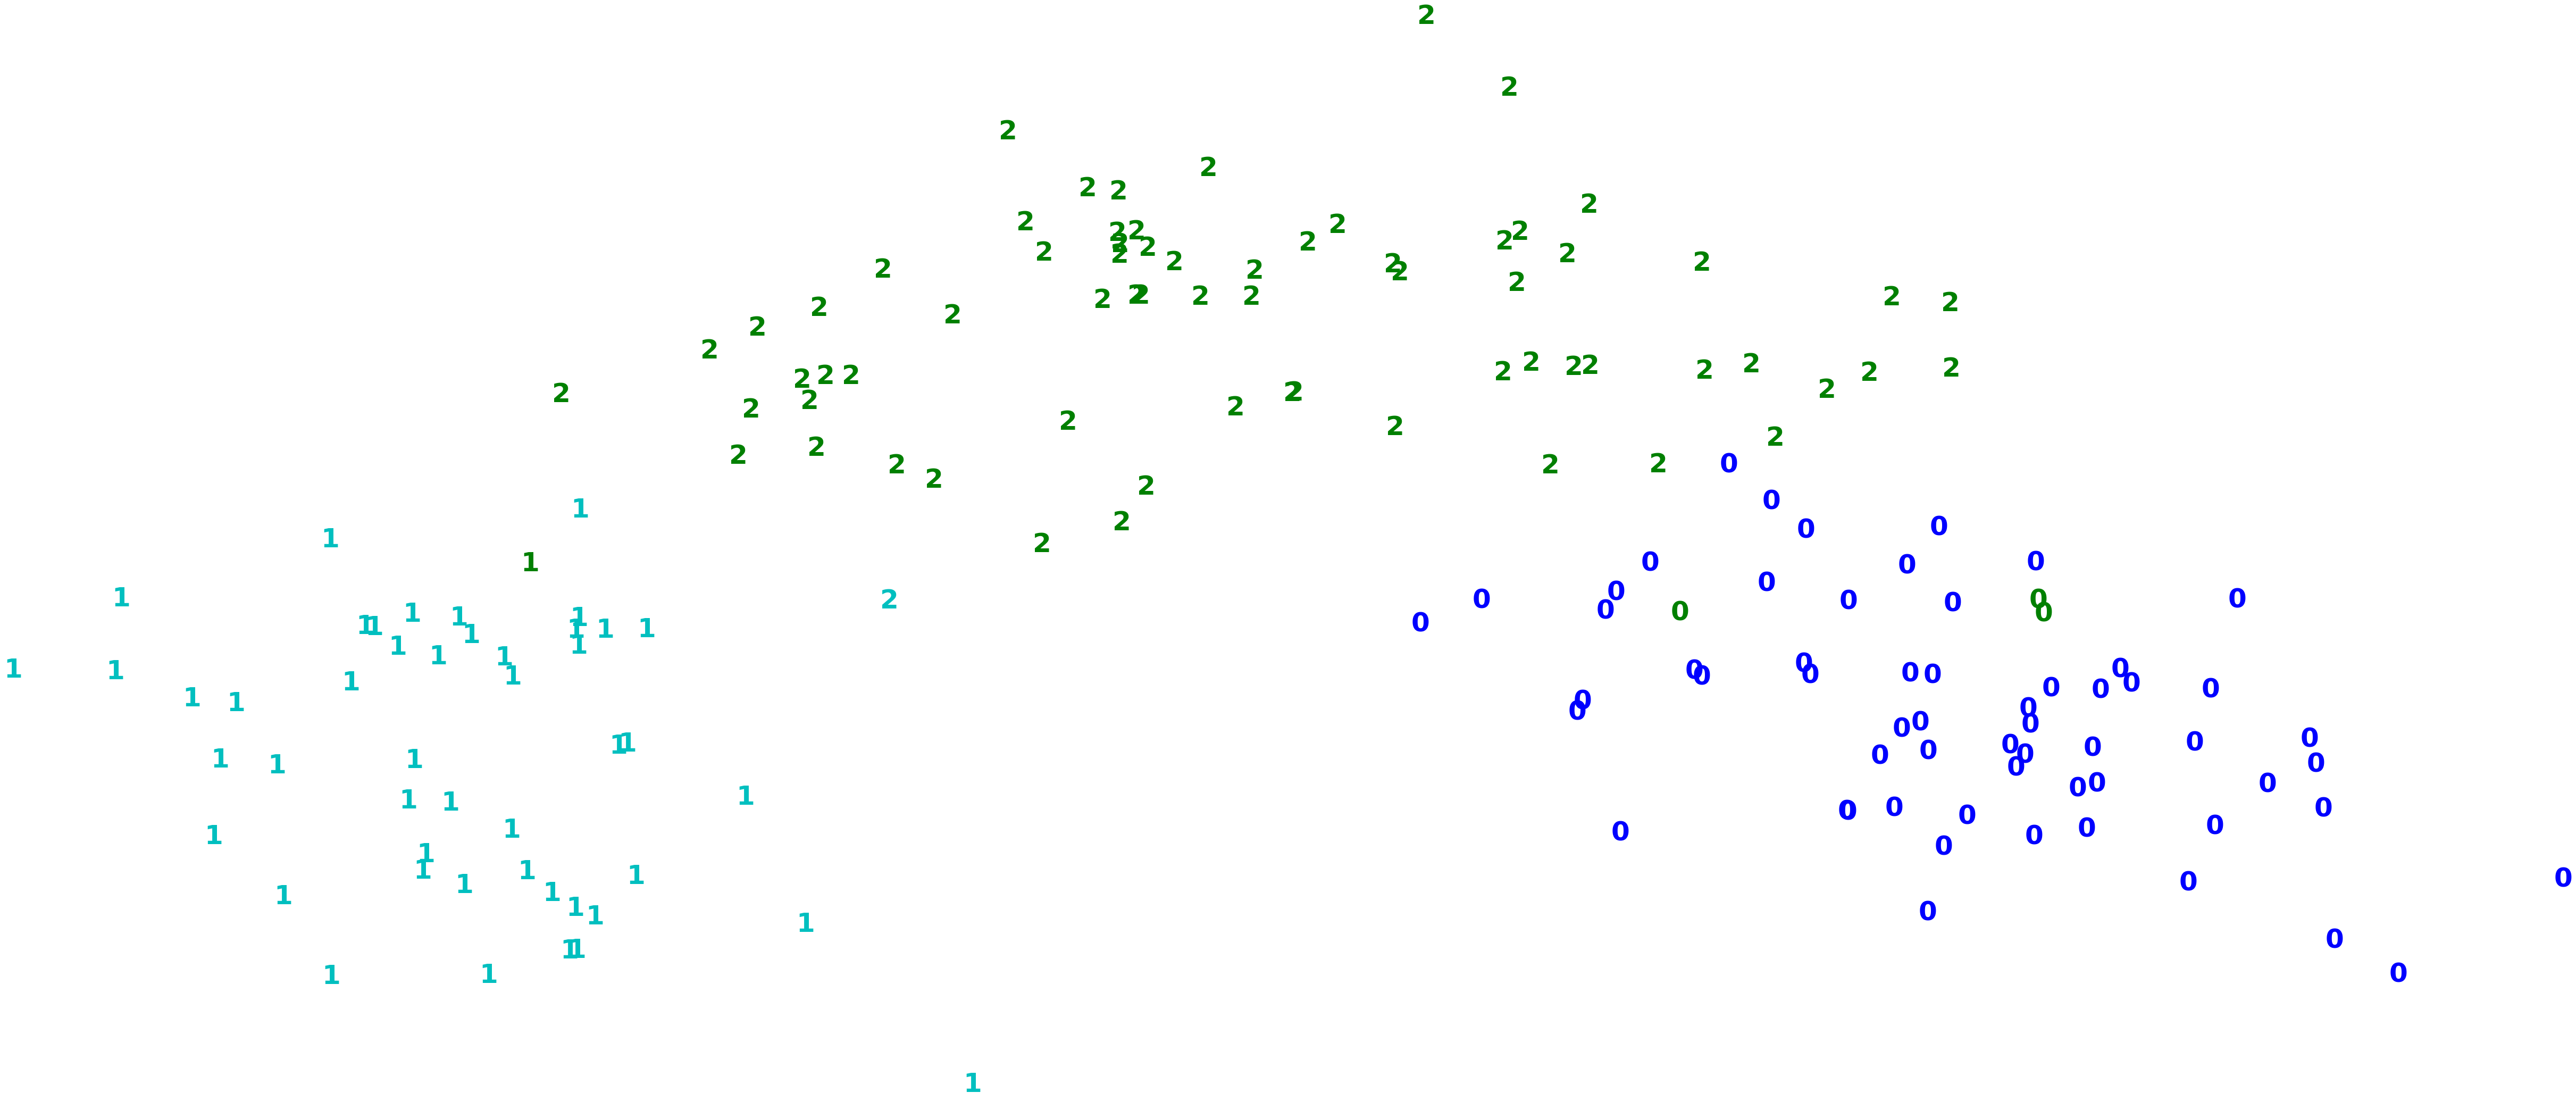

Adjusted Rand Index of the Agglomerative Clustering solution: 0.9135013666962891
The silhoutte score of the Agglomerative Clustering solution: 0.5591116207103001


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

pca = PCA(n_components=2).fit_transform(X_pca)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

In [ ]:
performance.loc[7] = ['GMM', 'X_pca', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(X_pca, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(X_pca, clusters, metric='euclidean'))

ARI score:  0.9135013666962891
Silhouette score:  0.5591116207103001


In [ ]:
performance

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336
5  Agglomerative  X_pca  0.896065    0.559088
6         DBSCAN  X_pca  0.379034    0.323036
7            GMM  X_pca  0.913501    0.559112

#Clustering Algorithms Using t-SNE

##K-means

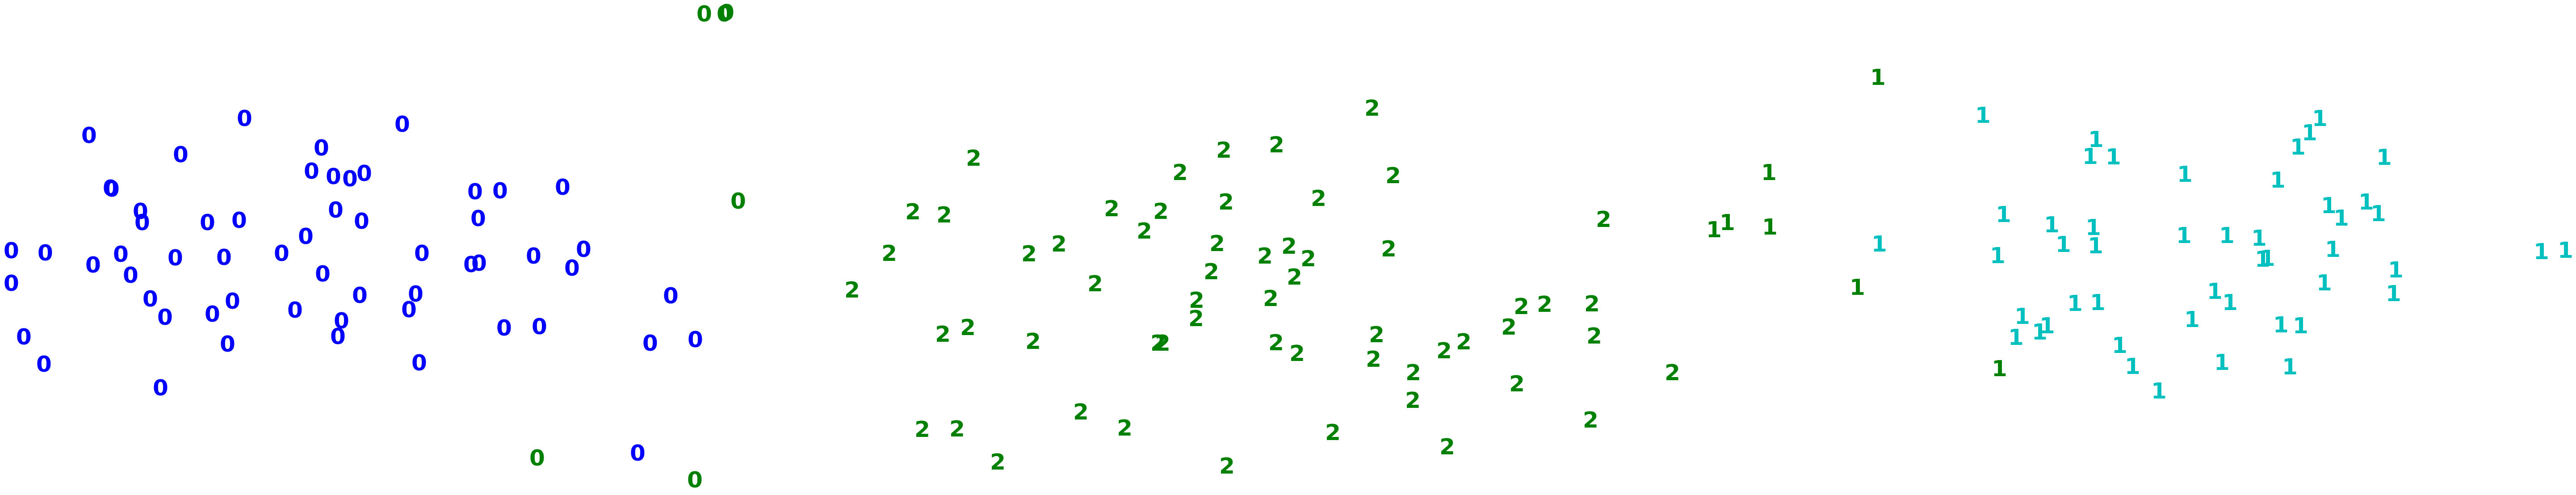

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3,random_state=123)

# Fit model
kmeans_cluster.fit(tsne_results)
y_pred = kmeans_cluster.predict(tsne_results)
pca = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(6,3))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for j in range(len(y_pred)):
  plt.text(pca[j, 0], pca[j, 1], str(y_pred[j]),
        color=colours[y[j]],
        fontdict={'weight': 'bold', 'size': 50}
      )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Almost perfect! Lets evaluate with ARI and silhouette score...

In [ ]:
performance.loc[8] = ['K-Means', 't-SNE', metrics.adjusted_rand_score(y, y_pred),metrics.silhouette_score(tsne_results, labels, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, y_pred))
labels = KMeans(n_clusters=3, random_state=123).fit_predict(tsne_results)
print('Silhouette score: ',metrics.silhouette_score(tsne_results, labels, metric='euclidean'))

ARI score:  0.7881673809541347
Silhouette score:  0.5973395


In [ ]:
performance.head()

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336

##Agglomerative Clustering

complete


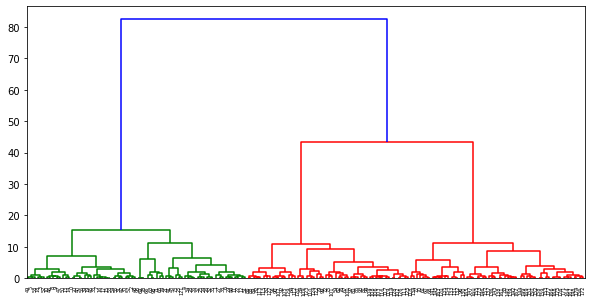

average


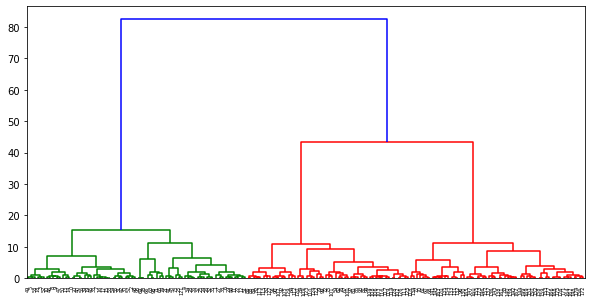

ward


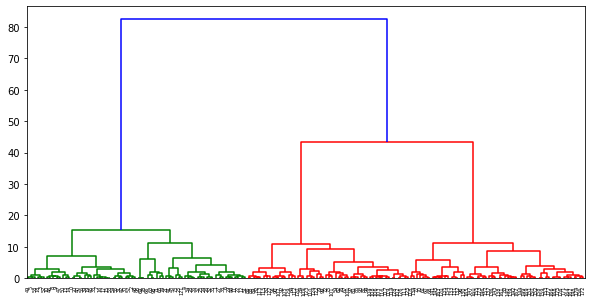

In [ ]:
for i in ['complete','average','ward']:
  plt.figure(figsize=(10,5))
  print(i)
  dendrogram(linkage(tsne_results, method='ward'))
  plt.show()
  

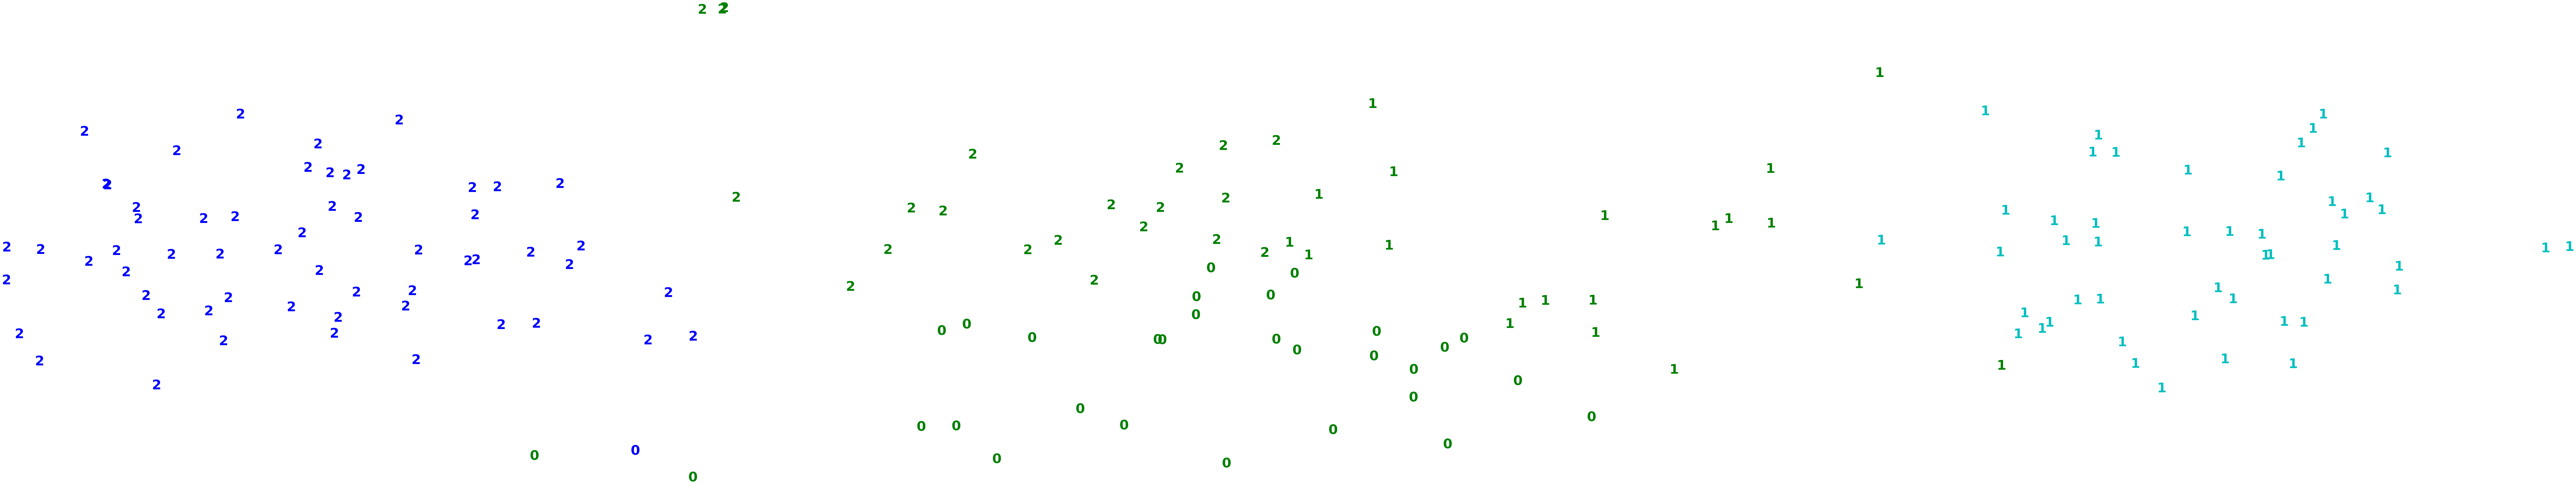

Adjusted Rand Index of the Agglomerative Clustering solution: 0.45696759834455647
The silhoutte score of the Agglomerative Clustering solution: 0.40853777527809143


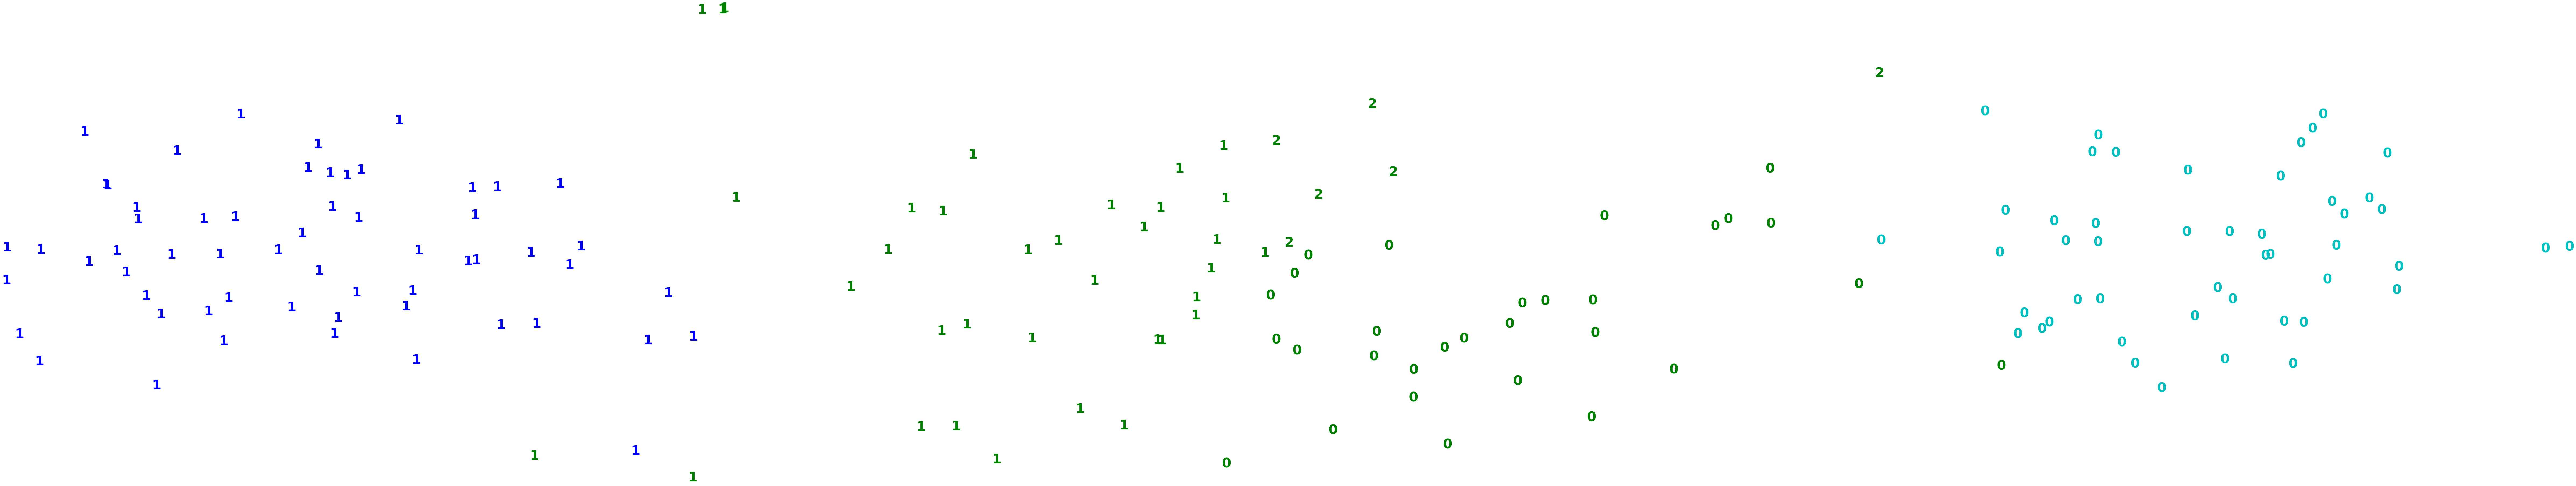

Adjusted Rand Index of the Agglomerative Clustering solution: 0.35933298591937185
The silhoutte score of the Agglomerative Clustering solution: 0.27294665575027466


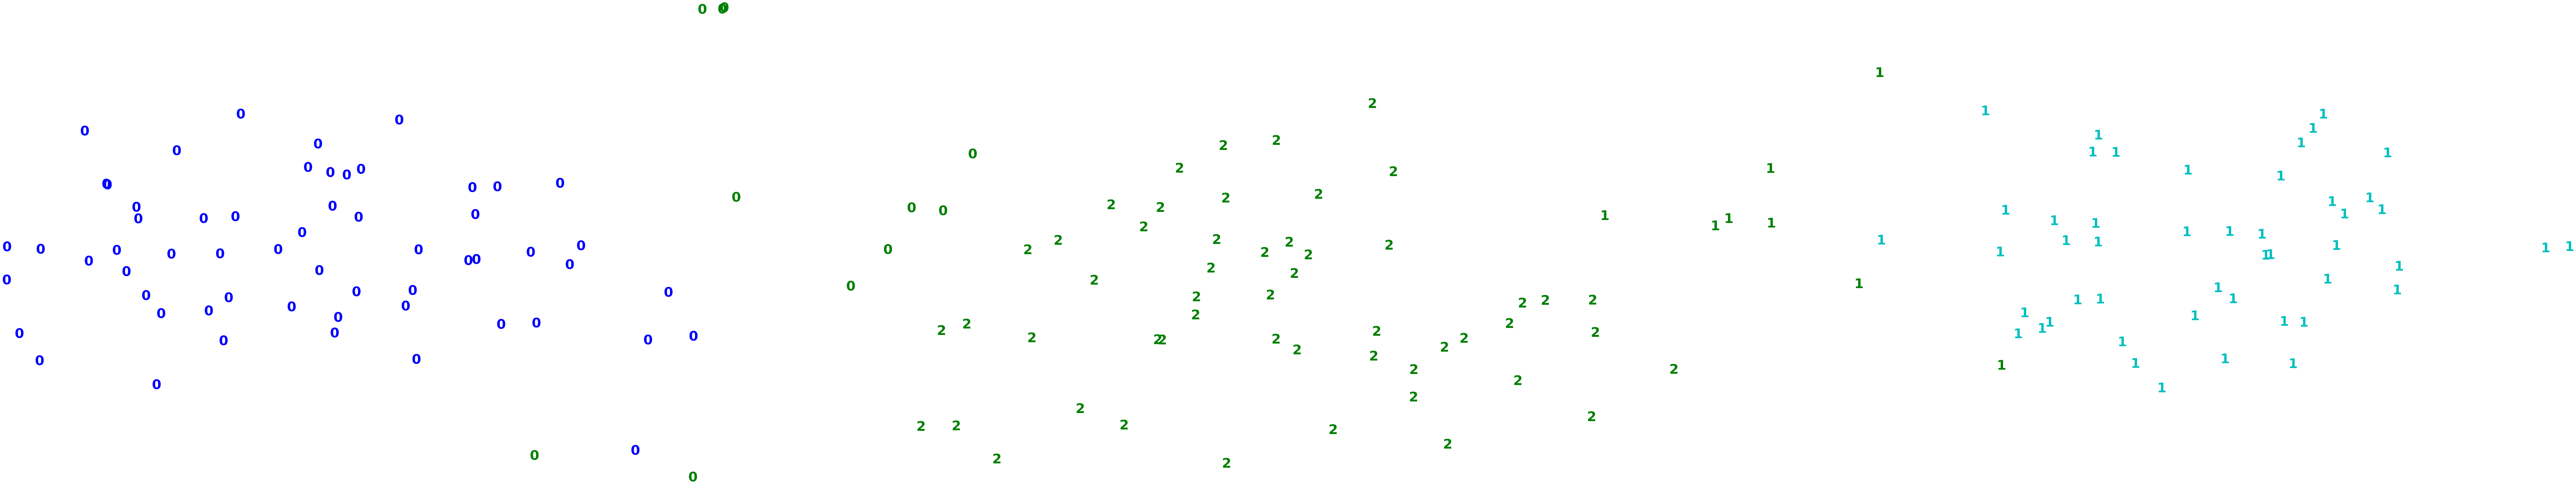

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7002297793914465
The silhoutte score of the Agglomerative Clustering solution: 0.5750203132629395


In [ ]:
for i in ['complete','average','ward']:
  # Defining the agglomerative clustering
  if i == 'ward':
    agg_cluster = AgglomerativeClustering(linkage=i, n_clusters=3)
  else:
    agg_cluster = AgglomerativeClustering(linkage=i, affinity = 'cosine', n_clusters=3)

  # Fit model
  clusters = agg_cluster.fit_predict(tsne_results)

  pca = PCA(n_components=2).fit_transform(tsne_results)

  plt.figure(figsize=(10,5))
  colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

  print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
  print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[9] = ['Agglomerative', 't-SNE', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(tsne_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(tsne_results, clusters, metric='euclidean'))

ARI score:  0.7002297793914465
Silhouette score:  0.5750203


In [ ]:
performance

Model     DR       ARI  Silhouette
0         K-Means  X_std  0.897495    0.284859
1   Agglomerative  X_std  0.789933    0.277444
2          DBSCAN  X_std  0.412936    0.207609
3             GMM  X_std  0.880400    0.284421
4         K-Means  X_pca  0.895058    0.558336
5   Agglomerative  X_pca  0.896065    0.559088
6          DBSCAN  X_pca  0.379034    0.323036
7             GMM  X_pca  0.913501    0.559112
8         K-Means  t-SNE  0.788167    0.541574
9   Agglomerative  t-SNE  0.700230    0.575020
10         DBSCAN   UMAP  0.132467    0.098193
11            GMM   UMAP  0.799261    0.651803

##DBSCAN

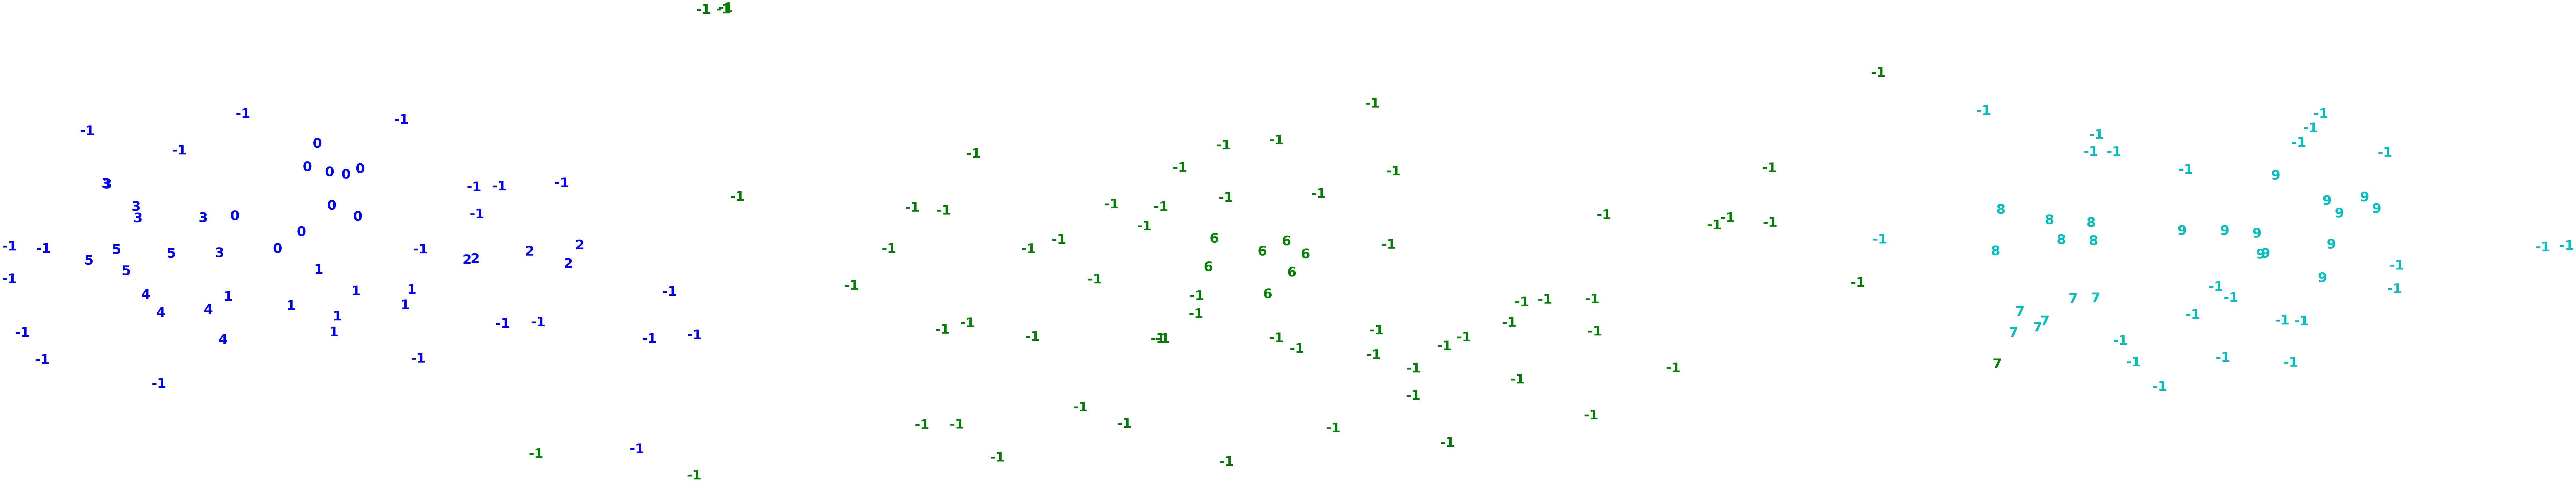

Adjusted Rand Index of the Agglomerative Clustering solution: 0.16942149740379053
The silhoutte score of the Agglomerative Clustering solution: -0.21912868320941925


In [ ]:

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN()

# Fit model
clusters = dbscan_cluster.fit_predict(tsne_results)

pca = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
  plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
  .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
  .format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[10] = ['DBSCAN', 't-SNE', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(tsne_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(tsne_results, clusters, metric='euclidean'))

ARI score:  0.16942149740379053
Silhouette score:  -0.21912868


##GMM

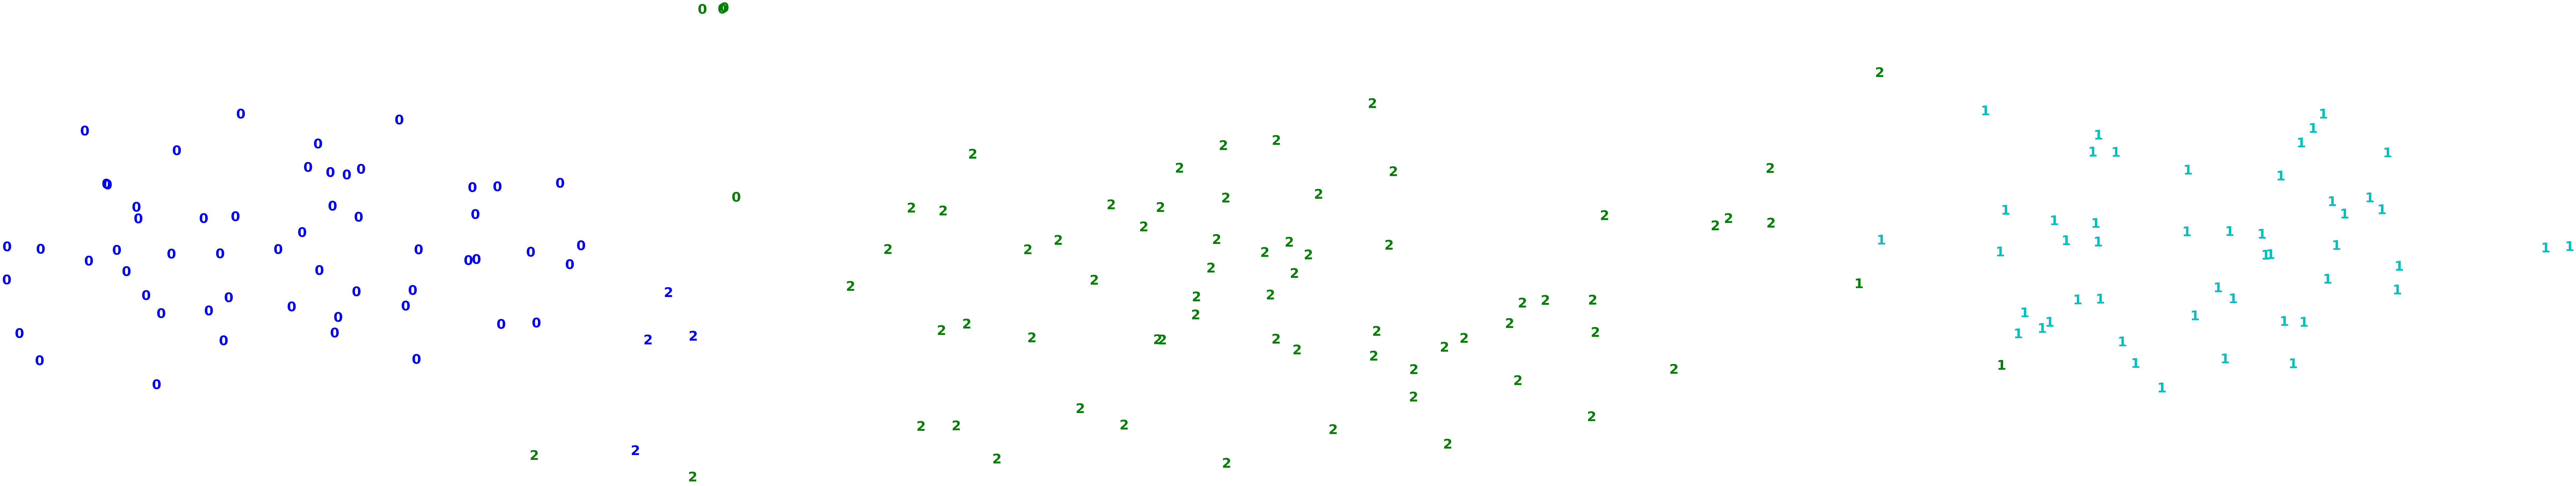

Adjusted Rand Index of the Agglomerative Clustering solution: 0.8302943777455465
The silhoutte score of the Agglomerative Clustering solution: 0.5674033164978027


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(tsne_results)

pca = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[11] = ['GMM', 't-SNE', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(tsne_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(tsne_results, clusters, metric='euclidean'))

ARI score:  0.8302943777455465
Silhouette score:  0.5674033


In [ ]:
performance

Model     DR       ARI  Silhouette
0         K-Means  X_std  0.897495    0.284859
1   Agglomerative  X_std  0.789933    0.277444
2          DBSCAN  X_std  0.412936    0.207609
3             GMM  X_std  0.880400    0.284421
4         K-Means  X_pca  0.895058    0.558336
5   Agglomerative  X_pca  0.896065    0.559088
6          DBSCAN  X_pca  0.379034    0.323036
7             GMM  X_pca  0.913501    0.559112
8         K-Means  t-SNE  0.788167    0.541574
9   Agglomerative  t-SNE  0.700230    0.575020
10         DBSCAN  t-SNE  0.169421   -0.219129
11            GMM  t-SNE  0.830294    0.567403

#Clustering Algorithms Using UMAP

##K-means

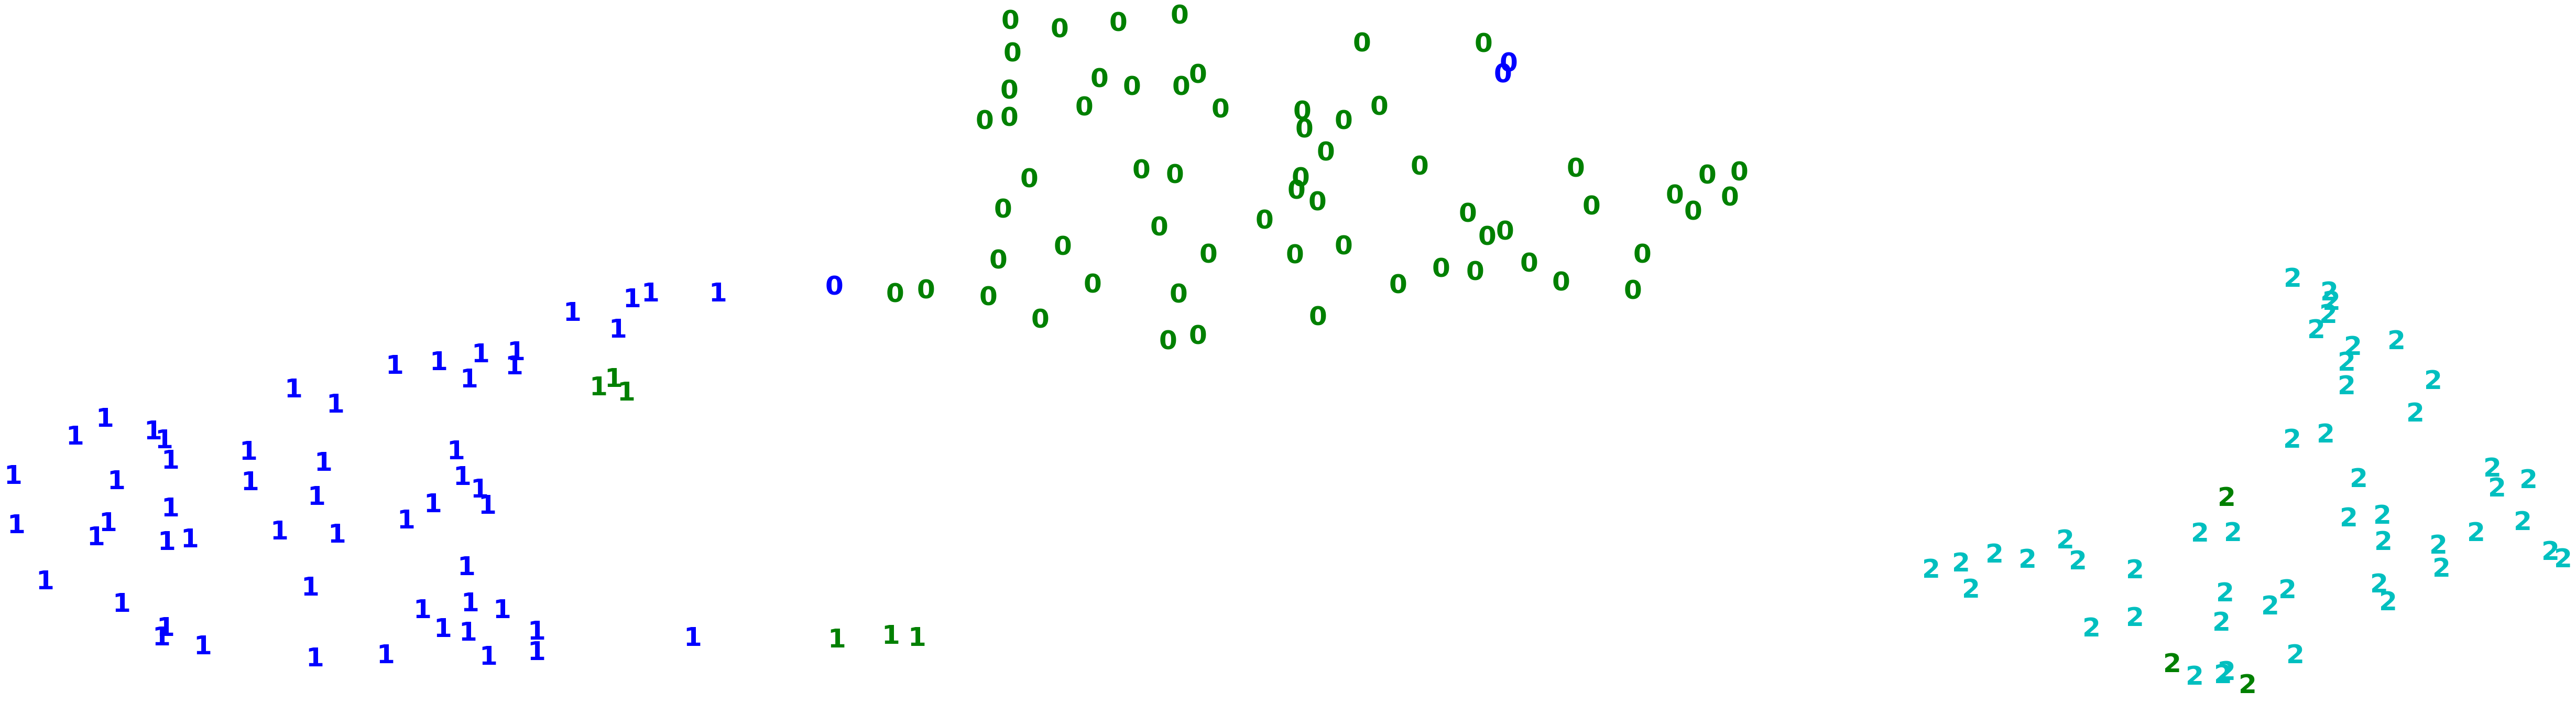

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3,random_state=123)

# Fit model
kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)
pca = PCA(n_components=2).fit_transform(umap_results)

plt.figure(figsize=(6,3))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for j in range(len(y_pred)):
  plt.text(pca[j, 0], pca[j, 1], str(y_pred[j]),
        color=colours[y[j]],
        fontdict={'weight': 'bold', 'size': 50}
      )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Almost perfect! Lets evaluate with ARI and silhouette score...

In [ ]:
performance.loc[12] = ['K-Means', 'UMAP', metrics.adjusted_rand_score(y, y_pred),metrics.silhouette_score(umap_results, labels, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, y_pred))
labels = KMeans(n_clusters=3, random_state=123).fit_predict(umap_results)
print('Silhouette score: ',metrics.silhouette_score(umap_results, labels, metric='euclidean'))

ARI score:  0.7992610054557531
Silhouette score:  0.6518034


In [ ]:
performance.head()

Model     DR       ARI  Silhouette
0        K-Means  X_std  0.897495    0.284859
1  Agglomerative  X_std  0.789933    0.277444
2         DBSCAN  X_std  0.412936    0.207609
3            GMM  X_std  0.880400    0.284421
4        K-Means  X_pca  0.895058    0.558336

##Agglomerative Clustering

complete


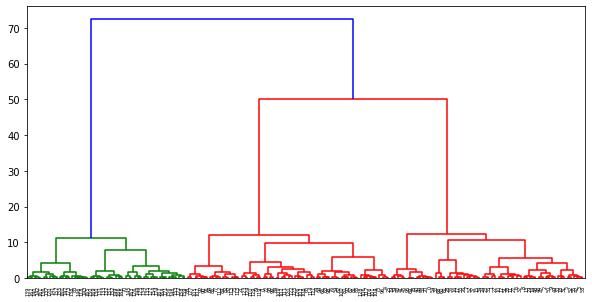

average


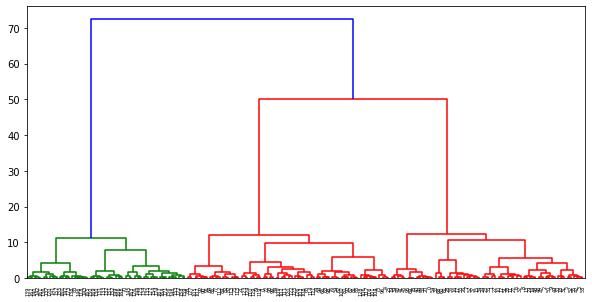

ward


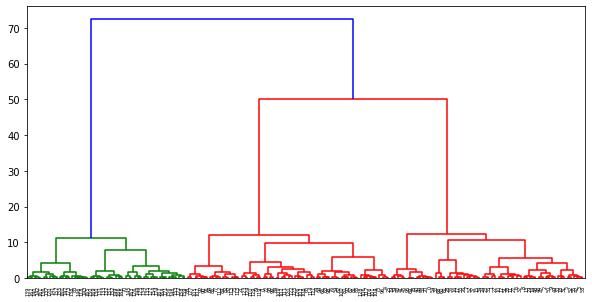

In [ ]:
for i in ['complete','average','ward']:
  plt.figure(figsize=(10,5))
  print(i)
  dendrogram(linkage(umap_results, method='ward'))
  plt.show()
  

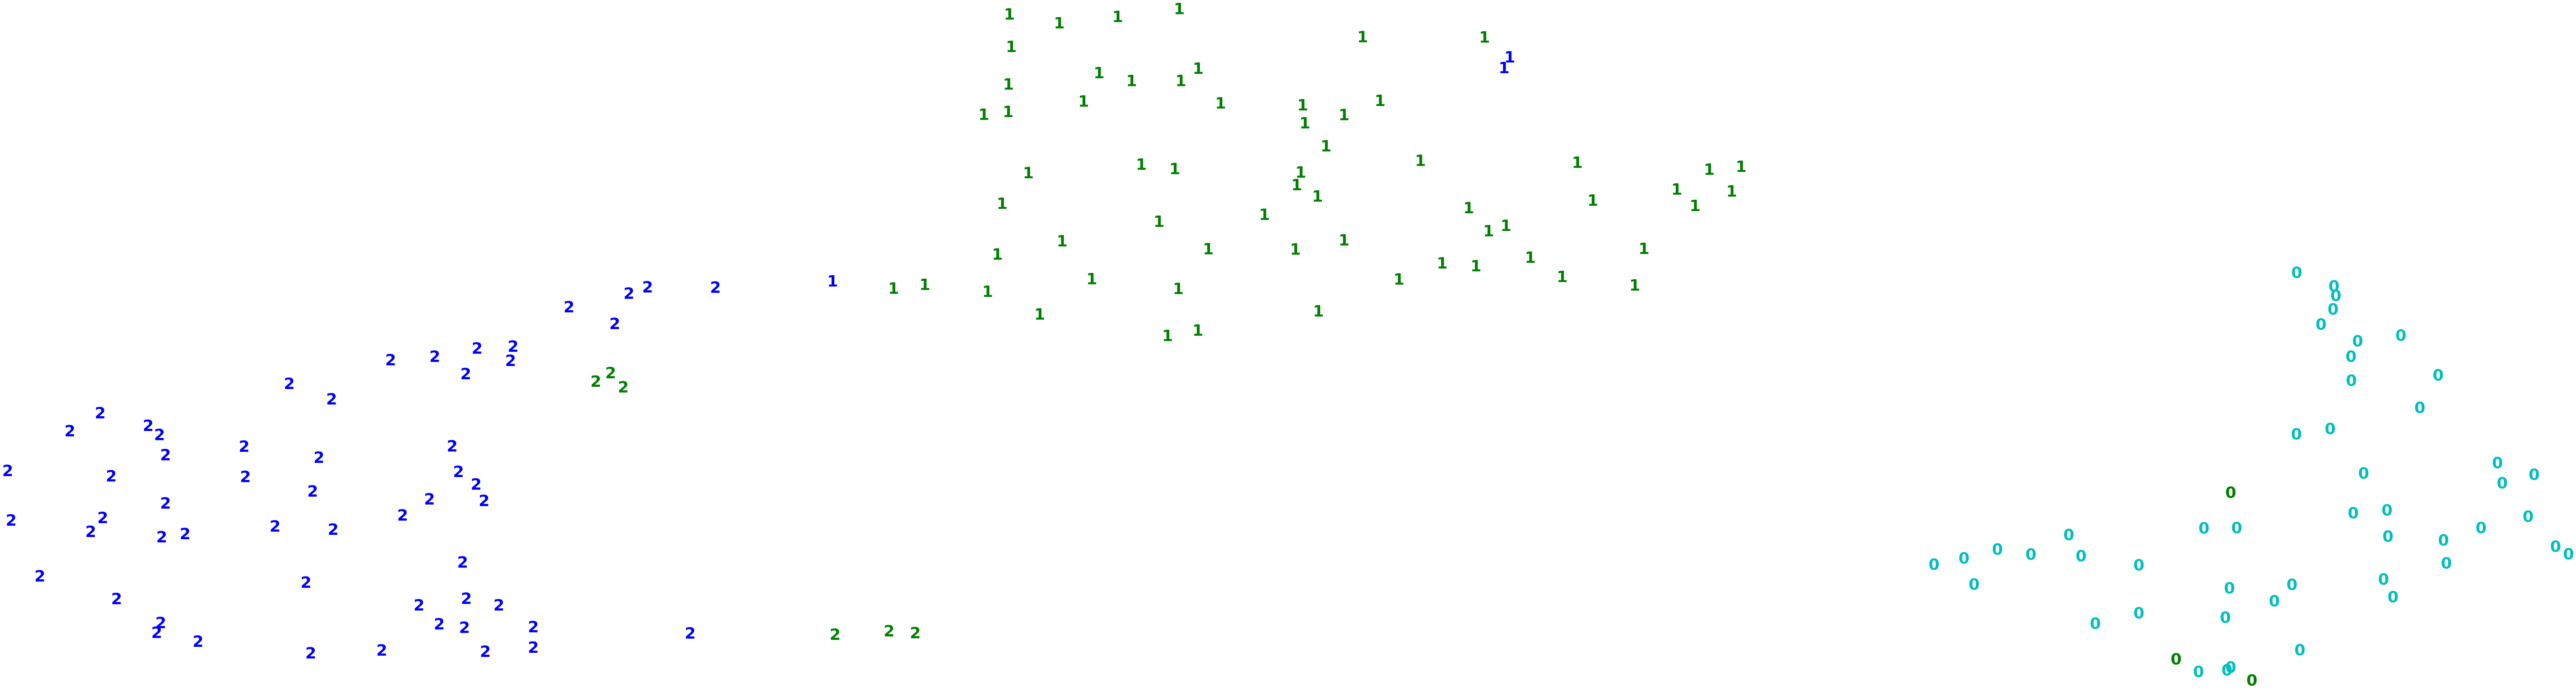

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7992610054557531
The silhoutte score of the Agglomerative Clustering solution: 0.6518033742904663


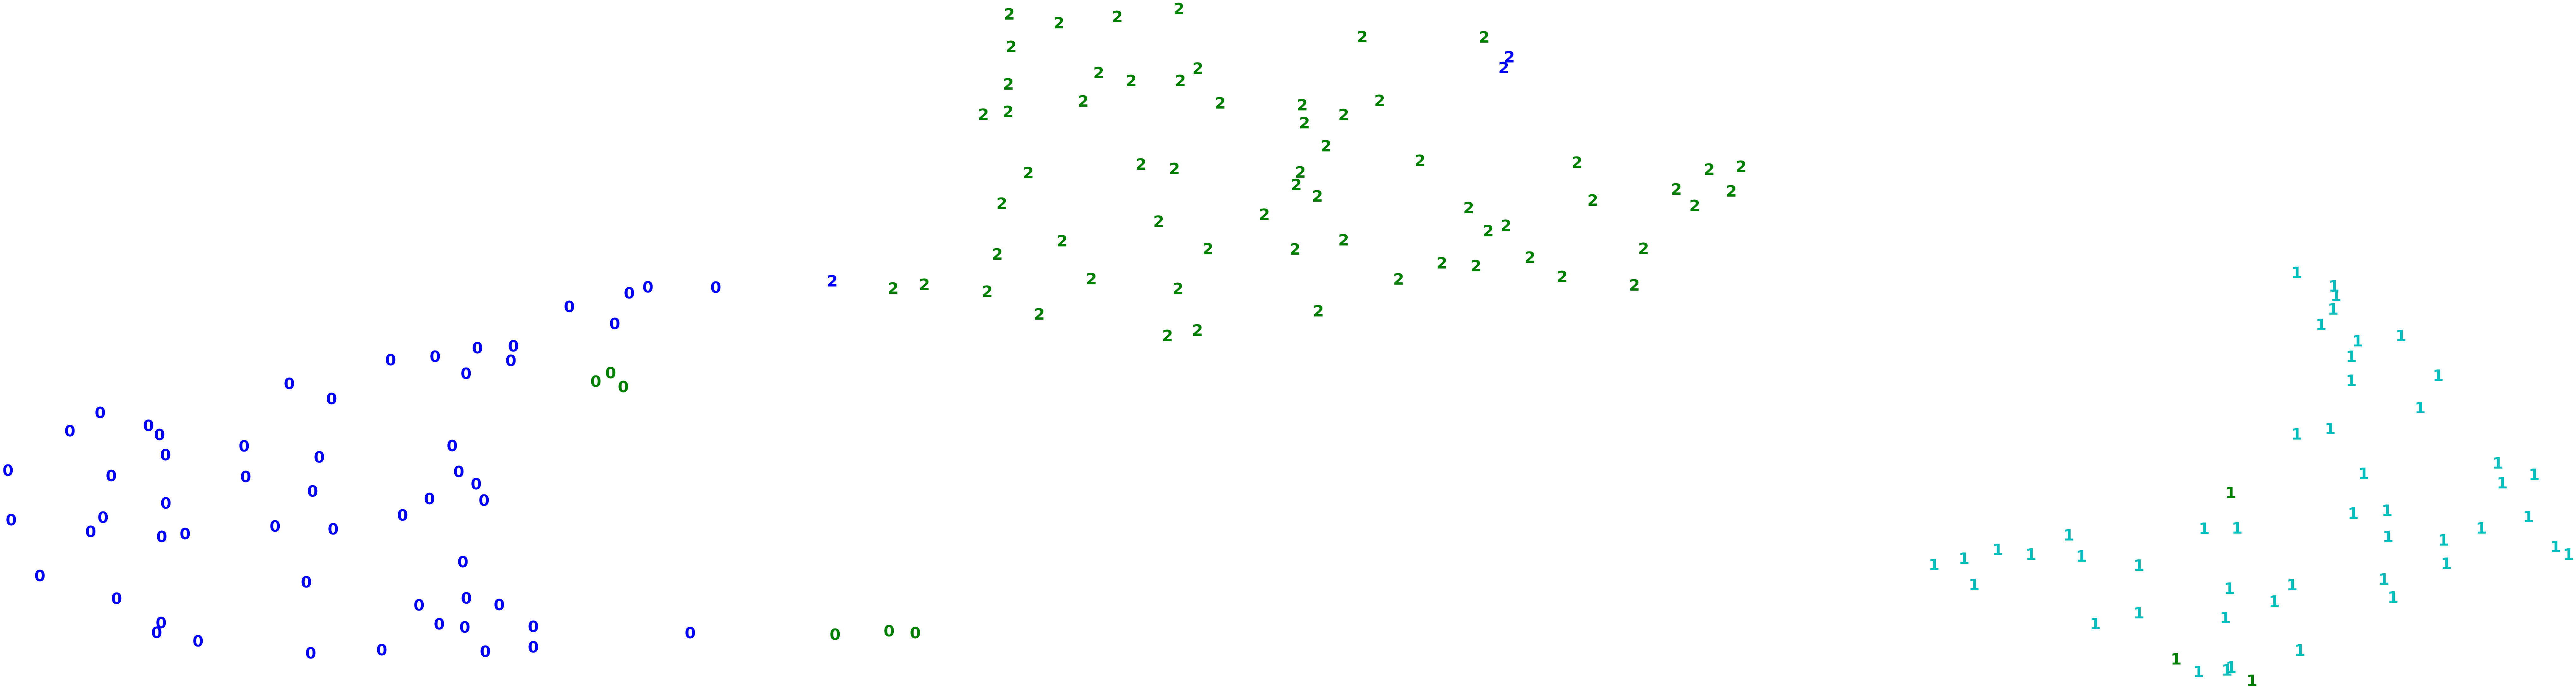

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7992610054557531
The silhoutte score of the Agglomerative Clustering solution: 0.6518033742904663


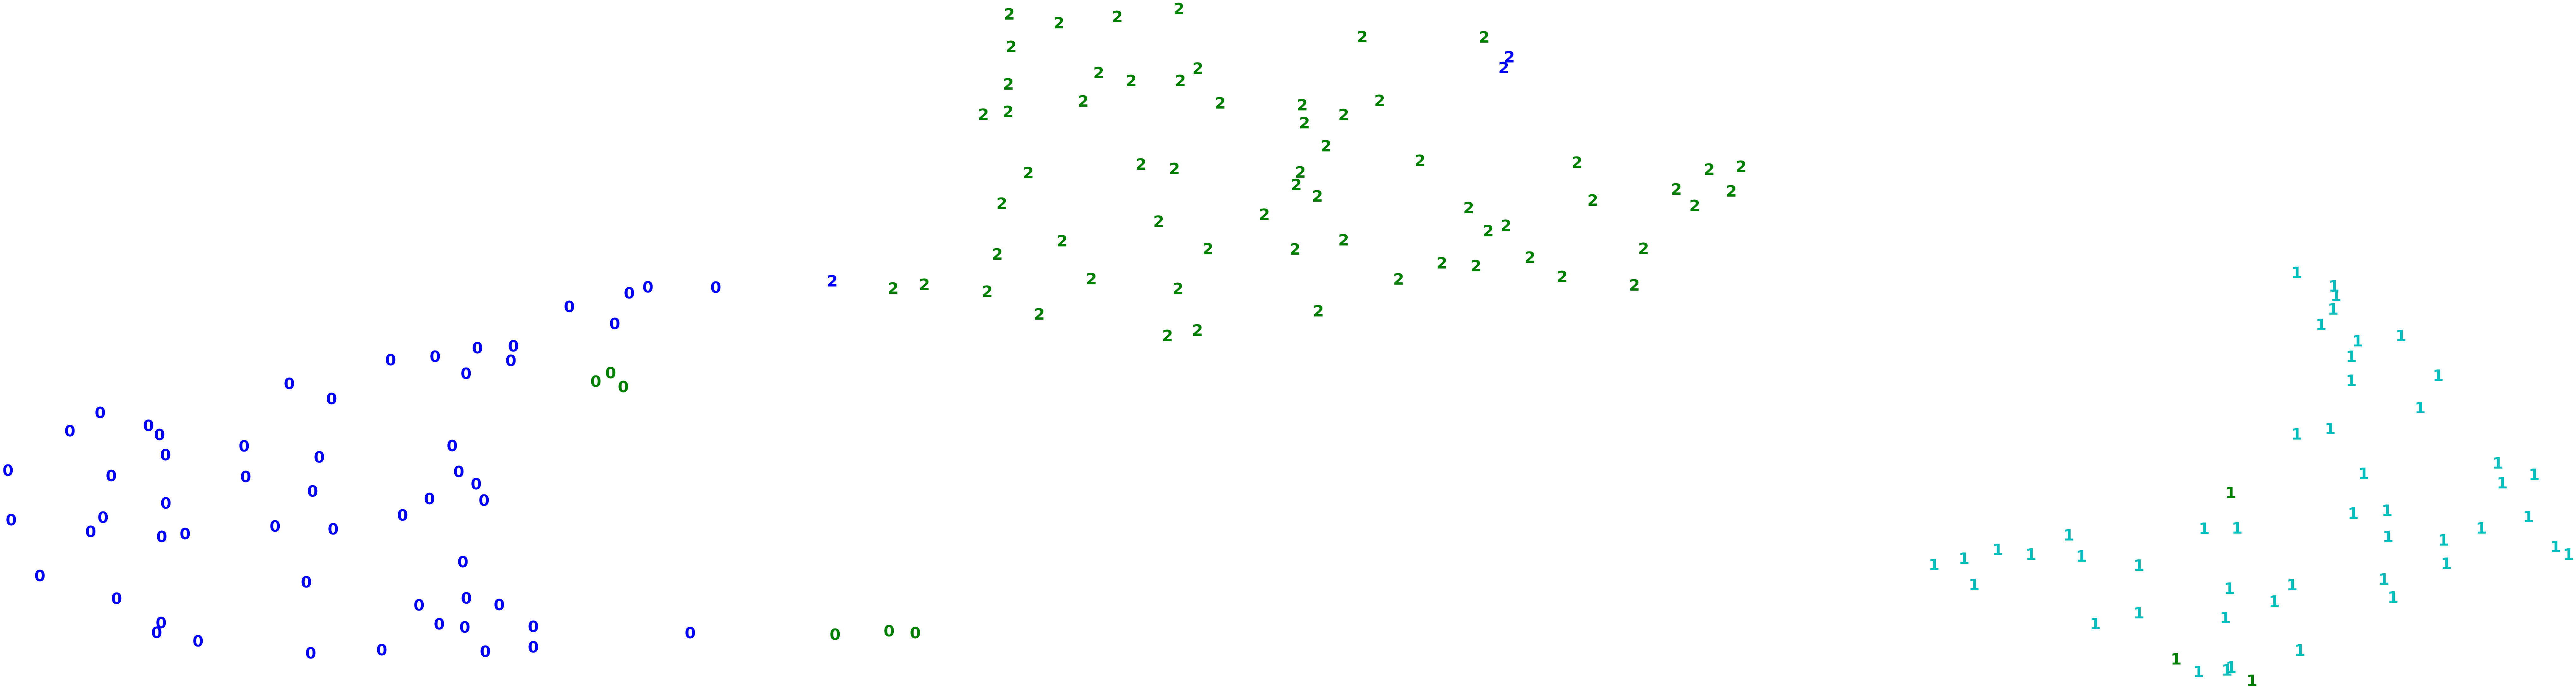

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7992610054557531
The silhoutte score of the Agglomerative Clustering solution: 0.6518033742904663


In [ ]:
for i in ['complete','average','ward']:
  # Defining the agglomerative clustering
  if i == 'ward':
    agg_cluster = AgglomerativeClustering(linkage=i, n_clusters=3)
  else:
    agg_cluster = AgglomerativeClustering(linkage=i, affinity = 'cosine', n_clusters=3)

  # Fit model
  clusters = agg_cluster.fit_predict(umap_results)

  pca = PCA(n_components=2).fit_transform(umap_results)

  plt.figure(figsize=(10,5))
  colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )

  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

  print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
  print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[13] = ['Agglomerative', 'UMAP', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(umap_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(umap_results, clusters, metric='euclidean'))

ARI score:  0.7992610054557531
Silhouette score:  0.6518034


In [ ]:
performance

Model     DR       ARI  Silhouette
0         K-Means  X_std  0.897495    0.284859
1   Agglomerative  X_std  0.789933    0.277444
2          DBSCAN  X_std  0.412936    0.207609
3             GMM  X_std  0.880400    0.284421
4         K-Means  X_pca  0.895058    0.558336
5   Agglomerative  X_pca  0.896065    0.559088
6          DBSCAN  X_pca  0.379034    0.323036
7             GMM  X_pca  0.913501    0.559112
8         K-Means  t-SNE  0.788167    0.541574
9   Agglomerative  t-SNE  0.700230    0.575020
10         DBSCAN  t-SNE  0.169421   -0.219129
11            GMM  t-SNE  0.830294    0.567403
12        K-Means   UMAP  0.799261    0.548533
13  Agglomerative   UMAP  0.799261    0.651803

##DBSCAN

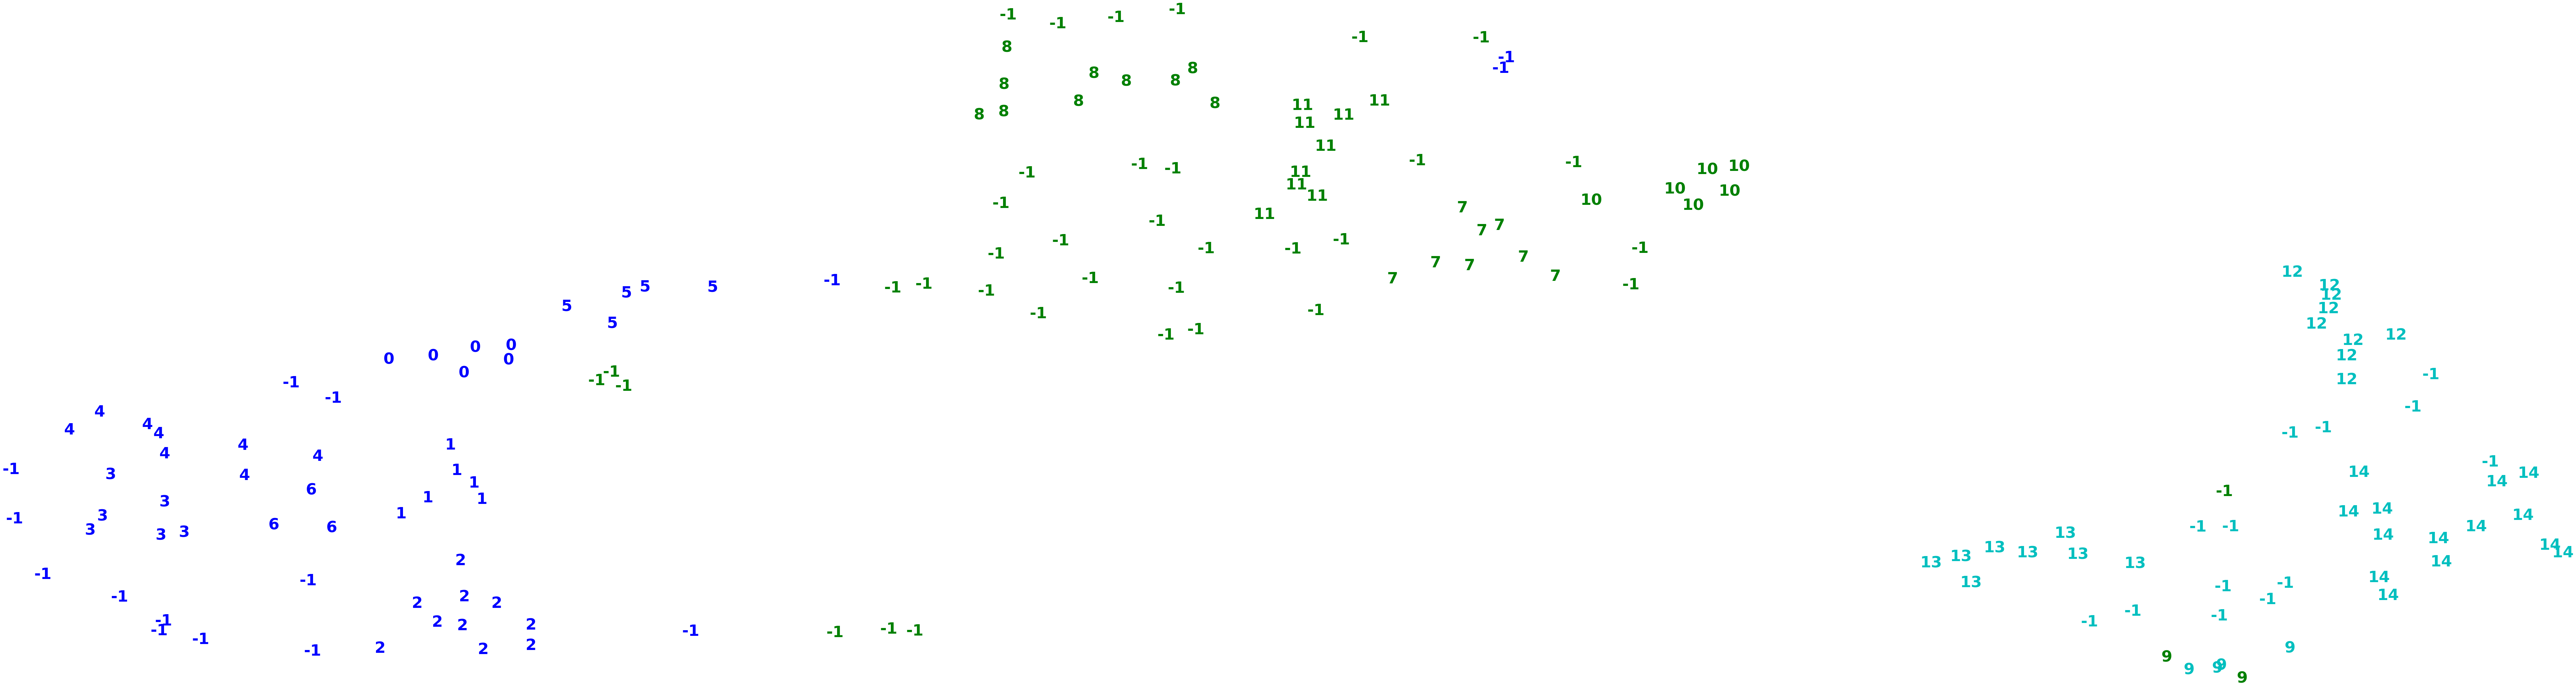

Adjusted Rand Index of the Agglomerative Clustering solution: 0.1324673030889343
The silhoutte score of the Agglomerative Clustering solution: 0.09819334745407104


In [ ]:

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN()

# Fit model
clusters = dbscan_cluster.fit_predict(umap_results)

pca = PCA(n_components=2).fit_transform(umap_results)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
  plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
  .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
  .format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[14] = ['DBSCAN', 'UMAP', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(umap_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(umap_results, clusters, metric='euclidean'))

ARI score:  0.1324673030889343
Silhouette score:  0.09819335


##GMM

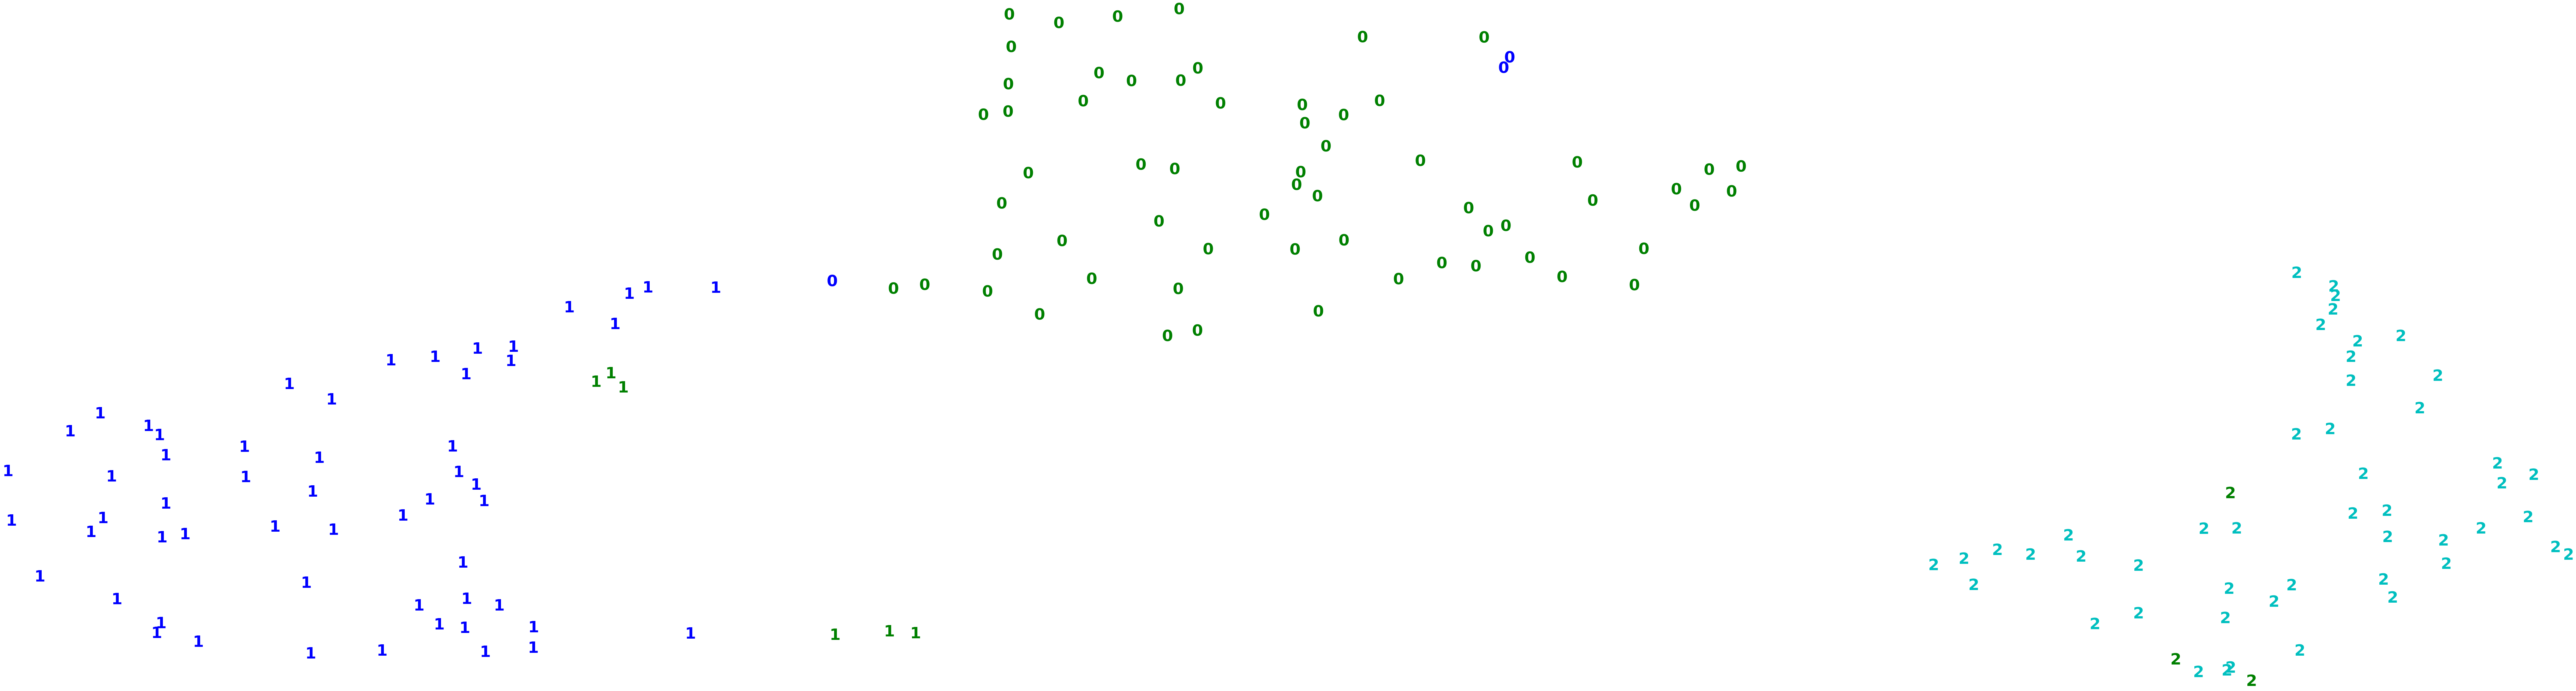

Adjusted Rand Index of the Agglomerative Clustering solution: 0.7992610054557531
The silhoutte score of the Agglomerative Clustering solution: 0.6518033742904663


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

pca = PCA(n_components=2).fit_transform(umap_results)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))

In [ ]:
performance.loc[15] = ['GMM', 'UMAP', metrics.adjusted_rand_score(y, clusters),metrics.silhouette_score(umap_results, clusters, metric='euclidean')]
print("ARI score: ",metrics.adjusted_rand_score(y, clusters))
print('Silhouette score: ',metrics.silhouette_score(umap_results, clusters, metric='euclidean'))

ARI score:  0.7992610054557531
Silhouette score:  0.6518034


In [ ]:
performance

Model     DR       ARI  Silhouette
0         K-Means  X_std  0.897495    0.284859
1   Agglomerative  X_std  0.789933    0.277444
2          DBSCAN  X_std  0.412936    0.207609
3             GMM  X_std  0.880400    0.284421
4         K-Means  X_pca  0.895058    0.558336
5   Agglomerative  X_pca  0.896065    0.559088
6          DBSCAN  X_pca  0.379034    0.323036
7             GMM  X_pca  0.913501    0.559112
8         K-Means  t-SNE  0.788167    0.541574
9   Agglomerative  t-SNE  0.700230    0.575020
10         DBSCAN  t-SNE  0.169421   -0.219129
11            GMM  t-SNE  0.830294    0.567403
12        K-Means   UMAP  0.799261    0.548533
13  Agglomerative   UMAP  0.799261    0.651803
14         DBSCAN   UMAP  0.132467    0.098193
15            GMM   UMAP  0.799261    0.651803

#Comparing Performance

In [ ]:
performance

Model     DR       ARI  Silhouette
0         K-Means  X_std  0.897495    0.284859
1   Agglomerative  X_std  0.789933    0.277444
2          DBSCAN  X_std  0.412936    0.207609
3             GMM  X_std  0.880400    0.284421
4         K-Means  X_pca  0.895058    0.558336
5   Agglomerative  X_pca  0.896065    0.559088
6          DBSCAN  X_pca  0.379034    0.323036
7             GMM  X_pca  0.913501    0.559112
8         K-Means  t-SNE  0.788167    0.541574
9   Agglomerative  t-SNE  0.700230    0.575020
10         DBSCAN  t-SNE  0.169421   -0.219129
11            GMM  t-SNE  0.830294    0.567403
12        K-Means   UMAP  0.799261    0.548533
13  Agglomerative   UMAP  0.799261    0.651803
14         DBSCAN   UMAP  0.132467    0.098193
15            GMM   UMAP  0.799261    0.651803

In [ ]:
performance['Model Name'] = performance['Model'] + '-' + performance['DR']

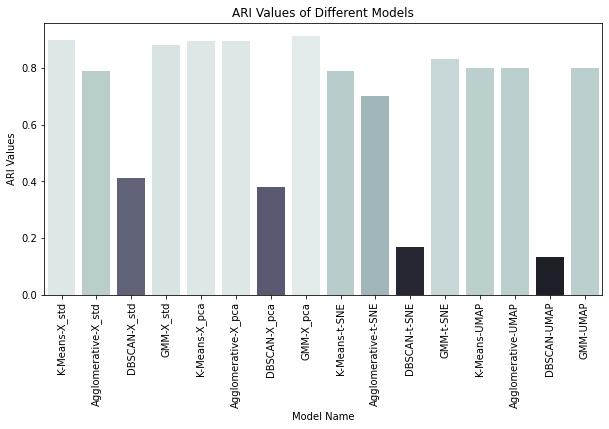

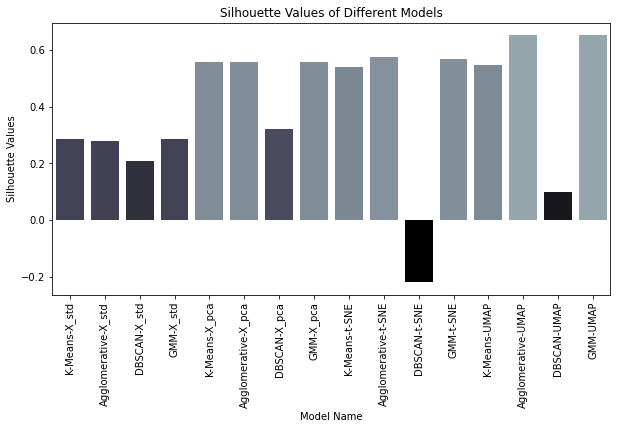

In [ ]:
for i in [2,3]:
  
  col = performance.columns[i]
  vals = performance[col]

  mdls = performance['Model Name']

  norm = plt.Normalize(0, 1)

  colors = plt.cm.bone(norm(vals))


  plt.figure(figsize=(10,5))

  ax = sns.barplot(y=vals, x=mdls, palette=colors)
  plt.ylabel('{} Values'.format(col))
  plt.title('{} Values of Different Models'.format(col))
  plt.xticks(rotation=90)

  plt.show()

It seems that GMM via PCA is the best performing model by ARI, while Agglomerative Clustering and GMM via UMAP is the best performing model by Silhouette Score.

DBSCAN doing poorly accross the board - probably because of the lack of linear seperability between clusters.